In [1]:
from source.util import utils as u
from source import metrics, plots
from source import handshake2, scargc, hs
import sys
import time
import os
import psutil
import resource

In [2]:
poolsize = 150
clusters = 2
n_components = 2
epsilon = 0.15
percent = 30#20
step = 100
k = 50
k_s = 5

In [3]:
base = '/home/localuser/Documentos/procopio/tcc/datasets/1CSurr.txt'
dataset, data_labeled, dataset_train, l_train, stream, l_stream, n_features = u.criar_datasets(5, base)


In [9]:
Tempo de Execução:  1657.7314321994781
memory peak:  155100
Acc:  0.7527479462013812
Macro-F1:  0.7500327644486555
MCC:  0.5409196864166818
Desvio Padrão:  0.17183741220501747
Numero de atualizações:  10760



Tempo de Execução:  16.86825466156006
memory peak:  197272
Acc:  0.8038928026172302
Macro-F1:  0.7994519173346832
MCC:  0.6231136881042499
Desvio Padrão:  0.20653800967258742
Numero de atualizações:  190

SyntaxError: invalid syntax (<ipython-input-9-5fc379cac370>, line 1)

In [4]:
acc_percent = [0.95428571 ,0.95038168 ,0.92938931 ,0.9370229  ,0.90839695 ,0.90095238
  ,0.90839695 ,0.79389313 ,0.78244275 ,0.70992366 ,0.70857143 ,0.75
  ,0.74236641 ,0.83015267 ,0.8110687  ,0.78095238 ,0.76717557 ,0.86450382
  ,0.92938931 ,0.90648855 ,0.8778626  ,0.87428571 ,0.84351145 ,0.86259542
  ,0.89885496 ,0.92557252 ,0.84380952 ,0.80534351 ,0.77099237 ,0.69656489
  ,0.66030534 ,0.65904762 ,0.63740458 ,0.67748092 ,0.71374046 ,0.77671756
  ,0.82285714 ,0.7480916  ,0.75954198 ,0.80916031 ,0.83969466 ,0.84351145
  ,0.86095238 ,0.84351145 ,0.86068702 ,0.82824427 ,0.84351145 ,0.85904762
  ,0.83206107 ,0.80916031 ,0.8148855  ,0.79580153 ,0.81142857 ,0.77480916
  ,0.77862595 ,0.73664122 ,0.7480916  ,0.73142857 ,0.71183206 ,0.6851145
  ,0.78625954 ,0.73664122 ,0.6870229  ,0.69904762 ,0.75954198 ,0.77671756
  ,0.82824427 ,0.84351145 ,0.86095238 ,0.82442748 ,0.77862595 ,0.77480916
  ,0.73854962 ,0.66857143 ,0.66793893 ,0.77671756 ,0.8778626  ,0.85496183
  ,0.87238095 ,0.79770992 ,0.78816794 ,0.84732824 ,0.91984733 ,0.94083969
  ,0.91238095 ,0.8740458  ,0.87022901 ,0.77671756 ,0.71183206 ,0.52
  ,0.35305344 ,0.25763359 ,0.23664122 ,0.19656489 ,0.32380952 ,0.3129771
  ,0.26335878 ,0.33396947 ,0.34351145 ,0.34285714]
f1_per = [0.95214657 ,0.94800635 ,0.92594545 ,0.93449181 ,0.90692029 ,0.89745169
  ,0.90632123 ,0.79096671 ,0.78243958 ,0.70991944 ,0.70846566 ,0.74999181
  ,0.74229039 ,0.82826062 ,0.80896406 ,0.77878214 ,0.76567013 ,0.86118687
  ,0.92527183 ,0.90331048 ,0.87645152 ,0.87003001 ,0.8418317  ,0.85948185
  ,0.89511094 ,0.92304303 ,0.84122359 ,0.80275744 ,0.77099237 ,0.69655494
  ,0.65918824 ,0.65566959 ,0.63636629 ,0.67705632 ,0.71373629 ,0.77571694
  ,0.8206684  ,0.74714862 ,0.75813258 ,0.80548791 ,0.83546651 ,0.83896984
  ,0.85504314 ,0.84014881 ,0.85991101 ,0.82666608 ,0.84032702 ,0.85711869
  ,0.82951789 ,0.80726224 ,0.81423533 ,0.79508433 ,0.81053771 ,0.77335308
  ,0.77836442 ,0.73617617 ,0.74661509 ,0.73111249 ,0.71178063 ,0.68492057
  ,0.78555664 ,0.7358871  ,0.68679933 ,0.69903779 ,0.75951045 ,0.77620815
  ,0.82733623 ,0.84195504 ,0.85747543 ,0.82329223 ,0.77789795 ,0.77425338
  ,0.73854867 ,0.66781818 ,0.66536005 ,0.77593334 ,0.87431792 ,0.85217081
  ,0.86716841 ,0.79585116 ,0.78721863 ,0.8428974  ,0.91656051 ,0.93908233
  ,0.90858367 ,0.86985776 ,0.87013631 ,0.7764823  ,0.7112758  ,0.51644737
  ,0.34163779 ,0.22142647 ,0.19586268 ,0.16427432 ,0.24460432 ,0.23837209
  ,0.20845921 ,0.25035765 ,0.25568182 ,0.25531915]
mcc_per = [ 0.9079568   ,0.90038006  ,0.86099343  ,0.876071    ,0.82836871  ,0.81391824
   ,0.82865979  ,0.65403112  ,0.64262874  ,0.55029031  ,0.54853396  ,0.59998881
   ,0.59018535  ,0.70678042  ,0.67909802  ,0.6375596   ,0.62019755  ,0.75611385
   ,0.86089563  ,0.82362031  ,0.78003984  ,0.76984391  ,0.72680046  ,0.75349245
   ,0.81006823  ,0.85705842  ,0.72585886  ,0.67035913  ,0.62732919  ,0.53439413
   ,0.49147031  ,0.48722606  ,0.46649929  ,0.51172366  ,0.55489065  ,0.6335384
   ,0.69577125  ,0.59627646  ,0.6072206   ,0.66173023  ,0.7009847   ,0.70647861
   ,0.73711936  ,0.71207578  ,0.75233029  ,0.69990106  ,0.72450016  ,0.74796122
   ,0.70858645  ,0.67671154  ,0.68418632  ,0.6598239   ,0.68138514  ,0.63035619
   ,0.63713133  ,0.58245548  ,0.59555     ,0.57615325  ,0.55252499  ,0.52079597
   ,0.64679907  ,0.58206637  ,0.52296828  ,0.53732252  ,0.61226419  ,0.63422898
   ,0.70547813  ,0.72698918  ,0.74844382  ,0.69495995  ,0.63647395  ,0.63161885
   ,0.58547527  ,0.50119126  ,0.49816604  ,0.6338426   ,0.77661075  ,0.74232485
   ,0.76534149  ,0.6608127   ,0.64904062  ,0.7282876   ,0.84593368  ,0.88427369
   ,0.81899891  ,0.74501035  ,0.7650156   ,0.58206361  ,0.42635027  ,0.03303073
  ,-0.31616348 ,-0.55696742 ,-0.60511356 ,-0.67142535 ,-0.50999754 ,-0.52134717
  ,-0.58256429 ,-0.49883956 ,-0.48800679 ,-0.48785402]


In [5]:
acc_s =[0.94666667, 0.89122137, 0.84541985, 0.8721374 , 0.87977099,
       0.90666667, 0.89312977, 0.83969466, 0.83587786, 0.90458015,
       0.88      , 0.89694656, 0.89122137, 0.90458015, 0.83969466,
       0.86095238, 0.89503817, 0.90648855, 0.91793893, 0.88358779,
       0.88358779, 0.88952381, 0.88549618, 0.86068702, 0.83206107,
       0.88167939, 0.84952381, 0.83015267, 0.86832061, 0.85496183,
       0.84160305, 0.91238095, 0.83969466, 0.86832061, 0.86832061,
       0.89694656, 0.8647619 , 0.92748092, 0.92366412, 0.8721374 ,
       0.88358779, 0.91603053, 0.91428571, 0.90458015, 0.8759542 ,
       0.8740458 , 0.85877863, 0.91238095, 0.85114504, 0.82633588,
       0.83206107, 0.83587786, 0.84380952, 0.85877863, 0.89885496,
       0.8740458 , 0.85496183, 0.8552381 , 0.88358779, 0.87977099,
       0.89503817, 0.90648855, 0.88549618, 0.90095238, 0.86450382,
       0.88740458, 0.88358779, 0.88931298, 0.88952381, 0.85496183,
       0.81679389, 0.87977099, 0.8778626 , 0.83047619, 0.85496183,
       0.89694656, 0.90267176, 0.82442748, 0.88571429, 0.92175573,
       0.92366412, 0.89312977, 0.88740458, 0.90076336, 0.87047619,
       0.82633588, 0.79198473, 0.76526718, 0.75954198, 0.63428571,
       0.40839695, 0.2519084 , 0.22900763, 0.15458015, 0.23809524,
       0.1889313 , 0.09160305, 0.15076336, 0.16603053, 0.13142857]


f1_s = [0.94377811, 0.88869137, 0.84285064, 0.86988121, 0.8786212 ,
       0.90315294, 0.89118794, 0.83525713, 0.83533814, 0.90097363,
       0.87714737, 0.89435957, 0.88813776, 0.90140739, 0.83678192,
       0.85634715, 0.89029102, 0.90273027, 0.91363311, 0.88059189,
       0.88209299, 0.88510128, 0.88303571, 0.85761241, 0.82951789,
       0.87927165, 0.84680026, 0.82679101, 0.86706131, 0.85094693,
       0.83912765, 0.91013485, 0.83606215, 0.8650971 , 0.8649318 ,
       0.89321136, 0.86154703, 0.92303054, 0.9191358 , 0.86779187,
       0.8799677 , 0.91215959, 0.90922155, 0.90112163, 0.87503256,
       0.87175722, 0.85523349, 0.90990689, 0.84811594, 0.82395008,
       0.83117321, 0.83424553, 0.84220134, 0.85486938, 0.89637893,
       0.86985776, 0.84992463, 0.85152715, 0.88059189, 0.87368711,
       0.89206275, 0.90158191, 0.88201564, 0.89698735, 0.86251649,
       0.88450691, 0.88153364, 0.88693452, 0.88578395, 0.85340499,
       0.81511048, 0.87682779, 0.87551226, 0.8282327 , 0.8535193 ,
       0.89351998, 0.89891631, 0.82239906, 0.88036642, 0.91779637,
       0.92014508, 0.88801368, 0.88421277, 0.89906354, 0.86903888,
       0.82555762, 0.79143098, 0.76507467, 0.75733251, 0.62960785,
       0.40836247, 0.21050366, 0.18782131, 0.1338843 , 0.19230769,
       0.15890851, 0.08391608, 0.13101161, 0.14238953, 0.11616162]

mcc_s = [ 0.88904454,  0.79962867,  0.72828814,  0.76787661,  0.78182776,
        0.82335295,  0.80369434,  0.71693456,  0.71721444,  0.8197334 ,
        0.78110827,  0.80737835,  0.79872076,  0.82045944,  0.71925016,
        0.74863395,  0.80218035,  0.82264623,  0.84094381,  0.78658929,
        0.78902385,  0.79378967,  0.79051282,  0.75062175,  0.70858645,
        0.78282593,  0.73420645,  0.70457496,  0.76528529,  0.74042538,
        0.72274468,  0.83379077,  0.71815663,  0.76217249,  0.76191087,
        0.80695937,  0.75667299,  0.85701712,  0.85032017,  0.766339  ,
        0.78557839,  0.83845408,  0.83348215,  0.81857691,  0.77780613,
        0.77260797,  0.74696528,  0.83467157,  0.736178  ,  0.7004977 ,
        0.71107938,  0.71555925,  0.72735477,  0.74639729,  0.81217208,
        0.76957569,  0.73884084,  0.74131609,  0.78658929,  0.77554988,
        0.80509923,  0.82072072,  0.78885514,  0.8131459 ,  0.75633092,
        0.79286609,  0.78647827,  0.79678976,  0.79490434,  0.74424303,
        0.68783619,  0.78059893,  0.77852912,  0.70672415,  0.74442083,
        0.80746956,  0.81632838,  0.69827289,  0.78617473,  0.84803502,
        0.84981266,  0.79847812,  0.79238674,  0.81519855,  0.76836817,
        0.69831941,  0.64679875,  0.59174008,  0.57287709,  0.3182044 ,
       -0.1731444 , -0.5785477 , -0.62136905, -0.73198109, -0.61480539,
       -0.68133155, -0.82935404, -0.73256869, -0.71025875, -0.76271943]

In [6]:
listTime = [1657.7314321994781, 16.86825466156006]
predicted = [1., 2., 2., 1., 2., 2., 1., 2., 1., 2., 1., 1., 2., 2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 1.,
 1., 2., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 2., 1., 2., 2., 1., 2., 1., 2., 1., 1., 2.,
 1., 2., 2., 1., 2., 1., 2., 2., 1., 2., 2., 2., 2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 1., 2.,
 1., 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 1., 2., 1., 1., 2., 1., 2., 1., 2., 1., 1., 2., 1.,
 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 2., 2., 2., 1., 2., 2., 1., 2.,
 1., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 1., 1., 2.,
 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 2., 1., 1., 2., 1., 1., 2., 1., 2., 2., 1., 2., 2.,
 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2.,
 2., 1., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2.,
 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 2., 2., 2., 2.,
 2., 1., 2., 2., 1., 2., 2., 1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 1., 1., 1., 1., 2., 2., 1.,
 1., 2., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 2.,
 2., 1., 2., 1., 2., 1., 2., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
 2., 1., 1., 2., 1., 2., 2., 2., 1., 1., 2., 2., 2., 1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 2.,
 2., 2., 2., 2., 2., 1., 2., 2., 1., 1., 2., 1., 2., 2., 1., 1., 1., 2., 2., 2., 1., 2., 1., 2.,
 2., 2., 2., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2.,
 2., 2., 1., 2., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1.,
 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2.,
 1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1., 1., 2., 1., 2., 2., 1., 1., 1., 2.,
 2., 1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 1., 2., 1., 1., 2., 2.,
 1., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 1.,
 2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2.,
 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 1., 1.,
 1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 2., 1., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2., 1.,
 2., 1., 1., 1., 2., 1., 1., 2., 2., 1., 2., 2., 2., 1., 1., 2., 1., 1., 2., 2., 2., 2., 1., 2.,
 1., 1., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2., 1., 2., 1., 2., 2., 2., 2., 1., 2., 2., 1., 2.,
 2., 1., 2., 2., 1., 2., 1., 2., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1.,
 2., 1., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1.,
 2., 2., 1., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 2., 1., 1., 2., 2., 2., 1., 2., 1., 1., 2.,
 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 1., 1., 2., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1., 2.,
 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2.,
 1., 1., 1., 1., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2.,
 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
 2., 2., 1., 2., 1., 2., 1., 2., 2., 2., 1., 1., 1., 1., 2., 2., 2., 1., 2., 2., 1., 1., 1., 2.,
 1., 2., 1., 1., 1., 1., 2., 1., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 1., 2., 2.,
 1., 1., 2., 2., 2., 1., 2., 2., 1., 1., 1., 2., 2., 2., 1., 2., 1., 1., 2., 1., 2., 2., 2., 1.,
 2., 2., 1., 2., 2., 2., 2., 1., 2., 1., 1., 1., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1.,
 2., 1., 1., 2., 1., 1., 1., 2., 2., 2., 1., 1., 2., 1., 2., 1., 1., 1., 2., 2., 1., 2., 1., 2.,
 2., 1., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2.,
 1., 2., 1., 2., 1., 2., 2., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1.,
 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 2., 1., 1., 2., 1., 2.,
 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 1., 2., 2., 2.,
 2., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 2., 1., 2., 2., 1., 1., 1., 2., 2., 2., 2., 2., 2.,
 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 2.,
 2., 2., 2., 1., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 1., 1., 2.,
 2., 2., 2., 1., 2., 1., 2., 1., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 1., 1., 2., 2., 2., 1.,
 1., 1., 1., 1., 1., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1., 2., 2., 1., 2., 2., 2., 1., 2., 1.,
 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 2.,
 2., 2., 1., 1., 2., 2., 2., 1., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 1., 2., 1., 1., 2., 1.,
 1., 2., 2., 2., 2., 1., 1., 2., 1., 2., 1., 2., 2., 1., 2., 1., 2., 2., 1., 2., 2., 2., 1., 2.,
 2., 2., 1., 1., 2., 2., 2., 1., 1., 1., 2., 2., 2., 1., 1., 1., 2., 2., 1., 1., 2., 2., 1., 1.,
 2., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 1., 2., 1.,
 2., 2., 1., 1., 2., 2., 2., 2., 1., 1., 2., 2., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2.,
 2., 2., 1., 1., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 2., 1., 2., 1.,
 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2.,
 2., 2., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 1., 1., 2., 2.,
 1., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 1., 2., 2., 1., 1., 1., 2., 1., 2.,
 2., 1., 2., 1., 1., 2., 2., 2., 1., 2., 1., 1., 2., 2., 1., 2., 2., 1., 2., 1., 1., 2., 2., 1.,
 1., 1., 2., 2., 1., 2., 1., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 2., 2., 2., 1., 2., 1.,
 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 1., 2., 1., 2., 1., 1.,
 1., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1.,
 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2., 1., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 1., 2.,
 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 2.,
 2., 1., 1., 1., 2., 2., 2., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 1., 1., 2., 2., 1.,
 2., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 2., 2., 1., 2., 2.,
 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2.,
 2., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 2.,
 1., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 2.,
 2., 2., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 2.,
 1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1., 2., 2.,
 1., 2., 1., 2., 1., 2., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 1., 1., 2.,
 1., 1., 2., 1., 2., 1., 2., 2., 1., 2., 1., 1., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1., 1., 1.,
 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2.,
 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 1.,
 1., 1., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1.,
 2., 1., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 2.,
 1., 2., 1., 2., 2., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2.,
 1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 2., 2., 2., 1., 2.,
 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1.,
 1., 2., 1., 1., 1., 2., 2., 2., 1., 1., 1., 2., 2., 2., 1., 1., 1., 2., 2., 2., 2., 1., 2., 1.,
 2., 2., 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 2., 2., 2., 1., 2., 1., 1., 2., 2., 1., 2.,
 1., 1., 1., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
 2., 2., 2., 2., 2., 1., 1., 2., 1., 1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2.,
 1., 2., 2., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 2., 2., 1., 1., 1.,
 1., 1., 2., 1., 2., 2., 2., 1., 2., 2., 1., 1., 2., 1., 2., 1., 2., 2., 1., 2., 2., 1., 2., 2.,
 1., 2., 2., 1., 2., 2., 2., 2., 1., 2., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 2., 2., 1., 2.,
 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2.,
 1., 1., 2., 2., 1., 2., 2., 2., 2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1.,
 1., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1.,
 2., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 2., 1.,
 1., 2., 2., 1., 2., 2., 1., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 2., 1., 2., 2., 2., 1., 1.,
 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 1.,
 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 1., 1., 2., 1., 2., 2., 2., 2., 1., 2., 1., 1.,
 2., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 2., 2., 2., 1.,
 2., 2., 1., 2., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 1., 1., 2., 2., 1., 2., 2., 2., 1.,
 2., 2., 2., 2., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 2., 2., 1., 2., 1., 1., 2., 2., 1., 2.,
 1., 1., 2., 2., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 1., 1., 2., 1., 1., 2., 1., 2.,
 1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 1., 1., 1., 2., 2., 1.,
 2., 1., 2., 1., 1., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 1., 1.,
 2., 2., 2., 2., 1., 2., 2., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2.,
 1., 1., 1., 1., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 2., 2., 1., 2., 1., 1., 2., 2., 1., 2.,
 2., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2., 2., 1., 1.,
 1., 2., 1., 1., 2., 1., 1., 1., 2., 2., 1., 2., 2., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1.,
 2., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 2., 1., 2., 2., 2., 1., 1., 2., 1., 2.,
 2., 1., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 1., 1., 2., 1., 2., 2., 2., 1., 2., 2.,
 2., 1., 2., 1., 2., 1., 1., 1., 1., 2., 1., 2., 2., 2., 1., 1., 2., 2., 1., 2., 1., 2., 2., 1.,
 2., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 2., 1., 1.,
 1., 2., 1., 1., 1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 1., 1., 2., 2., 1., 1., 1., 2., 1., 2.,
 2., 1., 1., 2., 1., 2., 2., 2., 2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2.,
 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 2., 2.,
 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2.,
 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 2.,
 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
 2., 1., 2., 1., 1., 1., 2., 2., 1., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
 2., 2., 1., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 1., 2., 2., 1.,
 1., 2., 1., 2., 1., 2., 1., 2., 2., 1., 2., 2., 1., 2., 2., 2., 1., 1., 1., 2., 2., 1., 1., 1.,
 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 2.,
 1., 2., 2., 2., 2., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2.,
 2., 1., 1., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2., 2., 1., 1.,
 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 1.,
 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 2., 1., 1.,
 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2.,
 2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2., 1.,
 1., 2., 1., 1., 1., 2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2.,
 2., 1., 2., 2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 1., 1., 2., 1., 2., 2., 2., 2., 1.,
 2., 2., 1., 1., 1., 2., 2., 2., 2., 2., 1., 1., 1., 2., 1., 2., 2., 1., 2., 1., 2., 1., 2., 2.,
 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1.,
 2., 1., 2., 2., 1., 2., 1., 1., 2., 2., 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 2., 2., 1., 2.,
 2., 2., 2., 2., 2., 1., 1., 1., 2., 1., 2., 1., 2., 1., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1.,
 1., 2., 2., 1., 2., 2., 1., 2., 1., 1., 1., 1., 2., 1., 2., 2., 2., 2., 1., 1., 2., 2., 1., 2.,
 1., 2., 2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 2., 1., 2.,
 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2.,
 1., 2., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1.,
 2., 2., 1., 1., 2., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1.,
 1., 1., 2., 2., 1., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1., 1., 2., 1., 2., 2., 2., 2., 1., 1.,
 2., 1., 2., 1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 1., 1., 1., 2., 1., 2., 1., 2., 1., 2.,
 1., 2., 2., 2., 1., 2., 1., 2., 1., 2., 2., 1., 1., 2., 2., 1., 2., 2., 1., 1., 1., 2., 2., 2.,
 2., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2., 2., 1., 2., 1., 2., 2., 1.,
 1., 1., 2., 2., 1., 1., 1., 2., 2., 2., 1., 2., 1., 2., 1., 2., 1., 1., 2., 1., 2., 2., 2., 2.,
 2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2.,
 2., 2., 1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 2., 1., 1., 2., 1., 1.,
 2., 1., 1., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1.,
 2., 1., 2., 2., 1., 2., 2., 2., 2., 1., 1., 1., 2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 1.,
 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1.,
 2., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1.,
 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2.,
 1., 1., 1., 2., 2., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 1., 1.,
 2., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 2., 2.,
 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2.,
 1., 2., 2., 2., 1., 1., 2., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2., 1., 2., 1., 2.,
 2., 1., 2., 2., 1., 2., 2., 1., 2., 1., 1., 2., 1., 2., 1., 1., 2., 2., 2., 1., 2., 2., 2., 1.,
 2., 2., 2., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 2., 2.,
 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 2.,
 2., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1., 2., 2.,
 1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1., 1.,
 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 1.,
 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1.,
 2., 2., 1., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1.,
 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
 1., 2., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 2., 1., 1., 1., 2.,
 1., 1., 1., 1., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1.,
 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 2.,
 1., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 2., 1.,
 1., 2., 2., 2., 1., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 1., 2., 2., 1., 2.,
 2., 2., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 2., 1., 2., 1., 1., 2., 2.,
 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 1., 1., 2., 2., 1., 2., 2., 1., 1., 1., 2., 2., 1.,
 1., 1., 1., 1., 2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 1., 2., 1., 1., 2., 2., 1., 2., 1., 1.,
 2., 2., 1., 1., 1., 1., 2., 2., 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2.,
 1., 1., 2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 2., 1.,
 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 2., 2., 2., 1., 1., 2., 1., 2.,
 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 2., 1., 1., 2., 1., 1., 2., 1.,
 2., 2., 1., 2., 1., 2., 2., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 2., 1., 2., 2., 1., 1.,
 1., 2., 2., 1., 2., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1.,
 1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2., 1., 2., 2., 1.,
 2., 2., 1., 1., 2., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1., 2., 1., 1., 2., 2., 1., 2., 1., 1.,
 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2.,
 1., 1., 1., 2., 1., 2., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1., 2., 2., 2.,
 1., 1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
 2., 1., 1., 1., 2., 2., 1., 2., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1.,
 1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2., 1., 2., 1., 1., 1.,
 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1.,
 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 1., 2., 2., 1., 2., 1., 2., 1.,
 1., 2., 1., 1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 2., 2., 1., 2., 2., 1., 1., 1., 2.,
 1., 1., 2., 1., 1., 2., 1., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1.,
 2., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1.,
 2., 1., 2., 1., 2., 2., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1.,
 2., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1.,
 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1.,
 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 2., 2., 1., 2., 1., 2., 1., 1., 2., 2., 2., 2.,
 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 2., 1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1.,
 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2.,
 2., 2., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2., 2., 2.,
 2., 2., 2., 2., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 2., 2., 2., 2.,
 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 2., 1., 2., 2., 1., 1., 2., 1., 1., 1., 1., 1.,
 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 2., 2.,
 1., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1., 2., 1., 1., 1., 2., 2., 2.,
 1., 2., 1., 2., 1., 2., 1., 2., 2., 1., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 2., 2.,
 2., 2., 1., 1., 2., 2., 1., 2., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2., 2., 1., 1., 1.,
 2., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 2., 2., 1., 2., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
 2., 2., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 1., 1.,
 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2.,
 2., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 1., 1., 2., 2., 1., 1., 1.,
 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 2., 1., 1.,
 1., 2., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 2., 2.,
 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
 2., 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1.,
 2., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 2.,
 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 2.,
 2., 1., 2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1., 2., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1.,
 1., 1., 2., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1.,
 1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
 1., 2., 2., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2.,
 2., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1., 2., 1., 1., 1., 1.,
 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 2., 2., 1., 1., 2., 1., 2., 1., 2., 2., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1.,
 1., 1., 2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1., 2.,
 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 1., 2., 1.,
 1., 1., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 2., 2.,
 1., 1., 2., 1., 2., 2., 2., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1.,
 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 2., 1., 1., 1., 2., 1., 2., 1.,
 1., 2., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 2., 1., 1., 2., 1., 2., 1., 1., 1.,
 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1.,
 1., 1., 2., 1., 1., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1.,
 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 2., 2.,
 1., 1., 2., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 2., 1., 2.,
 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2.,
 2., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1.,
 2., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 2., 1.,
 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1.,
 1., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 2., 1., 1., 2., 1., 2.,
 1., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 1., 1.,
 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1.,
 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1.,
 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1.,
 2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1.,
 1., 2., 1., 1., 2., 1., 2., 2., 1., 2., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 2., 1.,
 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1.,
 1., 1., 1., 1., 2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 1., 2., 2., 1., 2., 2., 1., 2., 1.,
 1., 2., 2., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1.,
 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
 2., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1.,
 1., 2., 2., 1., 1., 2., 2., 2., 1., 2., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 2., 1., 2.,
 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1., 2., 2., 2., 1., 1.,
 2., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 1., 2., 1., 2., 1.,
 2., 2., 2., 1., 2., 2., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2.,
 2., 1., 1., 2., 1., 1., 2., 2., 1., 1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2.,
 2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 2., 1.,
 1., 2., 1., 1., 2., 2., 2., 2., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 1.,
 1., 2., 1., 2., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 2.,
 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 2.,
 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 1., 2., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 1.,
 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 1., 1.,
 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
 2., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1.,
 1., 1., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 1., 2., 1., 2., 1., 1., 2., 1.,
 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 2., 1., 2.,
 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 2., 2., 1., 2., 1., 2., 1., 1.,
 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 2., 1., 1.,
 2., 2., 2., 1., 1., 1., 1., 2., 2., 1., 2., 2., 1., 2., 1., 1., 1., 2., 2., 2., 1., 2., 1., 1.,
 1., 1., 2., 1., 1., 2., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2., 1., 1., 2., 1.,
 1., 1., 1., 1., 1., 2., 1., 2., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 2., 1., 2., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1.,
 1., 1., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 2., 2., 1.,
 1., 1., 1., 1., 2., 2., 2., 1., 2., 2., 1., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2.,
 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 2., 1.,
 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2.,
 2., 1., 2., 1., 2., 1., 2., 2., 1., 1., 2., 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1.,
 1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1., 2.,
 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 2., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1.,
 2., 2., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2.,
 1., 2., 1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 2., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2.,
 1., 2., 1., 2., 2., 1., 1., 1., 1., 2., 2., 1., 2., 2., 1., 2., 1., 2., 1., 2., 2., 2., 1., 1.,
 2., 1., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2.,
 1., 1., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 1., 2., 1., 1.,
 2., 2., 1., 2., 2., 2., 1., 1., 1., 2., 2., 2., 1., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1.,
 1., 1., 2., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1.,
 2., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 2., 2., 2., 2., 1., 2., 2., 1., 1., 2., 2., 1.,
 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 2., 2., 1., 2., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1., 2.,
 1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 2., 2., 2., 2., 1., 1., 1., 1., 2., 2., 1., 2.,
 1., 1., 2., 1., 2., 1., 1., 2., 2., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2.,
 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1.,
 2., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.,
 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 2.,
 2., 2., 2., 1., 2., 2., 1., 1., 2., 2., 1., 1., 2., 2., 1., 1., 2., 1., 2., 2., 1., 2., 2., 2.,
 1., 1., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 2., 2., 1., 2., 2., 1., 2., 1., 1., 2., 2.,
 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2.,
 1., 1., 2., 1., 2., 1., 1., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 2., 2.,
 1., 1., 1., 2., 2., 1., 2., 1., 1., 2., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 2., 2., 2., 2.,
 2., 1., 1., 2., 1., 1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2., 2., 2., 2.,
 1., 2., 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1.,
 1., 2., 2., 2., 1., 2., 2., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 2., 2.,
 1., 2., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 1., 1., 2.,
 1., 2., 2., 2., 1., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2.,
 1., 1., 2., 2., 2., 1., 2., 1., 2., 1., 2., 2., 2., 1., 2., 2., 1., 1., 1., 2., 2., 2., 1., 1.,
 1., 2., 2., 2., 2., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 2., 1., 2., 1., 1., 1., 1., 2., 2.,
 1., 2., 2., 1., 2., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1.,
 2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 1., 1., 2., 1., 2.,
 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 2., 2., 1., 1., 2., 1., 1.,
 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2., 2., 2., 1., 1., 2., 1., 1., 1., 2., 1.,
 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 1.,
 1., 2., 2., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 2., 2., 2., 2., 1., 1., 1., 1., 2.,
 1., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2., 2., 1., 1., 2., 1., 1., 1., 2., 2., 1., 2., 2., 2.,
 1., 2., 1., 2., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2., 2., 1., 2., 1., 2., 1., 1., 2.,
 2., 1., 2., 2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 2.,
 2., 2., 1., 2., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 2., 1., 1., 2., 2., 1., 1., 1., 2., 2.,
 2., 2., 1., 1., 1., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
 2., 2., 1., 2., 1., 1., 1., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1., 2., 2., 1., 2., 1., 2.,
 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 2., 1., 1., 2., 2., 2., 1., 1., 2.,
 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2.,
 1., 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1.,
 2., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 1., 1., 2., 2., 1., 1., 2., 2., 1., 1., 1., 1.,
 1., 1., 2., 2., 2., 1., 2., 2., 1., 1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 1., 1., 2., 2., 1.,
 2., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 2., 2., 2., 1.,
 2., 1., 1., 1., 2., 1., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1.,
 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2., 1., 1., 2., 2., 2., 2., 2.,
 2., 1., 1., 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2.,
 1., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1.,
 1., 2., 1., 1., 1., 1., 2., 2., 2., 2., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1.,
 1., 1., 2., 1., 2., 2., 1., 2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 2.,
 2., 1., 2., 1., 2., 1., 2., 2., 2., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 2.,
 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 2., 2., 1., 2., 1., 1., 2., 1., 2., 1.,
 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1., 1., 1., 1., 1.,
 1., 2., 1., 2., 2., 1., 2., 1., 1., 2., 2., 2., 1., 1., 2., 1., 2., 1., 2., 1., 2., 1., 1., 1.,
 1., 2., 1., 2., 1., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1., 1., 2., 2., 1., 2., 1., 2., 2., 1.,
 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1.,
 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1.,
 2., 1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 1., 1., 2., 2., 1., 2., 1., 2., 2., 1.,
 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 2., 2.,
 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 2., 1.,
 2., 2., 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2., 1., 2., 1., 2., 1., 2., 1., 1.,
 2., 2., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1.,
 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2.,
 1., 2., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1.,
 1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1.,
 1., 2., 1., 2., 1., 1., 2., 2., 1., 2., 1., 2., 1., 1., 1., 2., 2., 1., 2., 2., 1., 1., 2., 2.,
 2., 1., 2., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 1., 1., 2., 2., 1., 1.,
 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 2., 1., 2., 1.,
 2., 1., 2., 2., 1., 2., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 2., 2., 2., 1.,
 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 2., 2., 1., 2.,
 2., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 1., 1.,
 2., 1., 1., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 2., 1., 1., 2., 2.,
 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2.,
 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 2., 1., 2.,
 2., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2., 2., 2., 1., 2., 1., 2., 1., 1., 1., 1.,
 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
 2., 2., 1., 1., 2., 1., 1., 1., 2., 2., 2., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
 1., 2., 1., 1., 1., 1., 2., 2., 1., 2., 2., 1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 2., 1.,
 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1., 1., 2.,
 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 2., 1., 2., 2., 1., 1., 1., 1., 2., 2., 2., 2., 2., 1.,
 2., 1., 1., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 2., 2., 2., 2., 1., 2.,
 2., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2.,
 1., 1., 2., 2., 1., 2., 2., 2., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
 1., 2., 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 2., 2., 2., 1., 2.,
 1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 1., 1., 2., 2., 1., 1., 1., 2.,
 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 2., 1., 2., 1.,
 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2., 2., 1., 1., 2., 2., 2., 1., 2., 1.,
 2., 2., 1., 2., 2., 1., 1., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 1.,
 2., 2., 2., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 1., 1., 2.,
 2., 2., 2., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 2., 2.,
 1., 2., 1., 1., 2., 2., 2., 1., 2., 1., 2., 2., 1., 2., 2., 1., 2., 2., 1., 2., 1., 1., 1., 1.,
 2., 2., 1., 2., 2., 1., 2., 1., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 2., 1.,
 1., 2., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1.,
 2., 1., 1., 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2., 2., 1., 2., 1., 1., 1.,
 2., 2., 1., 2., 2., 2., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1.,
 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2.,
 2., 1., 2., 1., 2., 2., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1.,
 2., 2., 1., 1., 2., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 2.,
 1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 1., 1., 2., 1.,
 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 2.,
 1., 1., 2., 1., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 2., 2.,
 1., 2., 1., 1., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1.,
 2., 1., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 2., 2.,
 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1.,
 1., 1., 2., 1., 2., 2., 1., 1., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 2.,
 2., 2., 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 2., 1., 1.,
 2., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2.,
 2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 2., 1., 1., 1., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1.,
 1., 2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2.,
 2., 2., 1., 2., 2., 1., 2., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1.,
 2., 1., 2., 2., 2., 2., 2., 1., 1., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1.,
 1., 2., 1., 2., 1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1., 1., 2., 2., 2.,
 1., 1., 2., 2., 2., 2., 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1.,
 2., 2., 2., 2., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2., 2.,
 2., 2., 1., 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2., 1., 1., 2., 2., 1., 2., 2.,
 2., 2., 2., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2., 2., 2., 1.,
 1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2., 2., 2., 2., 1., 2., 2.,
 1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 2., 1., 2., 1., 1., 2., 2., 2., 2.,
 2., 2., 1., 2., 2., 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 2., 1., 2., 1., 2., 2., 1.,
 2., 2., 1., 2., 1., 2., 1., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1.,
 1., 2., 2., 2., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2., 1., 2., 2., 2., 2., 1., 2.,
 2., 2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 1., 1., 2., 1., 1., 1., 2.,
 2., 1., 2., 1., 2., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1.,
 1., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 1.,
 1., 2., 1., 1., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 1., 2., 1., 2., 1., 2., 2., 2.,
 1., 2., 2., 2., 2., 1., 1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 1., 1., 2., 1.,
 1., 2., 1., 2., 1., 2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2.,
 1., 1., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1., 2., 1., 2., 2., 1., 2., 1., 2., 1., 1., 1., 1.,
 1., 2., 2., 2., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2.,
 2., 2., 1., 2., 1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2., 1., 1.,
 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 2., 2., 1., 2., 2., 1., 2., 1., 2., 1.,
 2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2., 1., 2., 1.,
 2., 1., 2., 2., 1., 1., 1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 1., 2., 1., 2., 1., 1., 1., 1.,
 2., 1., 2., 1., 1., 2., 2., 2., 1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
 2., 2., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2.,
 1., 1., 1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1.,
 2., 2., 2., 1., 2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2.,
 2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 1., 2., 1.,
 2., 1., 1., 2., 1., 2., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1.,
 1., 2., 2., 2., 2., 1., 1., 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1., 2., 1., 1.,
 2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 2., 1., 1., 2., 1., 1., 2., 2., 1., 2., 1.,
 2., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 2., 2., 1., 2., 1., 2., 2., 1., 2., 1., 1., 2., 1.,
 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 2., 2., 1., 2., 1., 1., 2., 1., 2., 2.,
 2., 2., 1., 1., 1., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1., 2., 2., 2., 2., 1., 2., 2., 2., 1.,
 2., 2., 1., 2., 2., 2., 1., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 1., 2., 1., 1., 1.,
 1., 2., 1., 2., 2., 2., 1., 1., 1., 2., 2., 2., 2., 1., 1., 2., 2., 1., 2., 2., 2., 1., 2., 1.,
 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1.,
 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1., 1.,
 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1., 1., 2., 2., 2., 2., 2., 1., 2., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2.,
 1., 1., 1., 1., 2., 1., 2., 1., 2., 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1.,
 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 1., 2., 2., 1., 2., 1., 1., 1., 2., 2., 1., 1., 2.,
 2., 1., 1., 1., 2., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1.,
 2., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 2., 2., 2., 2., 2.,
 1., 2., 1., 2., 2., 1., 2., 1., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1.,
 1., 2., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 1., 2., 2., 2., 1., 1., 2., 2., 2., 1., 2., 1.,
 1., 1., 2., 2., 1., 1., 1., 2., 1., 2., 2., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2.,
 2., 1., 1., 1., 2., 2., 2., 1., 2., 1., 1., 2., 1., 2., 1., 2., 2., 2., 2., 2., 1., 1., 1., 1.,
 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1., 1.,
 1., 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2., 2., 1., 2., 2., 2., 1., 1., 2., 1., 2., 1., 2.,
 2., 2., 1., 1., 2., 2., 2., 2., 1., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1.,
 2., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 2.,
 2., 2., 1., 1., 1., 2., 2., 2., 1., 1., 2., 1., 2., 1., 2., 2., 2., 2., 1., 1., 1., 2., 1., 2.,
 1., 2., 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1.,
 1., 1., 2., 1., 1., 1., 2., 2., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1.,
 2., 2., 2., 2., 1., 1., 2., 2., 1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 1., 2., 2., 2., 1., 2.,
 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1.,
 2., 2., 2., 2., 1., 1., 1., 2., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 2., 1., 1.,
 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 2., 1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 2., 1., 1.,
 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 2., 2., 1., 2., 1., 2., 1., 1., 2., 2., 1., 2., 1.,
 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2.,
 2., 1., 2., 2., 2., 1., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1.,
 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1.,
 2., 1., 2., 1., 1., 2., 2., 1., 2., 2., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1., 2., 1., 2., 1.,
 2., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1.,
 1., 1., 2., 2., 1., 1., 2., 1., 1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1.,
 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2.,
 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 1., 1., 2., 1., 2., 2., 2.,
 1., 1., 2., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1., 1., 2., 2., 1.,
 1., 1., 2., 1., 2., 1., 1., 2., 2., 2., 2., 1., 1., 2., 2., 1., 1., 2., 2., 2., 1., 2., 1., 2.,
 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1., 1.,
 2., 2., 1., 1., 2., 1., 2., 1., 2., 2., 2., 2., 2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 2., 2.,
 2., 1., 2., 1., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2., 2., 1., 1., 1.,
 1., 1., 2., 1., 1., 2., 1., 2., 2., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 2., 2., 1., 2., 2.,
 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 1., 1., 1.,
 2., 1., 2., 1., 1., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 2., 1., 2., 2.,
 1., 2., 1., 1., 1., 2., 2., 2., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 2., 2.,
 2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 2., 2.,
 1., 1., 1., 2., 1., 2., 1., 1., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2.,
 1., 2., 2., 1., 2., 1., 1., 2., 2., 1., 1., 2., 2., 1., 1., 2., 1., 2., 1., 2., 2., 1., 2., 2.,
 2., 2., 2., 1., 2., 2., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 1., 1.,
 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 1., 1., 1.,
 2., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 2., 2., 1., 2., 1., 1., 2., 2., 1., 1., 2., 1.,
 1., 2., 2., 2., 2., 1., 2., 1., 1., 2., 1., 1., 2., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 1.,
 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1.,
 1., 2., 1., 2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 2., 1., 2., 1., 1., 1., 2., 2., 2., 1., 1.,
 1., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 2., 2., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1.,
 2., 2., 1., 1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 1., 1., 1.,
 2., 2., 2., 2., 1., 1., 1., 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 2., 1., 1., 2., 2., 2., 1.,
 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 2., 2., 1.,
 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 2., 1., 2., 1.,
 2., 1., 1., 2., 1., 1., 2., 2., 2., 1., 2., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 2., 1., 1.,
 2., 2., 1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1.,
 2., 2., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1.,
 1., 2., 1., 2., 1., 2., 1., 2., 2., 1., 1., 1., 2., 2., 2., 1., 1., 2., 1., 1., 2., 1., 2., 1.,
 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 2.,
 1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 1., 1., 2., 1., 2.,
 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 1., 2.,
 1., 2., 1., 1., 2., 1., 2., 1., 2., 1., 2., 2., 1., 2., 1., 2., 1., 2., 1., 1., 2., 2., 1., 1.,
 2., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1.,
 2., 1., 1., 2., 2., 1., 2., 2., 2., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 2., 2., 2., 1., 2., 1., 2., 1., 2., 1., 1., 2., 2., 2., 1., 2., 1., 2., 1., 2., 2., 1.,
 2., 2., 2., 1., 2., 2., 1., 1., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 2., 2., 1.,
 1., 2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 2.,
 2., 1., 2., 2., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2.,
 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1.,
 2., 1., 2., 1., 1., 2., 1., 1., 2., 1., 2., 1., 2., 1., 2., 2., 2., 1., 1., 2., 2., 2., 1., 1.,
 2., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 2., 2., 2., 1., 1.,
 1., 2., 1., 2., 2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 1., 1., 2., 2., 1., 1., 1., 1., 2., 2.,
 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 1., 2.,
 1., 2., 1., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 1., 1., 1., 2.,
 1., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 1., 1., 2.,
 2., 2., 1., 1., 2., 2., 2., 2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 1., 1., 1.,
 2., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 2., 2., 1., 2., 2., 1., 1., 1., 2., 1., 2., 2.,
 2., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 2.,
 2., 2., 1., 1., 1., 1., 2., 1., 2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 1., 2., 1., 2., 1., 1.,
 1., 2., 2., 2., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 2., 1., 2.,
 1., 1., 2., 1., 2., 2., 2., 1., 2., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1.,
 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 2., 2., 1., 2., 1., 2., 1.,
 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 2., 1., 1., 1., 2.,
 1., 2., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 2., 2., 2., 1., 1., 2., 1.,
 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 2., 1., 2., 1., 2., 1., 1., 2., 1., 2., 2., 1.,
 2., 2., 2., 1., 1., 2., 2., 1., 1., 1., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 2.,
 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2.,
 1., 1., 2., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 2.,
 2., 2., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1., 1., 1., 2., 2., 2.,
 1., 1., 2., 2., 1., 2., 1., 2., 1., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1.,
 1., 2., 2., 2., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 1., 2., 1.,
 2., 2., 2., 2., 1., 2., 2., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1.,
 2., 1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 1.,
 2., 2., 1., 2., 1., 1., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2.,
 1., 2., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2.,
 2., 2., 1., 1., 2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1., 2., 1., 2., 1.,
 1., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1.,
 1., 2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1.,
 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1.,
 1., 2., 1., 2., 2., 1., 2., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 1.,
 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 2., 2., 2., 1., 1., 2., 1., 2., 2., 1., 2.,
 1., 2., 1., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1., 1., 2., 2., 2., 2., 1., 2., 1.,
 1., 2., 2., 2., 1., 1., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 2.,
 2., 2., 1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 2., 1., 2.,
 2., 1., 1., 2., 1., 1., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 1., 2., 1., 2., 2., 2., 2., 2.,
 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 1., 2., 2., 2., 1., 1., 1., 1.,
 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 2., 2., 2., 2., 1., 2., 1.,
 2., 1., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2.,
 2., 1., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2.,
 1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 1., 2.,
 1., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2.,
 2., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2., 1., 2., 1., 1., 2., 2., 2.,
 1., 2., 1., 2., 1., 1., 2., 1., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 2., 1., 1., 1., 1., 1.,
 2., 1., 2., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 2., 2., 1., 2.,
 1., 2., 2., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1.,
 1., 1., 2., 1., 2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1., 2., 2., 1.,
 1., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2.,
 1., 2., 1., 2., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 2., 2., 2., 2.,
 1., 2., 1., 1., 2., 1., 1., 2., 2., 1., 2., 2., 2., 2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 2.,
 2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 1., 1., 2., 1., 1., 2., 2., 1., 2., 1., 2.,
 2., 2., 2., 1., 2., 1., 2., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 1., 2., 1.,
 2., 1., 2., 2., 1., 2., 1., 2., 1., 2., 2., 2., 2., 2., 1., 1., 2., 1., 2., 2., 1., 2., 1., 2.,
 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 2.,
 2., 2., 2., 1., 1., 1., 1., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 2., 1., 2., 2., 2., 1.,
 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 2., 1., 2., 1., 2., 2., 1., 2.,
 2., 1., 2., 1., 1., 2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 1., 1., 2.,
 2., 1., 2., 1., 2., 1., 2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1.,
 2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2., 1., 1., 1.,
 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1., 1., 2., 1., 2., 2., 2.,
 2., 1., 2., 1., 2., 2., 2., 1., 2., 2., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1.,
 2., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 2., 2.,
 1., 1., 2., 1., 2., 1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 2.,
 2., 1., 2., 1., 1., 2., 1., 2., 2., 2., 1., 1., 2., 2., 1., 1., 1., 2., 2., 2., 2., 2., 1., 1.,
 1., 2., 1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 1., 2., 1., 1.,
 1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 1., 2., 1., 2., 1., 2., 2., 1., 1., 2., 2.,
 2., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2.,
 1., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 2., 2., 1., 1., 2., 1., 2., 1., 1., 1., 2., 2.,
 2., 1., 1., 2., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 2., 1., 2., 2.,
 1., 2., 2., 1., 2., 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 2.,
 2., 2., 2., 1., 1., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 1., 2., 1.,
 2., 1., 2., 2., 2., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 2., 2., 2., 2., 1., 2., 1., 1., 1.,
 1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2.,
 2., 2., 1., 1., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1.,
 1., 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1., 1., 2., 1.,
 1., 1., 1., 1., 1., 2., 1., 2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 1., 2., 1., 1., 1., 2., 2.,
 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 1., 2., 2., 2., 2., 2.,
 1., 2., 1., 1., 2., 2., 2., 2., 2., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 2.,
 2., 1., 2., 2., 1., 1., 2., 1., 2., 1., 1., 2., 2., 2., 1., 2., 2., 1., 1., 2., 1., 1., 2., 2.,
 1., 1., 2., 2., 1., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 2., 1., 2.,
 1., 1., 2., 2., 1., 2., 1., 2., 2., 1., 2., 1., 1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 1., 2.,
 1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 1., 1., 2., 1., 2., 1., 1., 2., 2., 2., 2., 1., 2.,
 2., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2.,
 1., 2., 1., 2., 2., 1., 1., 2., 1., 2., 2., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1.,
 1., 1., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 2., 1., 1.,
 1., 2., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1.,
 1., 1., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 2., 1., 2.,
 1., 1., 2., 2., 1., 2., 1., 2., 2., 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 1.,
 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2., 1., 2., 2., 1., 1., 1., 2., 2., 1., 1.,
 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 2., 1., 2., 1., 1., 2., 1., 2., 2., 1.,
 2., 2., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 1., 2., 2., 2., 2., 2., 1., 1., 1., 1., 2., 1.,
 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 2., 1., 2.,
 1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 1., 1., 2., 1., 1., 2., 1., 2., 1.,
 1., 1., 1., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 1., 1., 2., 2., 1., 2., 2., 1., 2.,
 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 1., 1., 2., 2.,
 1., 1., 2., 1., 1., 1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2.,
 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1.,
 1., 1., 2., 1., 2., 2., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 2.,
 1., 1., 1., 1., 1., 2., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1., 1.,
 2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 2., 2.,
 1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 2., 1., 2., 1., 1., 2.,
 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2., 1., 1., 1., 2., 1.,
 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2.,
 2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2.,
 1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 2., 2., 2., 1.,
 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 2., 1.,
 2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 1., 1., 2., 2.,
 2., 2., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 2., 1., 1., 1., 2.,
 2., 1., 2., 1., 2., 2., 2., 2., 1., 2., 1., 1., 1., 2., 2., 1., 1., 2., 2., 1., 2., 1., 1., 2.,
 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 2., 2., 1.,
 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1.,
 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 2., 2., 1., 2., 2., 1., 1., 1., 2., 2., 1., 2.,
 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2., 1., 2., 1., 1., 2., 1.,
 1., 2., 1., 1., 2., 1., 2., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.,
 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1.,
 2., 2., 1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2.,
 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 1., 1., 2., 1., 1., 2.,
 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 2., 1., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1., 2.,
 2., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1.,
 1., 1., 1., 2., 2., 2., 1., 2., 2., 2., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 2., 2., 1., 2., 2., 2., 2., 1., 2., 1., 1.,
 2., 2., 1., 2., 2., 2., 1., 2., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1.,
 2., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 2., 1., 2., 1.,
 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1.,
 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1.,
 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
 2., 1., 1., 2., 1., 2., 2., 2., 1., 2., 2., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 1., 1., 2.,
 1., 1., 2., 1., 2., 2., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1.,
 2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 2., 1., 1.,
 2., 2., 2., 1., 1., 2., 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1.,
 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 1.,
 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1.,
 2., 2., 1., 1., 2., 2., 1., 2., 1., 2., 2., 1., 2., 1., 2., 1., 1., 2., 1., 2., 2., 1., 1., 1.,
 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2.,
 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
 2., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2.,
 2., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2.,
 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 2., 1., 1.,
 2., 1., 2., 2., 1., 1., 1., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 2.,
 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2.,
 2., 2., 2., 1., 1., 2., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1., 2., 1., 2.,
 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 1., 1., 1., 2.,
 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1.,
 1., 2., 2., 2., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 2., 1., 2., 2., 1., 2.,
 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 2.,
 1., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 2.,
 1., 1., 2., 2., 1., 1., 2., 2., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 1., 2., 1., 2., 2.,
 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 1., 1., 1.,
 1., 2., 2., 1., 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 1., 2., 1.,
 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1.,
 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1., 1.,
 2., 2., 1., 1., 1., 2., 2., 1., 2., 1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1.,
 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 1.,
 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1.,
 2., 2., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1., 2.,
 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1., 2.,
 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1.,
 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 2.,
 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1.,
 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2., 1., 1., 1., 1.,
 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2.,
 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1.,
 2., 2., 2., 1., 2., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1.,
 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1.,
 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1.,
 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2.,
 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2.,
 1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1.,
 2., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 2., 2.,
 1., 1., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1., 2., 2.,
 2., 2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2.,
 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1.,
 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 2.,
 1., 1., 2., 1., 1., 2., 2., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 2., 2., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 2., 2., 2., 2., 2., 1., 1., 2., 1., 2., 2.,
 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1.,
 1., 1., 2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 2., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1.,
 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2.,
 1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 2., 1., 1.,
 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1.,
 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 2.,
 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
 2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2., 1., 2., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2.,
 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 2.,
 2., 2., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1.,
 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1.,
 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1.,
 1., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1.,
 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1.,
 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2., 2., 1., 2., 1., 1., 1.,
 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1.,
 1., 1., 1., 2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1.,
 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2.,
 1., 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 2., 2., 1., 1., 2., 1.,
 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1.,
 1., 1., 1., 2., 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1.,
 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 2.,
 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1.,
 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
 2., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 1., 2.,
 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1.,
 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 2., 2., 2., 2., 2., 1., 2., 1., 1.,
 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1.,
 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1.,
 2., 2., 1., 2., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1.,
 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 2., 2., 1., 2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 2.,
 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1.,
 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 2., 2., 1., 2., 2., 2., 2., 1., 1., 2., 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2.,
 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 2., 1.,
 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 1., 1., 2.,
 1., 1., 1., 2., 1., 1., 2., 1., 2., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1.,
 2., 1., 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2.,
 2., 2., 1., 2., 2., 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1.,
 1., 2., 2., 1., 2., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1.,
 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 2.,
 2., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1.,
 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1.,
 1., 1., 1., 2., 2., 1., 2., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2.,
 1., 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 2.,
 1., 2., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 2., 2., 1., 1., 1., 2., 2., 2.,
 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1.,
 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1.,
 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2.,
 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 1., 2.,
 1., 2., 1., 1., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 2., 1.,
 2., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2.,
 1., 1., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 2.,
 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1.,
 2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1.,
 1., 2., 1., 1., 1., 2., 2., 2., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2.,
 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1.,
 1., 2., 2., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 2., 1., 2., 2., 1., 1., 2.,
 2., 2., 2., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
 2., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 1., 2., 2., 1., 1., 2., 2., 2., 1., 1., 2., 2., 2.,
 2., 2., 1., 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2.,
 1., 1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 1., 2., 1., 1., 2., 2., 2., 2., 1., 2., 2., 1., 2.,
 2., 2., 1., 2., 2., 1., 2., 2., 1., 1., 1., 2., 1., 2., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1.,
 1., 1., 2., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1.,
 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2., 2., 1., 2., 1.,
 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 1., 1., 2.,
 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
 1., 1., 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 2., 2., 1., 2.,
 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 2., 2., 2., 1., 1., 2., 1., 2., 1., 1., 1., 1., 2.,
 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 2., 2., 1., 2., 2., 1., 1., 2.,
 1., 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2.,
 1., 2., 2., 1., 2., 2., 1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2.,
 2., 1., 2., 1., 2., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 2.,
 1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1.,
 2., 2., 1., 2., 1., 2., 2., 1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2.,
 1., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 1., 2., 2.,
 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 2.,
 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
 2., 1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 2.,
 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 2., 2.,
 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1.,
 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 1., 1., 2., 1., 1., 1., 2., 2., 1.,
 2., 2., 2., 2., 1., 1., 1., 2., 2., 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1.,
 2., 2., 2., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 2., 1., 1.,
 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1., 1.,
 2., 1., 2., 1., 1., 1., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 1., 2., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 1.,
 1., 2., 2., 2., 2., 2., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 1., 2.,
 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2., 2., 2., 2., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2.,
 2., 1., 1., 2., 2., 2., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 2., 2., 2.,
 1., 2., 2., 2., 1., 2., 2., 1., 1., 1., 1., 2., 2., 1., 2., 2., 1., 2., 2., 1., 1., 1., 1., 2.,
 1., 1., 2., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 2., 1., 1., 2., 2.,
 1., 2., 2., 1., 2., 2., 1., 1., 2., 1., 1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2.,
 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 2.,
 2., 1., 2., 2., 2., 1., 1., 2., 1., 1., 2., 2., 1., 1., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1.,
 1., 2., 1., 2., 1., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 2., 2.,
 1., 2., 1., 1., 1., 2., 2., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 1., 1., 2., 2., 1., 2., 2.,
 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 2., 1., 1., 1., 2., 2., 1., 2., 2., 1., 2., 2., 1.,
 1., 1., 2., 1., 1., 1., 2., 2., 1., 2., 1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 2., 1., 2., 1.,
 2., 2., 1., 1., 2., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 2., 1., 2., 1., 2., 2., 2., 2., 1.,
 1., 2., 1., 1., 2., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2., 1., 1., 1., 2., 2., 1., 1., 2., 1.,
 2., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 2., 1., 2., 2., 1., 1., 1., 1.,
 1., 1., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 1.,
 2., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 2., 1., 2., 1., 2., 2.,
 1., 2., 1., 2., 2., 2., 1., 2., 2., 1., 1., 1., 1., 2., 2., 1., 1., 2., 2., 2., 1., 2., 1., 1.,
 2., 2., 1., 1., 2., 1., 2., 1., 1., 2., 2., 2., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1.,
 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1.,
 1., 2., 2., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1.,
 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2.,
 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 2., 1., 1., 1., 2., 2., 2., 2.,
 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 2., 2.,
 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1.,
 1., 1., 2., 1., 1., 2., 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1.,
 2., 2., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1.,
 1., 2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 2., 1., 1., 2., 2., 2., 1., 2., 2., 1., 1.,
 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1.,
 2., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 2., 2., 2., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1.,
 1., 2., 2., 1., 1., 1., 2., 2., 1., 2., 2., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 2., 1., 2.,
 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1.,
 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1.,
 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2.,
 1., 2., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1.,
 1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1.,
 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 2., 1., 1.,
 1., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2.,
 2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 2., 1., 2., 1., 2., 1., 1., 1., 2., 1.,
 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 1.,
 1., 1., 2., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 2., 1., 2., 2.,
 1., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
 1., 2., 2., 1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 2., 1., 2.,
 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2.,
 1., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 2., 1., 1., 2., 1.,
 1., 1., 2., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 1., 1.,
 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 1., 1., 2., 2.,
 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1., 1., 2., 2., 2., 1.,
 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 1., 2., 1.,
 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1.,
 2., 1., 1., 1., 2., 2., 1., 2., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1.,
 1., 2., 1., 2., 2., 1., 1., 2., 2., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2.,
 2., 2., 1., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2., 1., 1., 2., 1., 1., 2., 1., 2., 1., 2.,
 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 2.,
 1., 2., 1., 1., 1., 2., 2., 2., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1.,
 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 2., 2., 1., 1., 1., 1.,
 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1., 1., 2., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1.,
 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 2., 2., 2., 2., 1.,
 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 1., 1., 2., 1., 2., 2., 1., 2., 2., 2.,
 2., 2., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2.,
 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 1., 2., 1., 2., 1.,
 2., 1., 2., 1., 1., 2., 2., 1., 1., 2., 2., 2., 2., 1., 1., 2., 2., 1., 1., 1., 1., 2., 2., 2.,
 2., 2., 2., 2., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 2., 1., 1.,
 2., 1., 2., 1., 2., 2., 2., 1., 1., 2., 2., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2.,
 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1.,
 1., 2., 1., 1., 2., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 1., 1.,
 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2.,
 1., 1., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1.,
 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1.,
 1., 2., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2.,
 2., 2., 2., 1., 2., 1., 1., 1., 1., 2., 1., 2., 2., 1., 2., 2., 2., 2., 1., 2., 1., 1., 2., 1.,
 2., 2., 1., 2., 1., 2., 2., 1., 1., 1., 2., 2., 1., 2., 2., 1., 2., 1., 1., 2., 1., 1., 2., 1.,
 2., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1.,
 1., 2., 2., 1., 2., 1., 2., 2., 2., 1., 1., 2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1.,
 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 2., 2.,
 1., 1., 2., 2., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 2., 1., 2., 1., 2.,
 2., 1., 1., 1., 2., 2., 2., 1., 1., 1., 2., 2., 2., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2.,
 2., 1., 1., 2., 1., 2., 1., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2., 1., 1., 2., 2., 2., 2., 1.,
 2., 2., 2., 1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 1., 1., 1., 1., 2., 2., 2., 1., 2., 1., 1.,
 2., 2., 1., 2., 1., 2., 1., 2., 2., 1., 2., 2., 2., 1., 1., 2., 2., 2., 1., 1., 1., 2., 1., 1.,
 2., 1., 1., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 1., 2., 1., 2., 2., 1., 1., 1.,
 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2., 1., 1., 2., 2., 1., 2., 2.,
 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 2.,
 1., 1., 2., 1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1., 1., 1., 2., 1., 1.,
 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
 2., 2., 1., 2., 2., 1., 1., 1., 2., 2., 2., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2., 2.,
 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 2., 1., 1., 1.,
 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 2., 2., 1., 2., 1., 1.,
 2., 2., 1., 2., 1., 1., 2., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 2., 2.,
 1., 2., 2., 2., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 1., 1., 2.,
 1., 2., 2., 1., 2., 1., 1., 1., 2., 2., 1., 1., 2., 2., 2., 1., 1., 2., 1., 1., 2., 2., 1., 2.,
 1., 1., 1., 2., 2., 2., 2., 1., 2., 1., 1., 2., 2., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 1.,
 1., 1., 2., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1.,
 2., 2., 1., 2., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 2., 2.,
 1., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 2.,
 1., 2., 2., 2., 2., 1., 1., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2., 1., 2., 2.,
 1., 1., 2., 1., 2., 2., 2., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
 1., 2., 1., 2., 1., 2., 2., 1., 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 1., 1.,
 1., 2., 1., 2., 2., 1., 2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 1.,
 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 1., 1., 2., 1.,
 1., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 1.,
 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2., 2., 2., 2., 1., 1., 2., 1.,
 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 2., 1., 1.,
 2., 1., 1., 1., 1., 2., 2., 2., 1., 2., 2., 1., 1., 1., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1.,
 2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 2., 1., 2., 2., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1.,
 1., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 2., 1., 1., 2.,
 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 1., 1., 1., 1., 2., 2., 2., 1.,
 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 2., 2., 1., 2., 2., 1., 2., 1., 2., 1., 2., 1., 2., 2.,
 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 2., 1., 1., 2., 1., 1., 1., 2., 2., 1., 2., 1.,
 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 1., 1., 1., 2., 2., 2.,
 2., 2., 2., 1., 2., 1., 1., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2., 2., 1.,
 2., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 2., 2., 1., 1., 2., 2., 1., 2., 1., 2., 1., 1., 2.,
 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 2., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1.,
 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
 2., 2., 2., 2., 1., 1., 2., 2., 2., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2.,
 1., 2., 2., 1., 2., 2., 2., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2., 2., 2.,
 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 1.,
 2., 2., 1., 2., 1., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 1., 2., 1., 2., 1., 1., 2., 1.,
 1., 2., 1., 1., 2., 2., 2., 2., 1., 1., 2., 2., 2., 1., 2., 1., 1., 2., 2., 1., 1., 2., 2., 2.,
 1., 2., 1., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2.,
 2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 1., 1., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2.,
 1., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2., 2., 2., 1., 2., 2.,
 1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2.,
 2., 1., 1., 2., 1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1.,
 2., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1., 2., 1., 2., 2., 1., 1., 1., 2., 2., 2., 1., 1., 1.,
 1., 1., 2., 2., 2., 1., 2., 2., 1., 2., 2., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 2., 1.,
 2., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2.,
 2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 2., 1., 2., 1., 1., 2., 2., 1., 1., 2., 1., 1., 2., 2.,
 1., 2., 1., 2., 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 1., 1., 2., 1., 2., 1.,
 1., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2., 1., 1., 2., 1., 1., 2., 2., 1., 2.,
 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 1., 2., 1., 1., 2., 2., 1.,
 1., 1., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 2.,
 2., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1., 2., 2., 1., 2., 1., 2., 1., 2., 1., 2., 2.,
 2., 1., 1., 2., 2., 2., 2., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 2.,
 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1.,
 1., 2., 2., 1., 1., 2., 1., 2., 2., 1., 1., 2., 2., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1., 2.,
 2., 2., 2., 2., 1., 1., 2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 2., 2., 2., 1., 1., 1.,
 2., 2., 2., 1., 2., 1., 2., 2., 2., 1., 1., 2., 2., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1.,
 1., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1., 1., 2., 1.,
 2., 1., 2., 2., 1., 1., 2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 1., 1., 1., 2., 1., 2., 2.,
 2., 1., 1., 1., 2., 2., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 2., 1., 2., 2.,
 2., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 2., 2., 1., 1., 2., 2.,
 1., 1., 2., 1., 2., 2., 1., 2., 2., 1., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1.,
 1., 2., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1.,
 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 1., 2., 1., 1., 2., 2., 2., 2.,
 1., 2., 2., 1., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 1., 1., 2.,
 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 2.,
 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2.,
 1., 2., 2., 2., 2., 2., 1., 1., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 2., 2., 2., 1.,
 1., 2., 1., 1., 1., 2., 2., 2., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1.,
 1., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 2., 1., 2., 2., 1., 1., 1.,
 2., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 1., 2., 2.,
 2., 1., 2., 2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 2., 1., 1., 1., 2., 1., 2., 1., 2., 1., 2.,
 1., 1., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 1., 2., 2., 2., 1., 1., 1.,
 1., 2., 1., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 2., 1., 1., 2., 2.,
 2., 2., 1., 2., 1., 1., 2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 1., 1., 2., 1., 2., 2., 2., 1.,
 2., 2., 1., 1., 2., 2., 1., 1., 2., 1., 2., 2., 1., 2., 1., 2., 1., 2., 1., 1., 1., 2., 1., 1.,
 1., 2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2., 2., 1., 2., 1., 2., 2., 2., 1., 2.,
 1., 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2.,
 1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 1., 1., 2., 1.,
 1., 2., 1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1.,
 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 1., 1., 1., 2., 1., 2.,
 1., 2., 1., 2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 1., 1., 2., 1., 2., 1., 1., 2., 2., 1., 2.,
 1., 2., 1., 2., 1., 1., 2., 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1.,
 1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 1., 2., 2., 2.,
 2., 2., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1.,
 2., 2., 2., 2., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 2., 2., 1., 1.,
 1., 1., 1., 2., 2., 1., 1., 2., 2., 1., 2., 2., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 2.,
 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 1., 1., 2., 1., 1., 1.,
 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 2., 1.,
 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 2., 2., 1., 2., 2., 1., 2., 2.,
 1., 2., 1., 2., 1., 1., 1., 1., 2., 2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 1., 1., 1.,
 2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,
 2., 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 2., 1., 2., 2.,
 2., 1., 1., 2., 2., 2., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2.,
 1., 1., 2., 2., 1., 2., 1., 2., 2., 1., 2., 1., 1., 2., 1., 2., 1., 1., 2., 2., 2., 1., 2., 2.,
 2., 2., 1., 1., 2., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 2., 1., 1., 1., 1.,
 1., 1., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 1., 2., 1., 1., 2., 2., 1., 2., 2.,
 1., 1., 1., 2., 2., 1., 2., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 2., 1., 2., 1.,
 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1.,
 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 2., 1., 2., 2., 2., 1., 1., 2., 2., 1., 2., 1., 1., 2., 2., 2., 2., 2., 1., 1., 2., 2., 1.,
 1., 2., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1.,
 1., 1., 2., 1., 1., 1., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 1.,
 2., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1., 1., 2., 2., 1.,
 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 2., 1., 2., 2.,
 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2.,
 1., 1., 2., 2., 2., 2., 1., 2., 1., 1., 1., 1., 2., 1., 2., 2., 2., 1., 1., 1., 1., 2., 1., 2.,
 1., 1., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1., 1., 1., 1., 2., 1., 2., 2., 1., 2., 2., 2.,
 1., 1., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1.,
 1., 1., 2., 1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1.,
 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 2.,
 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 1., 1., 2., 1., 1., 1., 2., 2., 2., 1., 1., 1., 2., 1.,
 1., 2., 2., 2., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1.,
 2., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 2., 2., 1., 1.,
 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1.,
 1., 2., 2., 1., 1., 1., 2., 2., 1., 2., 2., 1., 2., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1.,
 2., 2., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 2., 1., 1.,
 1., 1., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2., 1., 1., 2., 2., 1., 1., 1., 2., 1., 2., 1.,
 1., 1., 1., 2., 1., 2., 2., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1.,
 1., 1., 2., 2., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 1., 2., 1., 2., 1., 1., 1., 1., 2., 2.,
 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1.,
 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 1., 2., 2., 1., 1., 2., 1., 2., 2.,
 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 2., 2., 1., 2., 2., 1., 1.,
 1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1.,
 1., 1., 1., 2., 1., 2., 1., 2., 1., 2., 2., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 2., 2.,
 2., 2., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 2., 2., 1., 1., 2., 1., 2., 2., 1., 2., 1.,
 2., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1.,
 2., 1., 2., 1., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 2.,
 2., 2., 1., 2., 1., 2., 2., 1., 2., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2., 2., 1., 2., 1.,
 2., 2., 1., 2., 2., 2., 2., 1., 2., 1., 1., 1., 1., 2., 2., 1., 2., 1., 2., 1., 1., 2., 1., 2.,
 2., 1., 1., 2., 1., 2., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1., 1., 2., 2., 2., 1., 2., 2., 2.,
 1., 2., 2., 2., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2.,
 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 1., 2., 2.,
 2., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 2., 2., 1., 1.,
 1., 1., 1., 2., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 2., 1., 1.,
 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1.,
 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 1., 1.,
 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1.,
 1., 2., 1., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 2.,
 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 2., 1., 1., 2., 1., 2., 1., 1., 2., 2., 2., 1., 2., 1.,
 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 2., 1., 1., 2., 2., 1.,
 2., 2., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 2.,
 1., 1., 2., 1., 2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1., 2., 2., 1.,
 1., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1., 1., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1., 2., 1.,
 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 2., 1., 1.,
 1., 2., 1., 1., 2., 1., 2., 2., 1., 2., 1., 1., 1., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2.,
 2., 1., 2., 2., 2., 2., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 2., 1., 2., 2., 1., 2.,
 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1.,
 2., 2., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 2., 1., 2.,
 1., 2., 2., 2., 1., 1., 2., 2., 2., 1., 2., 1., 2., 2., 1., 1., 2., 2., 1., 2., 1., 1., 2., 2.,
 1., 2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2.,
 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1.,
 1., 1., 1., 2., 2., 2., 2., 1., 2., 1., 1., 1., 1., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2.,
 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 1., 1., 2., 1., 1., 2., 1., 2., 1., 2., 2., 2., 2.,
 1., 2., 2., 2., 2., 1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 2., 1., 1.,
 1., 1., 2., 2., 1., 1., 2., 1., 2., 1., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 1., 2., 1., 1.,
 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 2., 1., 2., 2.,
 1., 2., 2., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 2., 1., 1., 2., 1., 2., 2., 2., 1., 2., 2.,
 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 2., 1., 2., 2., 2.,
 2., 2., 1., 1., 2., 2., 2., 2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 1., 2., 1., 1., 2., 1., 2.,
 1., 1., 2., 2., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1.,
 1., 1., 2., 1., 2., 2., 2., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1., 2., 1., 1., 2., 2.,
 1., 2., 2., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 2., 2.,
 1., 1., 2., 1., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2., 1., 1., 2., 2.,
 1., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1.,
 2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 2., 2., 1., 1., 2., 2., 2., 1., 2., 2., 2.,
 2., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1.,
 1., 2., 1., 1., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2.,
 2., 1., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 2., 2., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1.,
 2., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 2., 2., 2., 1., 2., 2., 2., 2., 1., 1., 2., 2., 2.,
 1., 1., 2., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1.,
 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2.,
 1., 1., 2., 2., 2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 2., 2.,
 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2.,
 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1.,
 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2., 2., 2., 2., 2., 1.,
 1., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
 2., 1., 2., 2., 2., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 1., 2., 1., 1.,
 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1., 2., 2., 1., 1.,
 2., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2.,
 2., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2., 1., 1., 1., 2., 2., 2., 2., 2., 1., 1., 2., 1., 2.,
 2., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 2., 2., 1., 2., 1., 1., 2., 1., 1., 2., 2., 2.,
 1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 2., 1., 2., 1., 2.,
 1., 2., 1., 1., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1.,
 2., 2., 1., 1., 2., 2., 1., 1., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2., 1., 2., 2., 2.,
 1., 1., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2., 2., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 1.,
 1., 1., 2., 1., 1., 2., 1., 1., 2., 2., 1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 1., 2., 2., 1.,
 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1., 1., 1., 2., 1.,
 1., 1., 2., 2., 2., 2., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2., 2., 2., 1., 1., 1., 1., 2., 1.,
 1., 1., 2., 2., 1., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 1., 1., 1., 2., 2., 1., 1., 2.,
 1., 1., 2., 1., 2., 2., 2., 1., 1., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1., 1., 2.,
 2., 1., 2., 2., 2., 1., 1., 2., 2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 1., 2., 1., 1., 1., 2.,
 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 1., 2., 2., 1., 1., 2., 2., 1., 2., 2., 2., 2., 1., 1.,
 2., 2., 1., 2., 2., 2., 1., 1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1.,
 2., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 1.,
 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 1., 2., 1.,
 2., 2., 2., 1., 1., 2., 1., 2., 2., 1., 2., 1., 2., 1., 1., 2., 2., 2., 2., 2., 1., 1., 2., 1.,
 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 2.,
 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1.,
 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 1., 1., 2.,
 1., 2., 2., 1., 2., 1., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2., 2., 2., 1., 1., 2., 1., 1., 1.,
 2., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2., 2., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1.,
 1., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 2., 2., 1., 2.,
 2., 1., 2., 2., 1., 1., 2., 2., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1.,
 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2.,
 2., 1., 2., 2., 2., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2., 2., 2.,
 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 1., 1., 1., 2.,
 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2.,
 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 2.,
 2., 1., 2., 2., 2., 2., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 2., 2., 1., 1., 2.,
 1., 1., 2., 2., 2., 1., 1., 2., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 2., 1., 1., 1., 2., 2.,
 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1.,
 1., 2., 2., 1., 1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 1., 1.,
 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 2.,
 2., 1., 2., 2., 1., 2., 1., 1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 1., 1., 1., 1., 2., 2., 2.,
 2., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2.,
 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 1.,
 2., 2., 1., 1., 1., 2., 2., 2., 1., 1., 2., 1., 2., 1., 2., 2., 2., 2., 1., 1., 1., 1., 2., 2.,
 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1.,
 1., 1., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1.,
 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 1., 1., 2., 2., 1.,
 2., 2., 1., 1., 2., 2., 1., 1., 1., 2., 1., 2., 1., 1., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2.,
 2., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 2.,
 1., 2., 1., 2., 2., 2., 1., 1., 2., 1., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 1., 1., 2.,
 2., 2., 2., 2., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 2., 2., 1., 1., 1., 1., 2., 2., 1.,
 2., 1., 1., 1., 1., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1.,
 2., 1., 2., 2., 2., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1., 1., 2., 2., 2., 2., 1., 2., 2.,
 1., 2., 2., 2., 1., 1., 2., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2.,
 1., 1., 1., 2., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 2., 1., 1., 1., 2.,
 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 2., 2., 2., 2.,
 1., 2., 2., 2., 1., 1., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1.,
 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1.,
 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 2., 1.,
 1., 2., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2., 1., 2.,
 1., 1., 2., 2., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 1., 1., 1.,
 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1.,
 1., 1., 2., 1., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 2., 2., 1.,
 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 1.,
 2., 1., 2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2.,
 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1.,
 1., 2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
 1., 1., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1.,
 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 2., 2., 2., 2., 2., 1.,
 1., 2., 2., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 2., 1.,
 2., 1., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 2., 2., 1.,
 2., 1., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 2., 1., 1., 1.,
 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 2., 1., 1., 2., 1., 2.,
 1., 2., 2., 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 2., 2., 1., 1., 1., 1.,
 2., 2., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 2., 2., 1., 1.,
 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 2., 2., 2., 1., 2., 1., 1., 1.,
 2., 2., 2., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2., 2., 2., 1., 2., 1., 2., 1., 1., 1., 1., 1.,
 2., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 2., 1., 2., 2.,
 2., 1., 1., 2., 1., 1., 1., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2.,
 2., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1.,
 1., 1., 1., 1., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 2.,
 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1.,
 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2.,
 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 2., 1., 1.,
 2., 2., 1., 2., 1., 2., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 2.,
 1., 2., 2., 2., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 2., 2., 1., 2., 2., 2.,
 1., 1., 2., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 2.,
 2., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1.,
 1., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2.,
 2., 2., 1., 1., 2., 1., 1., 1., 2., 2., 1., 2., 2., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1., 2.,
 1., 2., 1., 2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 2.,
 1., 2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 2., 2., 2., 2.,
 2., 2., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 1., 1., 2., 2., 2., 1., 1., 1.,
 2., 1., 1., 1., 1., 2., 1., 2., 1., 2., 1., 2., 2., 1., 1., 2., 2., 2., 1., 1., 2., 1., 2., 2.,
 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 1., 2., 1., 2.,
 1., 1., 1., 2., 2., 1., 2., 1., 1., 2., 1., 1., 2., 2., 1., 1., 2., 1., 2., 1., 2., 2., 1., 2.,
 2., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 2., 1., 1.,
 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2., 2., 1., 2., 2.,
 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2.,
 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 2., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 1.,
 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 2., 1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 2.,
 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 2., 1., 2., 1., 2., 1., 1., 2., 2., 1., 1., 2.,
 1., 1., 1., 1., 2., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 2.,
 1., 1., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2., 1., 2., 1., 2.,
 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2.,
 1., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 1., 1.,
 2., 2., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 2., 1.,
 1., 2., 1., 2., 2., 1., 2., 2., 1., 2., 2., 1., 1., 1., 2., 2., 2., 2., 2., 1., 1., 1., 2., 1.,
 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2., 2., 1., 1., 2.,
 2., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 2., 2.,
 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2.,
 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1.,
 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1.,
 2., 1., 2., 2., 2., 1., 2., 1., 2., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 2., 2., 1., 1., 2.,
 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 2., 2.,
 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 1., 2., 2., 1.,
 1., 2., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 2., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2.,
 2., 2., 2., 1., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1., 1., 1., 2., 2., 2., 1., 2., 1., 1., 2.,
 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 2., 2., 2., 1., 1.,
 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 2.,
 2., 2., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2.,
 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2., 1., 2.,
 2., 2., 1., 2., 2., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 1.,
 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 2.,
 1., 1., 1., 2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 1., 2., 2.,
 2., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2.,
 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 2., 1., 2., 2., 2., 1., 2., 2., 1., 1., 1., 1.,
 2., 1., 2., 1., 2., 2., 1., 2., 1., 1., 2., 2., 1., 2., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
 1., 2., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1.,
 1., 1., 1., 2., 2., 2., 2., 1., 2., 1., 1., 2., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 1.,
 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2., 2., 1., 2., 1., 2.,
 2., 2., 2., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 2.,
 1., 2., 1., 1., 1., 1., 2., 2., 1., 2., 2., 1., 2., 2., 2., 1., 1., 2., 1., 1., 1., 1., 2., 2.,
 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 2., 2., 2., 1.,
 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1.,
 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1.,
 1., 2., 1., 2., 2., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1.,
 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 2., 1.,
 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
 2., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1.,
 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1.,
 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 2., 1., 1., 2.,
 2., 1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 2., 1.,
 2., 1., 2., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1.,
 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 2., 2., 1., 1., 2., 2., 1., 1., 2., 2., 2.,
 1., 1., 1., 1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 1., 1., 2., 1.,
 1., 1., 2., 1., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1.,
 1., 1., 1., 2., 1., 2., 1., 2., 2., 2., 2., 2., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1.,
 2., 1., 1., 2., 2., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1.,
 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2., 1., 2., 1., 1.,
 2., 2., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 2., 2., 2., 2.,
 1., 2., 2., 1., 2., 1., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 2.,
 2., 1., 1., 2., 2., 2., 1., 1., 2., 1., 1., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 2.,
 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 1., 1., 2., 1., 2., 1., 2., 1., 1.,
 1., 1., 1., 2., 2., 1., 1., 1., 2., 2., 2., 2., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 2., 2.,
 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1.,
 2., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 2., 2., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1.,
 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 2.,
 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1., 2., 1.,
 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 2., 2., 1., 2., 2., 2., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1.,
 2., 1., 2., 1., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 2.,
 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1.,
 2., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 2., 2., 1., 1., 2., 1.,
 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
 1., 1., 2., 1., 1., 1., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 2.,
 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2., 2., 2., 2., 1., 2., 1., 1., 1., 1.,
 1., 1., 2., 1., 2., 1., 2., 1., 1., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 2.,
 2., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 2., 2., 1., 1., 1.,
 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 2., 1.,
 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1.,
 1., 1., 1., 2., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2., 1., 1.,
 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2.,
 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1.,
 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 2.,
 1., 1., 1., 2., 2., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 2.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.,
 2., 1., 1., 2., 2., 2., 1., 2., 1., 2., 2., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1.,
 1., 2., 1., 1., 2., 1., 2., 1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 1., 1., 2., 1., 1., 1.,
 1., 1., 1., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 1.,
 1., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 2., 2., 2., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2., 1., 1.,
 2., 2., 1., 2., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1.,
 1., 2., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 2., 2., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1.,
 1., 2., 1., 2., 2., 1., 2., 1., 2., 1., 2., 2., 1., 1., 1., 2., 2., 1., 1., 2., 2., 1., 1., 1.,
 1., 2., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 2.,
 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1., 2., 1., 2., 2., 2., 2.,
 2., 2., 1., 1., 2., 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1.,
 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 2., 2., 1., 2.,
 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2., 1., 1., 2., 1., 1.,
 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1.,
 2., 1., 1., 2., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 2., 1.,
 1., 2., 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2.,
 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1.,
 1., 2., 1., 1., 2., 2., 1., 1., 2., 1., 2., 2., 1., 2., 1., 1., 2., 1., 2., 2., 2., 2., 1., 2.,
 1., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 1., 1., 2., 1., 1., 2., 2., 2., 1., 2.,
 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 2., 2., 1., 1., 1., 2., 1., 2., 1., 1.,
 2., 1., 1., 2., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 2.,
 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 2., 2., 1., 1., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 1., 1., 2., 1., 1., 1.,
 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 2.,
 1., 1., 2., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2., 1., 2., 2., 2., 1.,
 2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1.,
 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2., 2.,
 1., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 2., 2.,
 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1., 2., 1., 2., 2., 1., 2., 1.,
 1., 1., 2., 2., 2., 1., 1., 1., 2., 1., 1., 2., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 1., 2.,
 2., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2., 1., 1., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1., 1.,
 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 2., 2., 1., 1., 1., 2., 1., 2., 1., 2., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1.,
 1., 2., 1., 2., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2., 1., 2., 1.,
 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1.,
 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2.,
 2., 1., 1., 2., 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2.,
 2., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 1.,
 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 2., 2., 1., 2., 1.,
 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1.,
 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 1., 1., 1., 2., 2., 1., 2., 1.,
 2., 1., 2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2.,
 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1.,
 1., 1., 2., 2., 2., 1., 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2.,
 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2., 1., 1.,
 2., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1.,
 1., 2., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 2.,
 1., 1., 2., 2., 2., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2.,
 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1.,
 2., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
 2., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1., 1., 2., 2., 2., 1., 1.,
 2., 2., 2., 1., 2., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2.,
 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1.,
 1., 1., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 2., 1., 2., 2.,
 1., 1., 1., 2., 2., 2., 1., 1., 2., 1., 1., 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 1., 1.,
 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1.,
 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 2., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1.,
 1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 1., 2., 1., 2., 2., 1.,
 1., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1.,
 2., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 2., 1., 1.,
 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2.,
 2., 1., 2., 1., 2., 1., 1., 2., 2., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2.,
 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 1., 2., 1., 2., 1., 2., 2., 1.,
 1., 1., 1., 1., 2., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1.,
 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 2., 1., 1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1.,
 2., 1., 2., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 2., 1., 1., 2.,
 1., 1., 1., 2., 1., 1., 1., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 1., 2., 1., 2., 2., 1., 2.,
 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1.,
 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1.,
 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 2., 1.,
 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 2., 1., 2.,
 2., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 2., 2.,
 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1.,
 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 1., 2.,
 1., 2., 1., 2., 1., 2., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1.,
 1., 2., 1., 1., 2., 2., 2., 1., 1., 2., 2., 1., 1., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1., 2.,
 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 2., 1.,
 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 2., 1., 1.,
 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2.,
 2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1.,
 2., 2., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 2.,
 1., 2., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2.,
 2., 1., 2., 1., 2., 1., 1., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 2., 1., 2.,
 2., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 2., 2., 2.,
 1., 1., 2., 1., 2., 1., 2., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2.,
 1., 2., 1., 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 2., 1., 2., 1., 1., 2., 2., 1., 1.,
 2., 1., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 2., 1., 2., 1., 2., 1., 2.,
 1., 1., 1., 1., 2., 2., 2., 2., 1., 1., 2., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 2., 2., 2.,
 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1., 2.,
 1., 1., 2., 1., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 2.,
 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 2.,
 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 2., 1., 1.,
 1., 1., 1., 2., 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 1., 2., 2., 1.,
 2., 2., 2., 1., 2., 2., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2.,
 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
 2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2., 1., 1., 1.,
 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 2., 1., 2., 2., 1., 2., 2.,
 1., 2., 1., 1., 2., 2., 2., 1., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2., 2., 1., 1., 1., 2., 2.,
 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2.,
 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 2.,
 1., 1., 2., 2., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 2.,
 1., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 2., 2., 2.,
 1., 1., 1., 2., 2., 1., 2., 2., 1., 2., 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2.,
 1., 1., 2., 1., 2., 2., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 2., 2.,
 2., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1.,
 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1.,
 1., 2., 2., 2., 1., 1., 2., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 1.,
 1., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2., 2., 2., 2.,
 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 2., 2.,
 2., 2., 2., 2., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1.,
 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2.,
 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2., 2., 1., 1., 2., 2., 1., 2., 1., 1., 2.,
 1., 1., 2., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 2., 2., 1., 1., 2., 2., 1., 2., 2.,
 2., 1., 2., 1., 1., 2., 1., 2., 2., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1., 2., 2., 2., 1., 2.,
 1., 1., 2., 2., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 2., 1., 1.,
 1., 2., 1., 1., 2., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 1., 2.,
 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2.,
 1., 1., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2.,
 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 2.,
 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 1.,
 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 2., 2.,
 1., 1., 1., 1., 1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 1., 2., 2., 1., 2.,
 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1.,
 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 1., 2., 2., 2., 2., 2., 1., 1., 1.,
 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 2.,
 1., 1., 1., 2., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 2., 1., 2.,
 2., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1.,
 2., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 2., 2., 2., 2., 1.,
 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1.,
 1., 1., 2., 2., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1., 2., 1., 1.,
 1., 1., 2., 1., 2., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2., 2., 1., 1., 1., 2., 2., 2., 1., 2.,
 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1.,
 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2.,
 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2.,
 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1.,
 1., 1., 1., 2., 1., 1., 1., 2., 2., 2., 1., 2., 2., 1., 2., 1., 1., 2., 2., 1., 1., 1., 2., 1.,
 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2.,
 2., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2.,
 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1.,
 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 2., 1.,
 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
 1., 1., 2., 1., 1., 2., 1., 2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1.,
 1., 2., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1.,
 1., 2., 1., 1., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 1., 1., 2., 2., 2., 1., 1., 1., 2.,
 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 2., 2., 2., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1.,
 1., 1., 2., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 2., 1., 1., 1.,
 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 1., 2., 1., 2., 1., 1., 1.,
 2., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2.,
 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2.,
 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2., 2., 1., 1., 2., 2.,
 1., 1., 2., 2., 1., 2., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 2., 1., 2.,
 1., 2., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2.,
 2., 1., 1., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1.,
 1., 1., 2., 2., 1., 2., 2., 1., 1., 1., 2., 2., 1., 1., 2., 2., 2., 1., 1., 2., 1., 1., 1., 2.,
 2., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 2., 1., 1.,
 1., 1., 2., 2., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 1.,
 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1.,
 2., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2.,
 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
 1., 2., 2., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 2., 1., 2.,
 1., 1., 2., 1., 1., 1., 2., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1.,
 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2., 2., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 1., 2.,
 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 1., 1., 2., 1.,
 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 2., 2., 1., 1., 2., 1., 2., 1., 2., 2.,
 1., 1., 1., 2., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1., 2., 2.,
 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 1., 2., 2.,
 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1.,
 1., 2., 1., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1.,
 1., 1., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 2., 2., 2.,
 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1., 1., 2., 2., 1., 1., 1., 2.,
 2., 1., 1., 1., 1., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
 1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2., 1., 2.,
 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1., 1.,
 1., 1., 2., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 2.,
 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 2., 2., 2., 1.,
 1., 1., 1., 1., 2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 1., 2., 2., 2., 1., 1., 1., 1., 2., 2.,
 1., 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 2., 1., 2.,
 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 2.,
 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1.,
 2., 2., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 2., 2., 1., 2., 1., 1., 2., 1.,
 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 2., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1., 1., 2.,
 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
 2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 2.,
 1., 1., 2., 1., 2., 2., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 2., 1., 1.,
 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 2., 2.,
 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 2., 1., 1., 2., 2., 1., 2.,
 1., 2., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1.,
 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 2., 2., 1., 2., 1.,
 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2., 1., 1., 2.,
 2., 1., 1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1.,
 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 1., 2., 2., 2., 1., 1., 2., 1., 1., 2., 1.,
 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 1.,
 2., 2., 1., 2., 2., 2., 2., 1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 1., 1.,
 1., 2., 1., 1., 2., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1.,
 1., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 1.,
 2., 2., 2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1.,
 1., 1., 1., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1.,
 1., 1., 1., 2., 2., 2., 1., 2., 1., 2., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 2., 2., 2.,
 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 2., 1., 2., 1., 2., 1., 2., 1., 1.,
 1., 1., 2., 2., 2., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 2., 2., 2., 1., 1., 1., 2., 2., 2.,
 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 2., 2., 2., 1.,
 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2.,
 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 2., 2., 2., 1., 2., 1., 1., 2., 1., 2., 1., 2., 1., 2.,
 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 2.,
 2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1.,
 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 2., 1., 2.,
 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 2., 1., 2., 2.,
 2., 1., 2., 2., 1., 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 1., 1., 2.,
 2., 1., 2., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1., 1., 1., 1.,
 2., 1., 2., 1., 1., 2., 2., 2., 1., 2., 1., 1., 2., 2., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1.,
 2., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 2., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 2.,
 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 2.,
 2., 1., 2., 2., 1., 1., 2., 1., 1., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 2.,
 1., 2., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1.,
 2., 2., 1., 1., 2., 2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2., 1., 2.,
 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1., 2., 1.,
 1., 2., 2., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 2., 2.,
 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1.,
 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1.,
 1., 2., 1., 1., 2., 1., 2., 2., 2., 1., 1., 2., 1., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 2.,
 2., 1., 2., 1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 2., 2., 1.,
 2., 2., 1., 2., 1., 2., 2., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 2., 2., 1., 2., 1., 2.,
 2., 1., 2., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 2.,
 1., 1., 2., 1., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 1., 2.,
 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 1., 2., 1., 1.,
 2., 1., 1., 1., 2., 2., 2., 1., 2., 1., 2., 2., 2., 1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 2.,
 1., 2., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 2., 1., 1.,
 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 2., 1., 2., 2., 1., 1.,
 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 1., 2., 2., 1., 1., 1., 2., 2.,
 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 2., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1.,
 1., 2., 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 2., 1.,
 2., 2., 2., 2., 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1.,
 2., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 2., 2., 1., 2., 2., 1., 1., 2., 1., 1.,
 2., 2., 2., 2., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1.,
 2., 1., 1., 1., 2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1.,
 1., 1., 1., 2., 1., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 2., 1., 2., 1., 2., 1., 2., 2., 2.,
 1., 1., 2., 1., 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1.,
 2., 1., 2., 1., 2., 1., 2., 2., 2., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 1., 2.,
 1., 2., 1., 1., 2., 2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2., 1., 1., 2., 2., 1.,
 2., 1., 1., 2., 2., 1., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1.,
 1., 2., 1., 1., 2., 1., 2., 2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 1., 2., 2., 2., 1., 2., 2.,
 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 2., 2., 2., 2., 1., 1., 2., 1., 2.,
 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2.,
 1., 1., 2., 1., 1., 2., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
 1., 2., 2., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1.,
 2., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 2., 1., 1., 2.,
 1., 1., 2., 2., 2., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2.,
 2., 1., 2., 2., 2., 1., 1., 1., 1., 2., 2., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1., 2., 2., 1.,
 2., 2., 2., 1., 1., 1., 2., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1.,
 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 1., 2.,
 2., 1., 1., 2., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 2., 2., 2., 2., 2., 1., 1., 1., 1., 2.,
 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2.,
 2., 2., 1., 2., 2., 1., 1., 1., 2., 2., 1., 2., 2., 1., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2.,
 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 2., 1., 1.,
 1., 1., 1., 1., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1.,
 2., 2., 1., 2., 2., 2., 1., 1., 2., 2., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 2., 2., 2.,
 1., 1., 1., 1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 1., 1., 1., 2., 2., 2., 1., 2., 2., 1., 2.,
 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 1., 1., 2., 2., 2.,
 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 2., 2., 2.,
 1., 1., 2., 2., 2., 2., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 1., 2.,
 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 2., 1., 1., 2., 2., 1., 1., 2., 2., 2.,
 1., 1., 1., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 2., 2., 2., 2.,
 2., 2., 2., 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 2., 2., 2., 1.,
 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 1.,
 1., 1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1.,
 2., 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 2., 2.,
 2., 2., 1., 2., 2., 2., 2., 1., 2., 1., 2., 2., 1., 2., 2., 2., 1., 2., 1., 2., 1., 1., 2., 1.,
 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 2.,
 1., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2.,
 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 1., 1., 1., 1., 2.,
 1., 2., 1., 1., 2., 1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 2., 2., 2.,
 1., 1., 1., 2., 1., 1., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2.,
 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1.,
 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 2., 2.,
 2., 1., 2., 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1.,
 2., 1., 2., 2., 1., 1., 2., 2., 1., 2., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 2., 2., 2., 2., 1., 1., 2., 2.,
 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1.,
 1., 2., 2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 2., 2., 1., 1., 2., 2., 2.,
 2., 2., 1., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2., 2., 2., 1., 1., 2., 2., 1., 1., 2., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 2., 2., 2., 1., 1., 1., 2., 2., 1., 1., 2., 2.,
 2., 1., 2., 2., 2., 1., 1., 2., 1., 1., 2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1.,
 1., 2., 1., 2., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2.,
 2., 2., 1., 2., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 2., 2.,
 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2., 2., 2., 2., 2., 1., 1., 2., 1., 2., 2., 1.,
 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 2., 2., 1., 2., 2., 1., 2., 2., 1., 1., 1., 2., 1., 2.,
 1., 1., 2., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1.,
 2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 2., 2., 1.,
 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 2., 2., 2., 1., 1., 1., 2., 2., 1.,
 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2., 1., 2., 1., 1., 1.,
 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 1., 1., 2., 1., 2., 2., 1., 2., 2., 2.,
 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 2., 1., 2.,
 1., 2., 2., 2., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2.,
 1., 2., 2., 2., 2., 1., 1., 2., 2., 1., 1., 1., 2., 1., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2.,
 2., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1., 1., 1., 1.,
 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2.,
 2., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 2., 1., 2., 1., 2., 2., 2., 1., 1., 2., 2., 1., 2.,
 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1.,
 2., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 2., 1., 2.,
 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2.,
 2., 1., 2., 1., 1., 2., 2., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
 1., 2., 1., 2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1.,
 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
 2., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 2., 2., 2., 1., 1., 2., 2., 1., 1., 1., 2., 1.,
 1., 1., 1., 2., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1.,
 1., 1., 2., 1., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2., 2., 1., 2., 1., 1., 2., 2., 1., 1., 1.,
 2., 2., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2.,
 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 2., 2., 1.,
 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1.,
 1., 2., 2., 2., 1., 1., 2., 2., 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2.,
 1., 1., 1., 2., 2., 1., 2., 2., 1., 1., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2.,
 1., 1., 2., 2., 2., 2., 1., 2., 2., 1., 1., 1., 1., 2., 2., 2., 1., 2., 2., 1., 1., 2., 2., 1.,
 1., 1., 2., 1., 1., 1., 1., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2.,
 1., 1., 2., 2., 1., 1., 2., 1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 2., 2., 1., 2., 1., 1.,
 2., 2., 2., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1., 2., 1., 1., 2., 1., 2., 2., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 1., 2., 1., 1., 2.,
 1., 2., 2., 1., 1., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 2., 2., 1., 2., 1., 2., 2., 1.,
 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 2., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 2.,
 2., 2., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 2., 2., 1., 1., 1., 2., 1., 2., 1.,
 2., 1., 1., 1., 2., 2., 1., 2., 1., 1., 2., 2., 2., 1., 2., 2., 1., 1., 1., 2., 2., 1., 1., 2.,
 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 1., 1., 1., 2.,
 1., 1., 2., 1., 1., 2., 2., 2., 2., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 2., 2., 2., 1., 1.,
 2., 2., 1., 1., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 1., 1., 2., 2., 1., 2., 1., 1., 2., 2.,
 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 2., 1., 2., 1., 1., 2.,
 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 2., 2.,
 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1.,
 1., 2., 1., 2., 1., 2., 2., 1., 2., 1., 2., 1., 1., 2., 2., 2., 1., 2., 1., 2., 2., 2., 1., 1.,
 2., 1., 2., 1., 2., 1., 1., 1., 2., 1., 2., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 2., 2., 1., 2., 2., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2., 2., 1., 2., 2., 1., 2., 2., 1., 2., 2., 2., 1., 1.,
 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1.,
 1., 1., 1., 2., 1., 2., 2., 1., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2.,
 2., 1., 1., 2., 1., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 2.,
 2., 1., 2., 1., 2., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2.,
 1., 1., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2.,
 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2.,
 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 2.,
 1., 1., 2., 1., 2., 1., 2., 1., 2., 2., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 2., 1., 1., 1.,
 1., 2., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2.,
 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2.,
 2., 2., 1., 2., 1., 1., 1., 2., 2., 1., 1., 2., 2., 1., 2., 1., 2., 2., 1., 2., 1., 1., 1., 1.,
 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2.,
 1., 2., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2., 1., 2., 2., 1.,
 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1.,
 1., 1., 1., 1., 2., 2., 2., 2., 2., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1.,
 2., 1., 1., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1.,
 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 2.,
 2., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2.,
 1., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1.,
 2., 2., 2., 1., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
 2., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1.,
 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1.,
 1., 1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1.,
 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 2.,
 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1.,
 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 2.,
 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 1.,
 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1., 1., 2., 1.,
 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 2.,
 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1.,
 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 2., 1., 2.,
 2., 1., 1., 1., 2., 2., 2., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
 1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 2., 2., 1., 1.,
 2., 2., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 1., 1.,
 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1.,
 2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1.,
 1., 1., 1., 2., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 2.,
 1., 1., 1., 2., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1.,
 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2., 2.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2.,
 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1.,
 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 1., 2., 2., 1., 2., 1., 2., 1.,
 2., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 2., 2.,
 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1.,
 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1.,
 2., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2.,
 2., 1., 2., 2., 1., 1., 1., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 1., 2., 2., 1., 2., 1.,
 1., 2., 2., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 2., 2., 1., 1., 1.,
 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 2., 2., 2., 1.,
 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1.,
 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1., 2., 1., 2., 1.,
 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 2.,
 2., 2., 1., 1., 2., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2.,
 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1.,
 1., 2., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2.,
 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 2., 2.,
 1., 1., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1.,
 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 2., 2., 1., 1., 2., 1., 1., 1.,
 1., 2., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1.,
 2., 1., 2., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 1., 1., 2., 2., 2., 1., 1., 2.,
 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 2., 2.,
 1., 1., 2., 2., 1., 2., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1.,
 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2.,
 1., 1., 2., 2., 1., 2., 2., 1., 2., 2., 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2.,
 1., 1., 2., 1., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 2.,
 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 2., 1.,
 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 2., 2., 2., 1., 1.,
 2., 2., 1., 1., 1., 2., 1., 1., 2., 1., 2., 2., 2., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1.,
 1., 1., 2., 1., 2., 2., 2., 2., 1., 2., 1., 2., 2., 1., 2., 2., 2., 2., 1., 2., 1., 1., 2., 1.,
 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2.,
 1., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 2., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1.,
 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 2., 2., 1., 2., 2.,
 1., 1., 2., 1., 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2., 2.,
 1., 2., 1., 2., 1., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 2., 1., 2., 2.,
 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 1., 2.,
 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1., 1., 2., 1., 1., 2., 2., 1., 1.,
 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 1.,
 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 2., 2., 1., 2., 1.,
 2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1., 1., 2.,
 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 2., 2., 2., 1., 1., 2.,
 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 1., 1., 1., 2., 1., 1., 1., 2., 2., 2., 1.,
 2., 1., 2., 1., 2., 1., 2., 2., 1., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2.,
 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 2., 1., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 2.,
 1., 1., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 2.,
 1., 2., 1., 2., 2., 1., 2., 1., 2., 1., 1., 2., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1., 2., 2.,
 2., 2., 1., 1., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2., 1., 1., 1., 2., 2., 1., 1., 2., 2., 2.,
 2., 2., 2., 1., 2., 2., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2., 2., 1., 2., 1., 1., 1., 2., 2.,
 2., 1., 2., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 1., 2., 2., 1., 1.,
 2., 1., 1., 1., 1., 2., 1., 2., 2., 2., 1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 2., 2., 2., 2.,
 1., 2., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 2., 2.,
 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1., 2., 1., 2., 2., 1., 2., 2., 2., 1., 1.,
 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 2., 2., 1., 1., 1., 2., 2., 2., 1., 2., 2., 1.,
 2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 2., 1., 2., 2., 2.,
 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2., 2., 1.,
 1., 2., 1., 2., 1., 1., 2., 2., 1., 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 2., 2.,
 1., 2., 1., 1., 2., 1., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 2., 1.,
 2., 2., 2., 2., 1., 2., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 1., 2.,
 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2., 1., 2., 1., 2., 1., 1., 1.,
 1., 2., 2., 1., 2., 1., 1., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2., 1., 1., 2., 1., 1., 1., 2.,
 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 2., 2., 2., 2., 1., 2.,
 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1., 1., 2., 2., 2., 1.,
 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1.,
 1., 1., 2., 2., 1., 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2.,
 2., 1., 2., 2., 1., 2., 1., 1., 2., 1., 1., 2., 1., 2., 1., 2., 1., 1., 2., 1., 2., 2., 1., 1.,
 2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2.,
 2., 2., 1., 2., 2., 1., 1., 2., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 2.,
 2., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 1., 1., 2., 2., 1., 1., 1., 2.,
 2., 1., 2., 1., 2., 1., 1., 1., 1., 2., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 1., 2., 2., 1.,
 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 1., 2., 1., 2., 1., 2., 1., 2., 2.,
 1., 2., 1., 1., 1., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 1., 2., 1., 1., 2., 1., 1., 2., 2.,
 2., 2., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 2., 1., 1., 1.,
 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2., 2., 2.,
 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1.,
 1., 1., 2., 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1., 2., 2.,
 2., 2., 1., 2., 1., 2., 1., 2., 2., 1., 2., 2., 1., 2., 1., 2., 1., 1., 2., 2., 1., 2., 1., 1.,
 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 2., 2., 2., 1., 2., 1., 2., 1., 2., 2.,
 1., 1., 1., 1., 2., 2., 2., 2., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 2., 2., 1.,
 1., 1., 1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 2., 1., 1., 2., 1., 2., 1., 1.,
 1., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 1., 2.,
 2., 2., 1., 1., 2., 1., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 2.,
 1., 2., 2., 2., 1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1., 2., 2., 1., 1.,
 1., 2., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 2., 2.,
 2., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 1., 2., 1., 2.,
 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 1., 1., 1., 2., 2., 2., 1., 1.,
 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2., 1., 2., 1., 1.,
 2., 2., 2., 2., 2., 1., 1., 2., 1., 1., 1., 2., 2., 2., 2., 1., 2., 2., 1., 1., 2., 1., 2., 1.,
 1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1., 2., 1.,
 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2.,
 2., 1., 1., 1., 2., 1., 2., 2., 2., 2., 1., 1., 2., 2., 1., 1., 2., 1., 2., 1., 1., 2., 2., 2.,
 1., 2., 1., 2., 1., 2., 2., 1., 2., 1., 1., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 2.,
 1., 2., 2., 2., 1., 2., 1., 1., 2., 1., 2., 1., 2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 1., 1.,
 2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2., 2., 1., 1., 2., 2., 2., 2., 1., 1.,
 2., 2., 2., 2., 1., 2., 1., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 1., 2., 1., 2., 1., 2., 2.,
 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 2., 2., 1.,
 2., 1., 1., 2., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2.,
 2., 1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 2., 2., 2., 2.,
 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1.,
 1., 2., 2., 2., 2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1.,
 1., 2., 1., 2., 2., 1., 1., 2., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 2., 2., 1., 1., 2., 1.,
 1., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 1., 1., 1., 2.,
 2., 1., 1., 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2.,
 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 1., 2., 1., 1., 1., 1., 2., 1.,
 1., 1., 2., 1., 1., 2., 2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 1., 2., 2., 2., 1., 1.,
 1., 2., 1., 1., 2., 1., 2., 1., 1., 2., 2., 2., 1., 2., 1., 2., 1., 2., 1., 1., 1., 2., 2., 2.,
 2., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2., 2., 1., 2., 1., 1., 1., 2., 2.,
 1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 2., 2., 2., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2.,
 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 2., 2.,
 2., 1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 2.,
 2., 1., 2., 2., 2., 1., 2., 2., 2., 1., 1., 2., 2., 1., 1., 2., 2., 2., 1., 1., 2., 1., 1., 1.,
 2., 1., 2., 1., 1., 2., 1., 2., 1., 2., 2., 2., 2., 1., 1., 2., 2., 1., 2., 2., 1., 1., 2., 1.,
 1., 2., 1., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 2., 2., 2.,
 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 1., 1., 2., 2.,
 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
 2., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1.,
 1., 1., 2., 1., 2., 2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 2., 1., 2., 1., 1., 2., 2., 1., 2.,
 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2.,
 2., 2., 1., 1., 2., 2., 1., 2., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 2., 1., 2., 2., 2.,
 2., 1., 1., 1., 2., 1., 1., 2., 2., 1., 2., 1., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1., 1., 1.,
 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 1., 1., 2., 1., 1.,
 2., 1., 1., 2., 2., 2., 1., 2., 2., 1., 1., 2., 1., 1., 2., 1., 2., 1., 2., 1., 2., 2., 2., 1.,
 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 2.,
 1., 2., 1., 1., 2., 1., 2., 2., 2., 1., 1., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 2.,
 1., 1., 1., 2., 1., 2., 1., 1., 2., 2., 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 2., 1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 1.,
 2., 2., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 2., 1., 2., 1.,
 1., 1., 2., 2., 1., 1., 2., 2., 1., 1., 1., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2.,
 2., 2., 2., 2., 1., 1., 1., 2., 1., 2., 2., 2., 2., 1., 2., 2., 1., 1., 2., 1., 2., 1., 1., 1.,
 2., 1., 2., 2., 2., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2., 1.,
 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 1., 1., 2.,
 1., 1., 1., 2., 1., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 1.,
 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2., 1., 1., 2., 1., 1., 1., 1., 2.,
 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1.,
 2., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 2., 2., 1., 1., 2., 1., 1.,
 2., 1., 2., 2., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 2., 2., 2., 1., 2., 1.,
 2., 1., 1., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1.,
 2., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2.,
 2., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 2., 2., 1., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 1., 2.,
 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 2., 2.,
 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1.,
 1., 1., 1., 2., 2., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1.,
 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 2., 1., 1.,
 1., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2., 2., 1., 2., 2.,
 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2.,
 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1.,
 1., 2., 1., 1., 2., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1., 2., 2.,
 2., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2.,
 2., 1., 1., 1., 1., 1., 2., 1., 2., 2., 2., 1., 1., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 1.,
 1., 2., 2., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
 1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 2., 2., 1., 1., 1., 1., 2., 2.,
 1., 2., 2., 1., 2., 2., 2., 2., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 1., 2., 1., 1., 2., 2.,
 2., 2., 2., 1., 1., 2., 2., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 2., 2., 2., 2.,
 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1.,
 1., 2., 2., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 1., 2., 2.,
 1., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 1., 2., 2., 1., 2., 1., 2., 2., 2., 2.,
 1., 2., 1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 2., 1., 1., 1.,
 1., 1., 1., 2., 1., 2., 1., 2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1.,
 2., 1., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 1., 2., 2., 1., 2.,
 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 2., 1., 1., 2.,
 1., 2., 1., 2., 2., 1., 2., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 2.,
 2., 1., 1., 2., 1., 2., 1., 2., 1., 2., 2., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 2., 1., 1.,
 2., 1., 1., 2., 2., 1., 1., 2., 1., 2., 1., 2., 1., 2., 2., 2., 2., 1., 1., 2., 1., 2., 1., 2.,
 1., 1., 1., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 1., 2., 1.,
 1., 2., 2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 1., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2.,
 1., 1., 2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2., 1., 2.,
 2., 2., 2., 2., 1., 1., 1., 2., 1., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 1., 2.,
 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2.,
 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 2., 2., 2., 2., 1., 1., 2.,
 1., 2., 2., 2., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2.,
 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2.,
 1., 2., 2., 1., 2., 2., 2., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1., 2.,
 1., 1., 1., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2.,
 2., 2., 2., 2., 2., 1., 1., 1., 1., 2., 1., 2., 2., 2., 2., 1., 1., 1., 1., 2., 1., 2., 2., 1.,
 2., 2., 1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 2.,
 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 1., 2., 2., 2., 1., 1., 1., 2., 2., 2.,
 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 2.,
 1., 2., 2., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 2., 1.,
 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2.,
 2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2.,
 1., 1., 2., 2., 1., 2., 1., 2., 2., 1., 2., 2., 1., 2., 2., 1., 2., 1., 1., 2., 2., 2., 1., 1.,
 2., 2., 1., 2., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1.,
 2., 2., 1., 1., 2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 1., 1., 2.,
 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 1., 1., 1., 2., 2., 1.,
 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1., 1.,
 1., 2., 1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1.,
 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 1., 2., 2., 1., 2., 2., 1., 2., 2., 1., 2., 2.,
 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1.,
 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1.,
 1., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 2., 1., 1., 2., 1., 2., 2., 2., 1., 1., 2., 2., 2.,
 1., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2.,
 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 2., 1., 2., 2., 1., 1.,
 1., 1., 2., 1., 2., 2., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 2., 2., 1.,
 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 1., 2., 2., 2., 1., 2., 1., 1.,
 2., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 1., 1.,
 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 1., 1., 2., 2., 1.,
 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1.,
 2., 1., 2., 2., 2., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2.,
 1., 1., 2., 2., 1., 1., 2., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2.,
 1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 1., 2., 1., 2., 2., 1., 1., 2., 2.,
 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 2., 1., 1., 2.,
 2., 2., 1., 2., 1., 1., 2., 2., 2., 1., 1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2.,
 2., 2., 2., 2., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 1., 1., 2.,
 2., 2., 2., 1., 1., 2., 2., 1., 2., 1., 1., 2., 1., 1., 2., 2., 2., 1., 2., 1., 2., 2., 1., 2.,
 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 2., 2., 2., 1., 1.,
 2., 2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 2., 2., 2., 1., 1.,
 1., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 2., 1., 2., 1., 2., 2., 1., 2., 2.,
 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2.,
 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2., 1., 1., 1.,
 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 1., 1., 1., 2., 1.,
 2., 2., 1., 2., 2., 2., 2., 1., 1., 2., 1., 2., 1., 2., 2., 1., 1., 2., 1., 2., 1., 1., 2., 1.,
 1., 2., 1., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1., 1., 2., 2.,
 1., 1., 1., 2., 2., 1., 2., 2., 2., 1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 2., 2.,
 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 2., 1., 1., 2., 2., 1., 1., 2., 1., 2., 2.,
 1., 2., 2., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2.,
 2., 2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 1., 2., 1., 2., 2., 1., 2., 2., 1., 2., 2., 1., 2.,
 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 2., 2., 2., 2., 1., 1., 2., 2., 1.,
 2., 2., 1., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2.,
 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 2., 1., 2., 2., 2., 2., 1., 2.,
 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2.,
 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 2., 1., 1., 2., 2., 2., 1.,
 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 2., 1., 1., 2., 2., 1., 1., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1.,
 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2.,
 1., 2., 2., 1., 2., 1., 2., 1., 2., 2., 2., 2., 2., 1., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1.,
 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 2., 2., 2., 1., 1., 2., 2.,
 2., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2.,
 1., 2., 2., 2., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2.,
 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1., 2., 2., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2.,
 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2.,
 2., 1., 2., 2., 1., 1., 2., 1., 1., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2.,
 1., 2., 2., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 2.,
 2., 2., 1., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 1.,
 1., 1., 2., 2., 1., 1., 2., 1., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 1., 2.,
 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 1.,
 2., 2., 1., 1., 2., 2., 1., 1., 2., 2., 1., 2., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 1., 1.,
 1., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 2., 1., 2., 2., 2., 1.,
 2., 1., 1., 2., 2., 1., 1., 1., 2., 2., 1., 1., 2., 2., 2., 1., 1., 2., 2., 1., 2., 2., 2., 2.,
 1., 1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2.,
 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 1., 2., 1., 1., 2., 1.,
 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 2., 2., 2., 1., 1., 1., 2.,
 1., 1., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2., 1., 1., 1.,
 1., 1., 2., 1., 1., 2., 2., 1., 1., 2., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 2., 2., 1.,
 1., 1., 1., 1., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 1.,
 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 1.,
 1., 1., 2., 2., 2., 1., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2., 1., 1., 1., 2.,
 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 1., 1., 1., 1., 2., 2., 1., 2.,
 1., 2., 1., 2., 2., 2., 2., 1., 1., 2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 1.,
 1., 2., 1., 2., 2., 1., 1., 2., 2., 1., 1., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 2., 1., 2.,
 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 2., 2., 1., 2., 1., 1., 2., 1., 2., 1., 2., 1., 1., 2.,
 1., 1., 2., 2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2.,
 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1.,
 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2.,
 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 2., 1.,
 2., 1., 2., 1., 2., 2., 2., 2., 1., 2., 1., 2., 2., 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1.,
 1., 2., 2., 1., 2., 1., 1., 1., 1., 2., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1.,
 2., 1., 2., 1., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1.,
 1., 1., 1., 1., 2., 1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 1., 1., 1., 1., 2., 1., 2., 2., 1.,
 1., 2., 2., 2., 1., 2., 1., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2.,
 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 2., 1., 2.,
 1., 2., 2., 2., 1., 2., 1., 1., 2., 1., 2., 1., 2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 1., 1.,
 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1., 2., 1., 1., 2., 2., 1., 1., 2., 2., 2., 1., 1.,
 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 2., 1.,
 1., 2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 1., 2., 1., 2., 1., 1., 1., 1.,
 2., 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2., 1., 2., 1., 1., 1., 2., 1., 1.,
 1., 1., 1., 2., 2., 2., 2., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 2., 2., 2., 1.,
 2., 1., 2., 2., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 2., 2., 1., 1., 1.,
 2., 2., 1., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1.,
 1., 2., 2., 2., 1., 1., 1., 1., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 1., 1., 1.,
 1., 2., 2., 1., 1., 2., 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 2., 2., 1., 1., 1., 2.,
 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 1., 1., 2.,
 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 2.,
 1., 2., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 1.,
 2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 1., 1., 1., 2., 2., 1., 2., 2., 2., 2., 2.,
 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1.,
 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1., 2., 1., 2.,
 1., 1., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2.,
 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1., 2., 2., 1., 2., 2., 1., 2., 1., 1.,
 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 1., 2., 1., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2.,
 1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 2.,
 1., 2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 1., 1., 2., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1.,
 1., 2., 1., 1., 2., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 2., 2., 2.,
 1., 2., 1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2.,
 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2., 1., 1., 2., 1., 1., 2., 2., 2., 1., 2., 2.,
 1., 2., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1.,
 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 2., 2., 1., 2.,
 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 2., 2., 1., 2., 2., 2., 2., 1., 1.,
 1., 1., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 1., 1., 1., 2., 1., 2., 1., 1.,
 2., 1., 1., 2., 1., 1., 2., 1., 2., 1., 2., 1., 1., 2., 1., 2., 2., 1., 1., 1., 2., 2., 2., 2.,
 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 2., 2., 2., 1.,
 1., 2., 1., 1., 2., 2., 1., 2., 2., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1.,
 2., 2., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 2., 2., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1.,
 2., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1., 1., 2., 1., 1., 1., 2., 2., 2., 1.,
 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 2., 2., 1., 2., 1., 1., 1.,
 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 2., 1.,
 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 2., 2., 2., 2., 1., 1., 2., 1., 2., 1., 2., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 1., 1.,
 1., 2., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2., 2., 2., 1., 1., 2., 2., 2., 1.,
 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 2., 1., 2.,
 1., 2., 1., 2., 2., 1., 2., 1., 1., 2., 1., 2., 2., 2., 2., 1., 1., 2., 2., 2., 1., 1., 1., 2.,
 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 2., 1., 2., 1., 2., 2., 1., 2., 1., 2., 1., 1., 2., 2.,
 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 2., 2., 2., 1., 2.,
 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1.,
 1., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1.,
 1., 1., 2., 2., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 2., 1., 2., 1.,
 1., 2., 1., 2., 1., 2., 2., 1., 1., 2., 2., 1., 1., 2., 1., 1., 2., 2., 1., 2., 1., 2., 2., 2.,
 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 1., 1., 1., 2.,
 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2., 2., 2., 1., 1.,
 1., 2., 2., 2., 1., 1., 1., 1., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 1., 2.,
 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 1., 2., 2., 2.,
 1., 2., 1., 1., 2., 2., 2., 2., 1., 2., 2., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 2., 1., 2.,
 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 1., 1., 2., 2., 2., 1., 1.,
 1., 2., 1., 1., 2., 1., 2., 1., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1.,
 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 2., 1., 2., 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1.,
 1., 2., 2., 1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 2., 1., 2., 1., 1., 1., 2., 2.,
 2., 1., 2., 2., 2., 2., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 1., 1., 2., 1.,
 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 1., 1., 2.,
 2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 1., 2., 1., 1., 2., 1.,
 2., 2., 1., 2., 1., 1., 2., 2., 1., 1., 1., 2., 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2., 1.,
 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 1., 1., 1., 1., 2., 1., 2., 2., 1.,
 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 2.,
 1., 1., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 1., 2.,
 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2., 2.,
 1., 1., 1., 1., 2., 2., 2., 2., 1., 2., 2., 1., 1., 2., 1., 1., 2., 1., 2., 1., 2., 2., 1., 1.,
 2., 1., 2., 1., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 1., 2.,
 2., 2., 2., 2., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 2., 2., 2., 2., 2., 1., 1., 2.,
 1., 2., 1., 2., 1., 2., 1., 2., 1., 1., 2., 2., 1., 1., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2.,
 1., 1., 1., 2., 2., 1., 2., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 2., 2., 1., 2.,
 1., 2., 2., 1., 2., 2., 1., 2., 1., 2., 1., 1., 1., 1., 2., 2., 1., 2., 2., 1., 1., 2., 1., 2.,
 1., 2., 2., 2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2.,
 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 1.,
 2., 1., 2., 2., 2., 1., 1., 2., 1., 2., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1.,
 1., 1., 1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2., 2., 1., 2., 2.,
 2., 1., 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 2., 1., 2., 1., 1., 1., 2., 1.,
 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2., 1.,
 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 2.,
 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 2., 2., 1., 1., 2.,
 1., 2., 2., 1., 1., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2., 1., 2., 2.,
 2., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2., 2., 1., 1., 1., 2., 2., 2., 1., 2., 1., 2., 2., 1.,
 1., 1., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2.,
 2., 2., 1., 2., 1., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 1.,
 1., 2., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 2., 2., 1.,
 2., 1., 2., 2., 2., 2., 1., 1., 2., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2.,
 1., 1., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2.,
 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
 2., 2., 2., 2., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2.,
 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2., 1., 1., 1., 1., 2., 2., 2., 2., 1.,
 2., 2., 2., 1., 2., 1., 2., 2., 2., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1.,
 2., 2., 2., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2.,
 1., 2., 2., 1., 2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1.,
 1., 2., 1., 2., 1., 1., 1., 2., 1., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 1., 2., 1., 2., 1.,
 2., 2., 2., 1., 2., 2., 1., 1., 2., 2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 2., 1., 1., 2., 2.,
 1., 1., 2., 2., 2., 2., 1., 2., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 2., 1.,
 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 1., 1., 2., 2.,
 2., 2., 2., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 2., 1., 2., 2., 1., 1., 1., 2., 2., 2., 1.,
 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1.,
 1., 1., 2., 1., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2., 2., 1.,
 1., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 2.,
 1., 2., 2., 1., 1., 2., 2., 1., 2., 2., 2., 1., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2.,
 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 1., 2., 2., 1., 2., 2., 1., 2.,
 1., 2., 1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 1., 1., 1., 2., 1.,
 1., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 1., 1., 1., 2., 1.,
 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 2., 1., 2., 2., 2., 1., 1., 2., 2., 2.,
 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1.,
 1., 1., 1., 1., 2., 2., 1., 1., 2., 2., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2.,
 1., 2., 1., 2., 2., 1., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1.,
 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 2., 1.,
 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 2., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1., 2., 1., 2.,
 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 2., 1., 2., 2., 1., 2., 2., 1., 2., 1., 2.,
 2., 2., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 1., 2., 1., 2., 1.,
 1., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
 2., 2., 2., 2., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 1., 2., 2., 1., 2., 2., 2., 1., 1.,
 2., 1., 1., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 1.,
 1., 2., 2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1.,
 1., 2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 2.,
 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1., 2., 2.,
 2., 1., 1., 2., 1., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2., 1., 1., 2., 2., 2., 2., 1., 2., 2.,
 1., 2., 2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1., 1., 1., 1., 2., 2., 2., 2., 2., 1.,
 1., 2., 1., 2., 2., 2., 1., 1., 2., 1., 1., 2., 1., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2.,
 2., 1., 2., 2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2.,
 2., 2., 1., 2., 1., 1., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2.,
 1., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2.,
 2., 2., 1., 1., 2., 2., 1., 1., 2., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2.,
 2., 1., 2., 2., 2., 2., 2., 1., 1., 2., 1., 1., 2., 2., 2., 1., 2., 1., 2., 2., 1., 2., 2., 2.,
 1., 2., 1., 2., 1., 2., 2., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 2., 1., 1.,
 2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2.,
 1., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 2., 2., 1.,
 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2.,
 1., 1., 1., 2., 2., 2., 2., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 1.,
 1., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 2., 1., 2., 2., 2., 2.,
 2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 2., 1.,
 2., 2., 1., 2., 1., 1., 2., 2., 2., 1., 1., 2., 2., 1., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2.,
 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 1., 2., 2., 1.,
 2., 2., 1., 1., 2., 2., 1., 1., 2., 2., 2., 1., 2., 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1.,
 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2.,
 1., 2., 2., 1., 2., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 1., 2.,
 1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 1., 1., 2., 2., 1., 2., 1., 2., 2., 2.,
 2., 1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1.,
 1., 2., 1., 2., 2., 1., 1., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2.,
 1., 1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 2., 1., 2., 2., 2., 1.,
 1., 2., 1., 1., 2., 1., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1.,
 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2.,
 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 2.,
 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2., 1.,
 1., 1., 2., 1., 2., 1., 2., 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 1., 1., 2.,
 1., 2., 1., 2., 1., 1., 2., 2., 1., 1., 2., 2., 2., 1., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1.,
 2., 2., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 1., 1., 2., 2., 1., 2., 2.,
 2., 2., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1.,
 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 2., 2.,
 2., 1., 2., 2., 2., 1., 2., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 1.,
 2., 2., 2., 1., 2., 2., 2., 2., 1., 1., 2., 2., 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2., 2.,
 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 2., 2., 1., 1., 2., 2.,
 1., 2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 1., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2., 1., 1., 2., 2., 2., 2., 2., 2.,
 1., 1., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 1., 1., 1.,
 2., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2., 2., 1., 2., 1., 2.,
 1., 1., 2., 1., 2., 2., 1., 1., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
 2., 2., 1., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2., 1., 1.,
 2., 2., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 1., 2., 1., 1., 2., 1., 1., 2., 1.,
 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 1., 1., 2., 2., 1., 2., 2., 2., 2., 2.,
 1., 1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 2., 2., 2.,
 1., 1., 2., 2., 2., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2.,
 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2.,
 2., 2., 2., 2., 2., 1., 2., 2., 1., 1., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2.,
 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2., 1., 2., 2., 1., 1., 2., 2., 1., 1., 2., 2.,
 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2.,
 2., 2., 2., 1., 1., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 1., 1.,
 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 2., 1.,
 2., 2., 2., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2.,
 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 2., 2., 2.,
 1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2.,
 1., 1., 2., 1., 1., 1., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2.,
 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 1., 2., 2., 1., 2., 1., 1., 1., 2.,
 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2.,
 1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2.,
 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 1., 2.,
 1., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2., 1., 2.,
 2., 1., 2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 1., 1., 2., 2., 1., 2., 1., 2., 2.,
 2., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2., 1., 1., 1., 2.,
 2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2.,
 2., 2., 1., 1., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 1., 2.,
 1., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 1., 2., 1., 2., 1., 2., 2., 1., 1., 1., 2., 1.,
 2., 1., 2., 2., 2., 2., 2., 2., 1., 2., 1., 1., 1., 2., 2., 1., 2., 1., 1., 2., 1., 2., 1., 2.,
 2., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2.,
 1., 1., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1.,
 1., 2., 1., 2., 2., 1., 2., 2., 2., 1., 1., 1., 1., 1., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2.,
 1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 1.,
 1., 2., 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 1., 2., 1.,
 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 1., 2.,
 2., 2., 1., 1., 2., 1., 2., 1., 1., 2., 2., 1., 2., 1., 1., 2., 1., 2., 2., 2., 2., 2., 1., 1.,
 2., 1., 1., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2.,
 1., 1., 2., 2., 2., 1., 2., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1.,
 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2.,
 2., 1., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2.,
 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 2., 1., 2.,
 1., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2.,
 1., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1.,
 1., 2., 2., 2., 1., 2., 2., 2., 1., 1., 2., 2., 1., 1., 1., 2., 2., 2., 2., 1., 1., 2., 2., 1.,
 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2.,
 2., 2., 2., 2., 2., 1., 2., 2., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1.,
 1., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2.,
 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2., 2., 1., 1., 2., 2.,
 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2., 1., 2.,
 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2.,
 1., 2., 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 1., 2.,
 2., 2., 1., 1., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 2.,
 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 1., 2., 1.,
 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2.,
 1., 2., 2., 1., 2., 1., 2., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 2., 1., 1., 1., 2., 2., 2.,
 1., 2., 1., 1., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 1., 1., 1., 2.,
 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 1., 1., 2., 2., 2., 2., 2., 1., 1., 1., 1., 2.,
 2., 1., 1., 2., 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 2., 2.,
 1., 2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 2., 2., 2., 2.,
 1., 2., 2., 1., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 1., 2.,
 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2., 2.,
 2., 1., 2., 2., 1., 2., 1., 1., 2., 1., 1., 2., 2., 1., 2., 2., 1., 1., 1., 2., 2., 1., 1., 2.,
 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 1.,
 2., 2., 1., 2., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 2.,
 1., 1., 2., 1., 2., 1., 2., 1., 2., 2., 2., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 2., 2., 1.,
 2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1.,
 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 2., 1.,
 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2.,
 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2.,
 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2., 2., 2., 1., 2., 1.,
 1., 2., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2., 2.,
 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2.,
 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1.,
 2., 2., 1., 1., 1., 2., 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 2., 2., 2., 1., 2.,
 1., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 2.,
 2., 2., 1., 2., 1., 2., 1., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 1., 1., 2., 1.,
 1., 1., 2., 2., 1., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 1., 2., 2.,
 2., 2., 2., 2., 1., 1., 1., 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 1., 2.,
 2., 1., 2., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 1., 2., 2., 1., 1., 2., 1., 2., 1., 2., 1.,
 2., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 1., 2.,
 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 2., 1., 2.,
 2., 2., 2., 2., 1., 2., 1., 2., 1., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 1., 2.,
 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1., 2., 1., 1., 2., 2., 2.,
 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 1., 2., 1., 1., 2., 2., 2., 2.,
 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 1., 1., 2.,
 2., 2., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2.,
 2., 1., 2., 1., 2., 1., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1., 2.,
 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2., 1., 1., 2., 2., 1., 2.,
 2., 2., 1., 1., 1., 1., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2., 1., 2., 1., 2., 2., 2., 1., 1.,
 2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 1., 2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2.,
 1., 2., 2., 2., 1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 2., 1., 2., 1., 1., 2., 1.,
 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 1., 2., 2., 1., 2., 2.,
 1., 1., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 1.,
 1., 1., 1., 1., 2., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1.,
 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2.,
 2., 2., 2., 1., 1., 2., 2., 2., 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 2., 2., 2., 2.,
 1., 2., 1., 1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 1., 2., 1., 2., 1., 1.,
 1., 2., 2., 2., 1., 1., 2., 1., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 1.,
 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 1.,
 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 1., 1., 2., 2., 1., 1., 2., 1., 2., 1., 2., 1.,
 2., 2., 1., 2., 2., 2., 1., 2., 1., 2., 2., 1., 2., 1., 1., 2., 2., 2., 1., 2., 2., 1., 2., 2.,
 1., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 1., 2., 2., 2., 1., 1., 2., 2., 2., 1., 2., 1.,
 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 1., 2., 2., 1., 2., 1., 2., 2., 1., 2.,
 1., 2., 1., 2., 1., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1.,
 1., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2.,
 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2.,
 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2.,
 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1., 1., 1., 1., 2., 1.,
 1., 2., 2., 1., 1., 2., 2., 2., 1., 2., 2., 2., 2., 1., 1., 2., 1., 1., 2., 1., 2., 1., 2., 2.,
 2., 2., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 1., 2., 1., 2., 1., 2.,
 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2.,
 2., 1., 2., 2., 1., 2., 1., 2., 1., 1., 2., 2., 2., 1., 1., 2., 2., 1., 2., 2., 2., 2., 1., 2.,
 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1.,
 2., 2., 1., 2., 1., 2., 1., 2., 2., 1., 1., 2., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1.,
 2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 1., 2.,
 2., 2., 2., 2., 1., 1., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1.,
 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2.,
 1., 2., 1., 2., 2., 1., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 1., 2., 1., 2., 2., 2.,
 1., 2., 1., 1., 1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 1., 1.,
 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2.,
 2., 2., 1., 1., 2., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 2., 1., 1., 2., 1., 2.,
 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 1.,
 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2.,
 2., 1., 2., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 2., 2., 1., 2.,
 2., 2., 2., 1., 1., 1., 1., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 1., 2.,
 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2., 1., 2., 2., 1., 2., 1., 1., 1., 2., 2., 1.,
 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2.,
 1., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2.,
 1., 2., 2., 2., 1., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 1.,
 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2.,
 1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 1., 2., 1., 2., 1., 1.,
 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 1., 2., 2., 2.,
 1., 2., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 2., 1., 2., 2., 1., 2., 2.,
 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2.,
 2., 1., 1., 2., 1., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2.,
 1., 2., 2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 1., 2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 2.,
 2., 2., 1., 2., 2., 2., 1.]


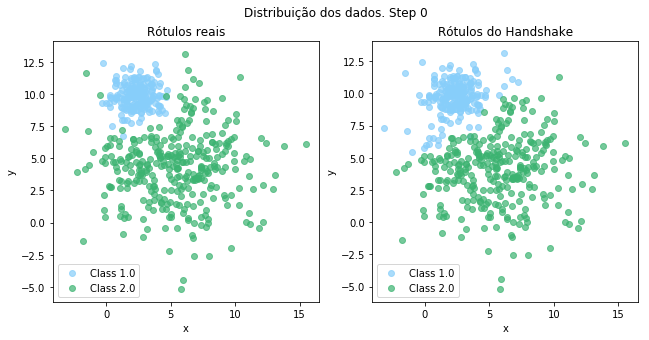

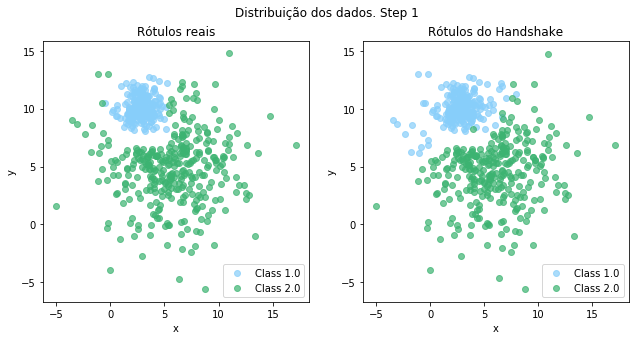

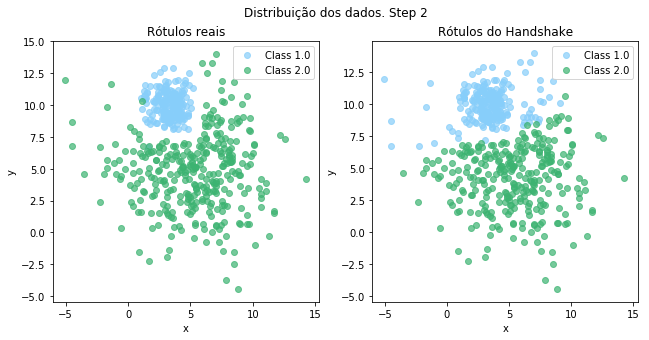

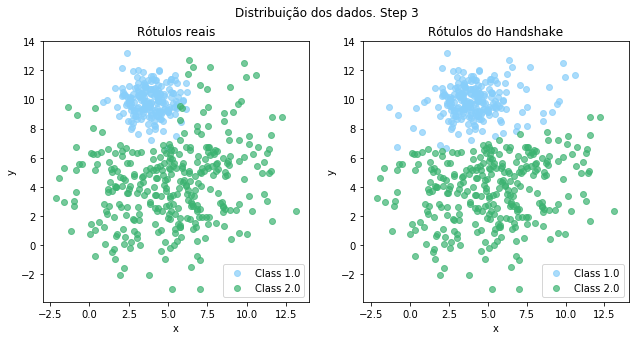

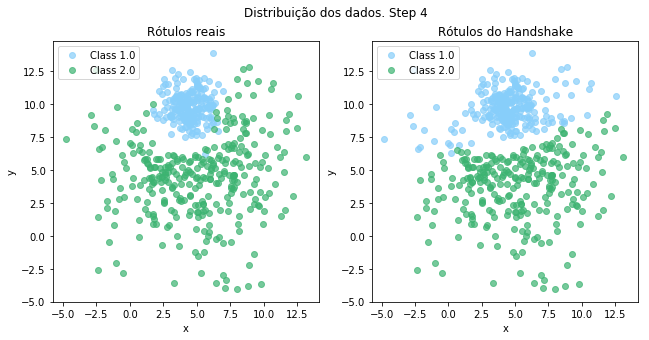

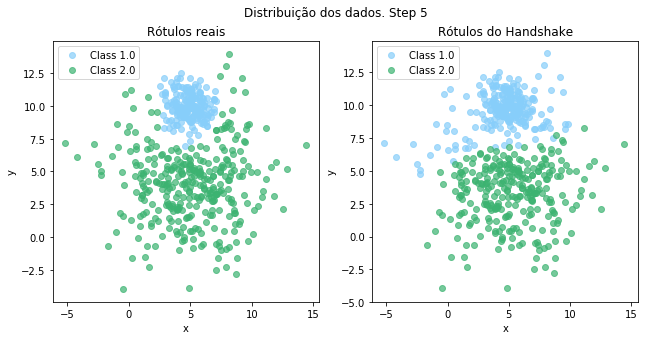

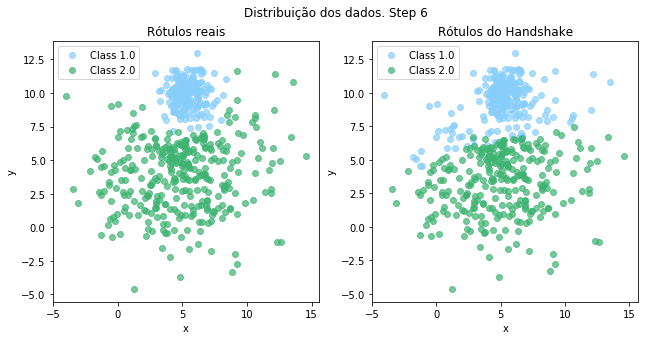

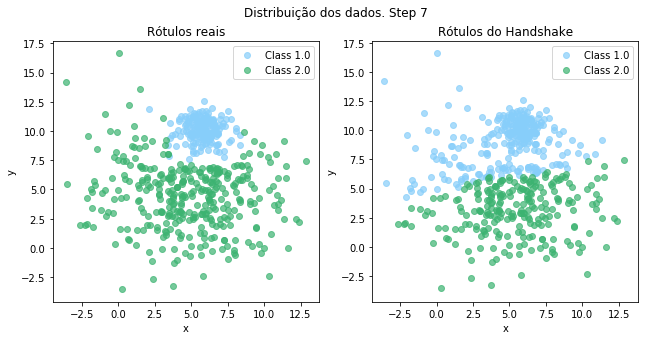

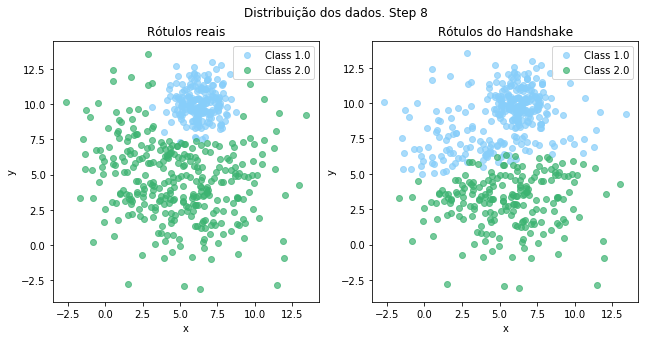

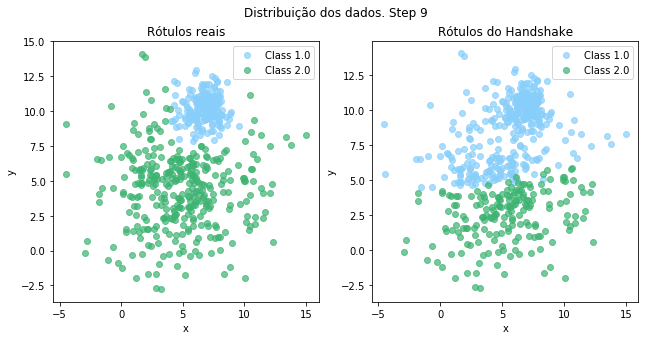

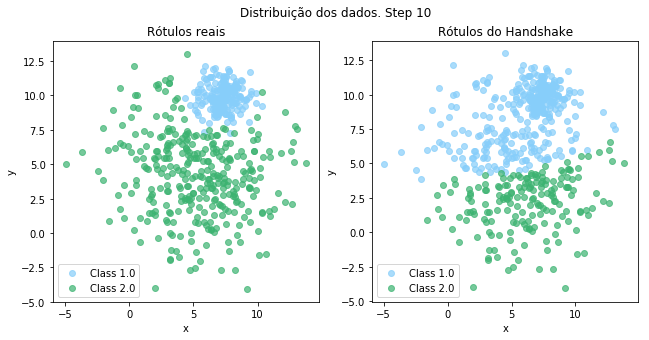

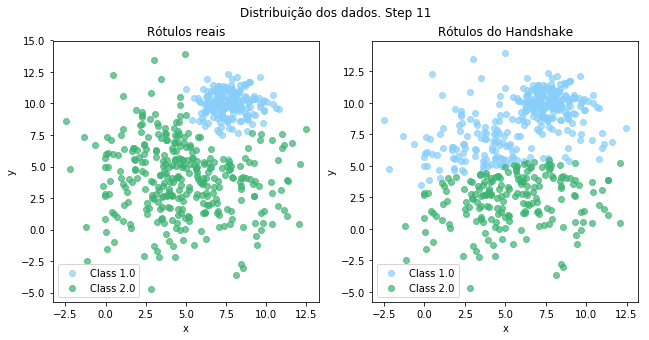

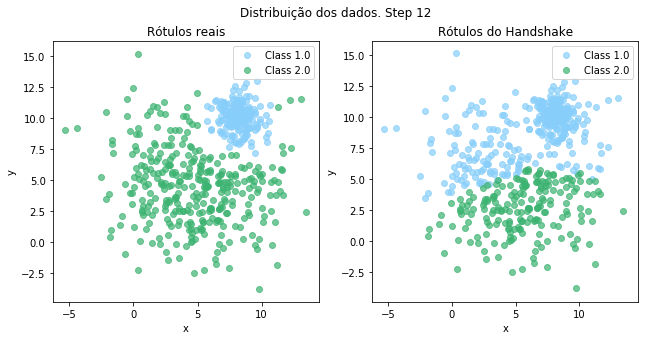

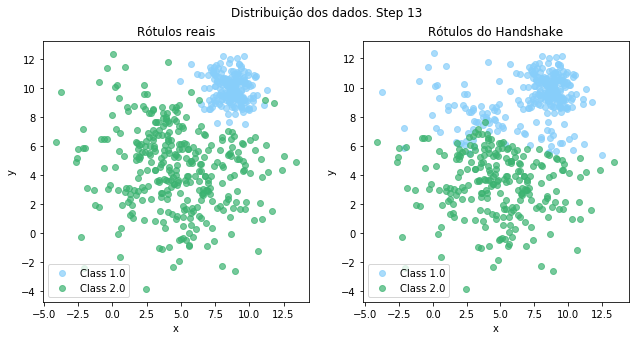

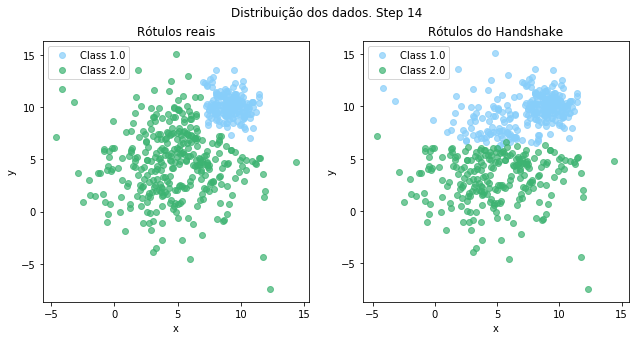

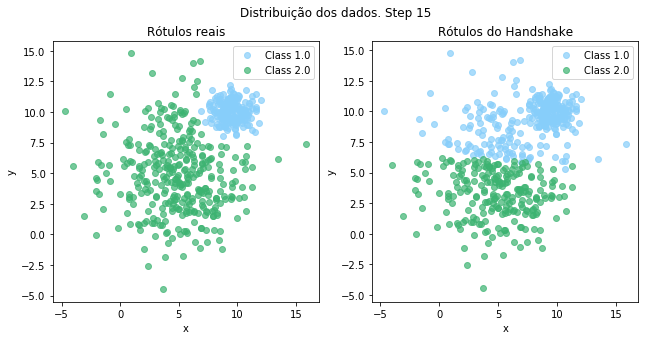

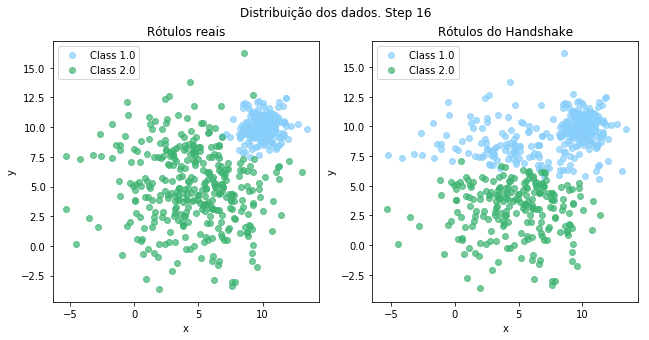

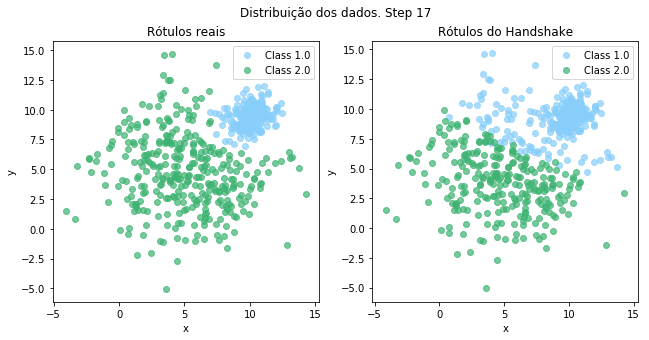

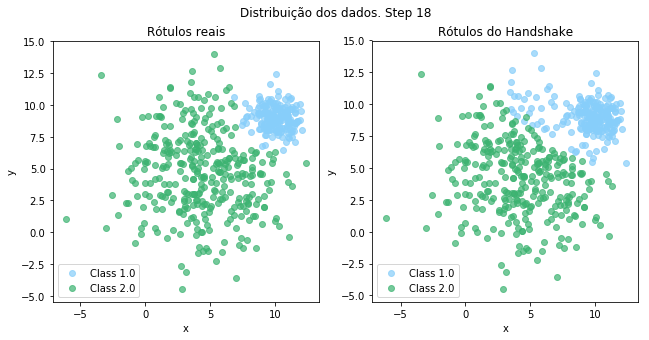

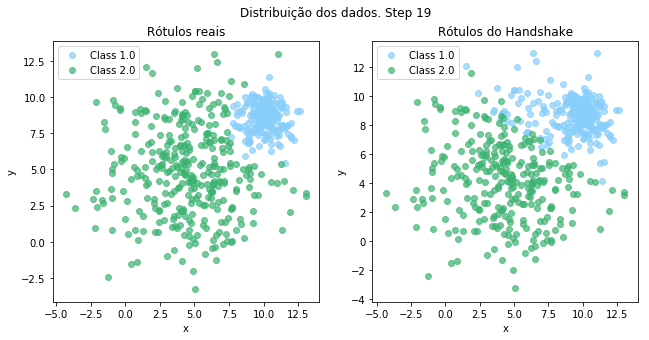

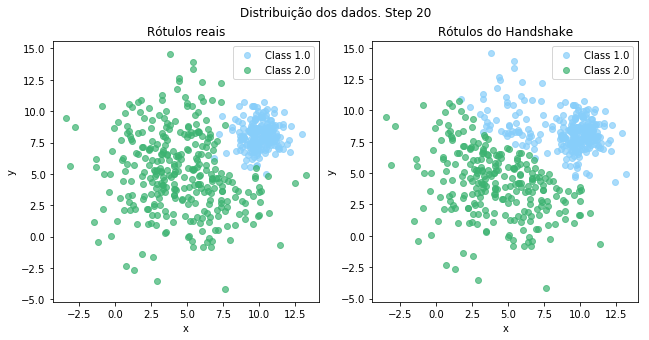

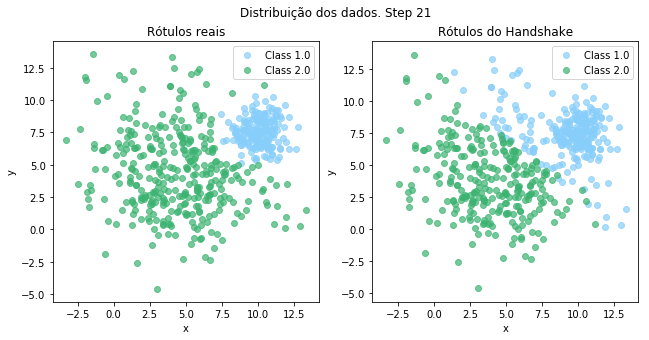

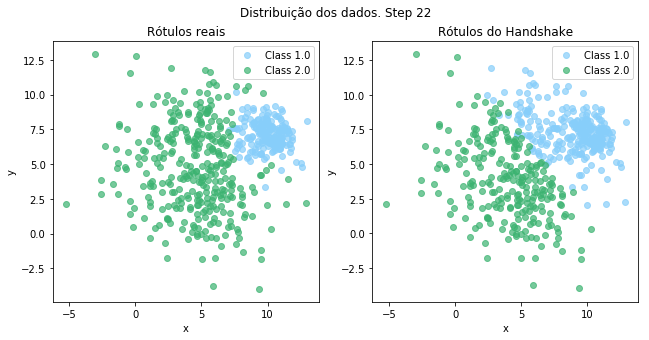

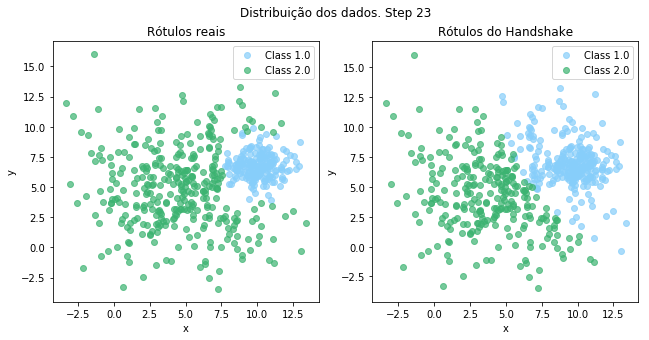

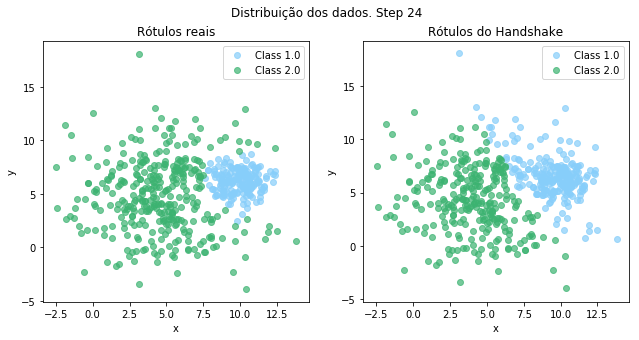

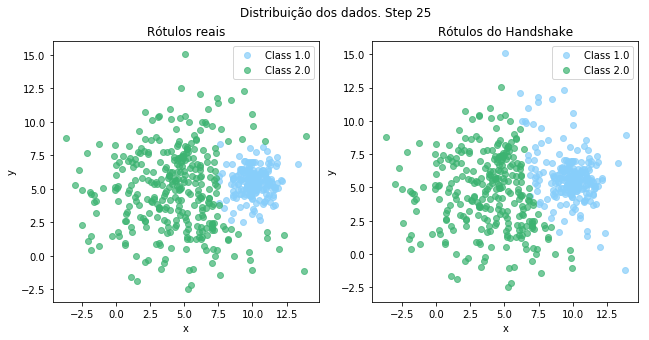

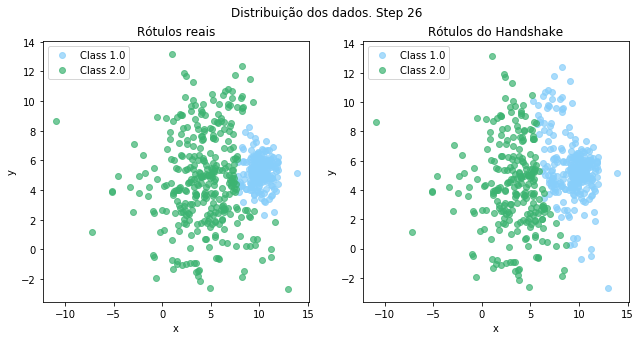

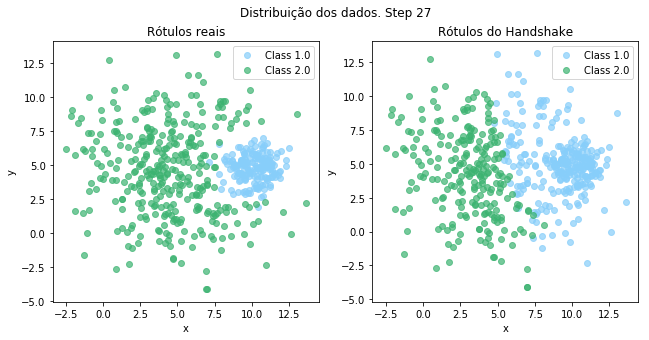

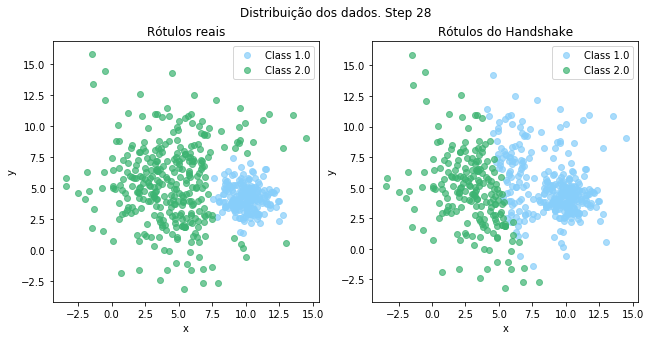

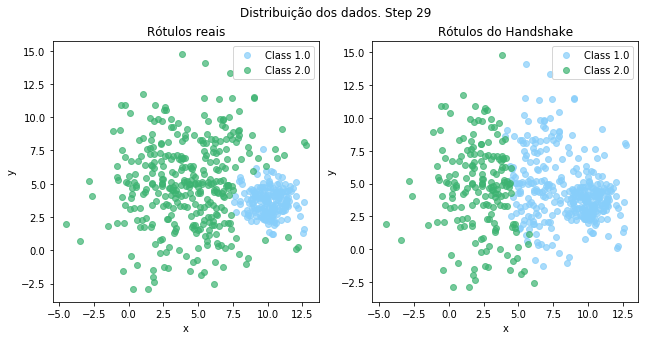

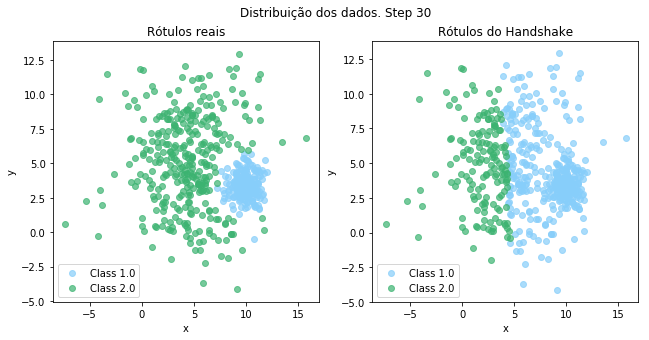

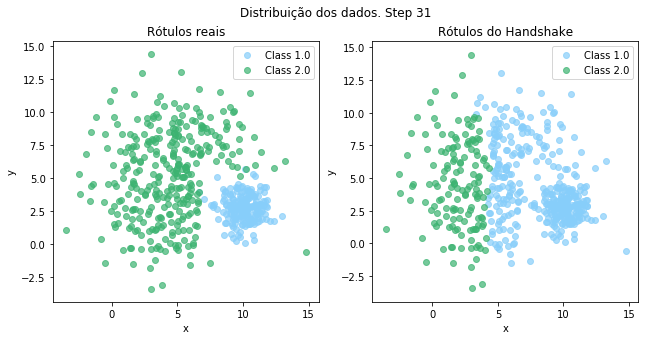

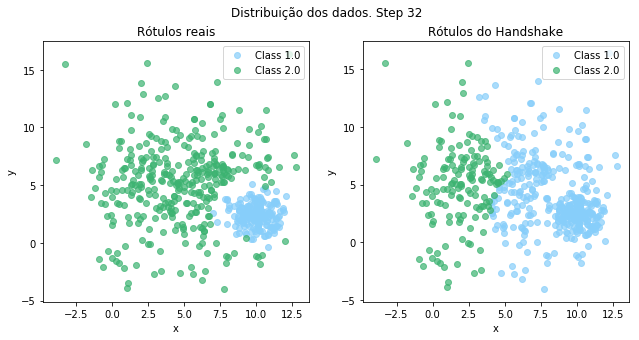

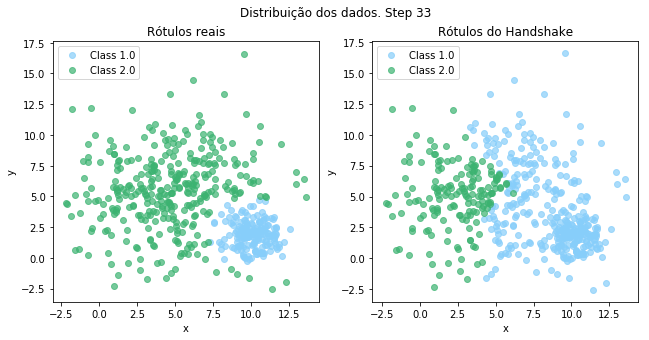

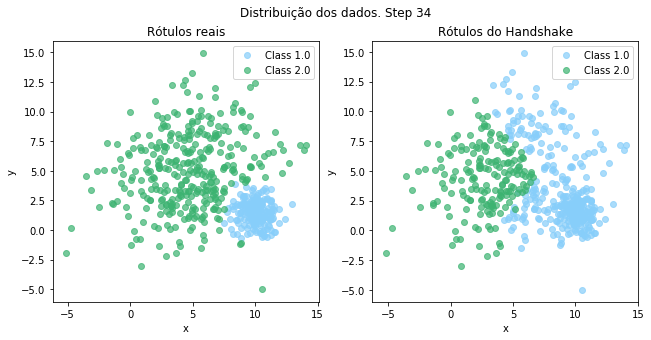

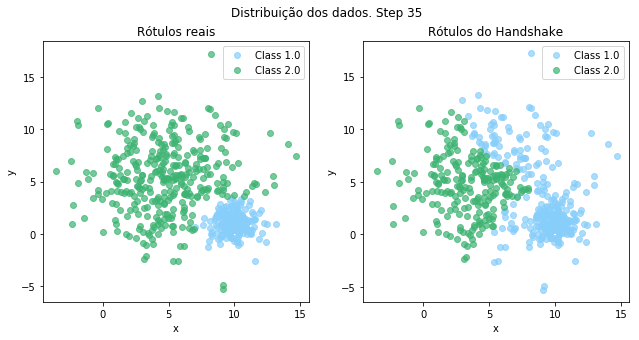

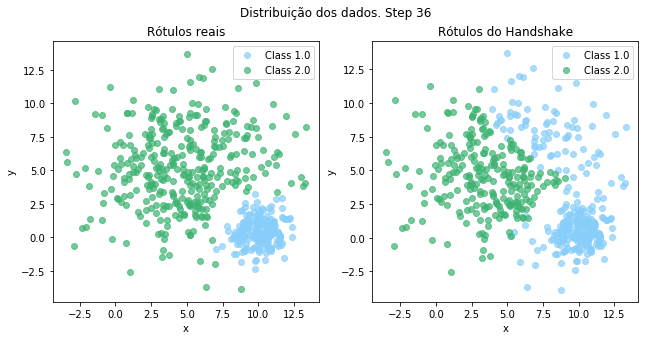

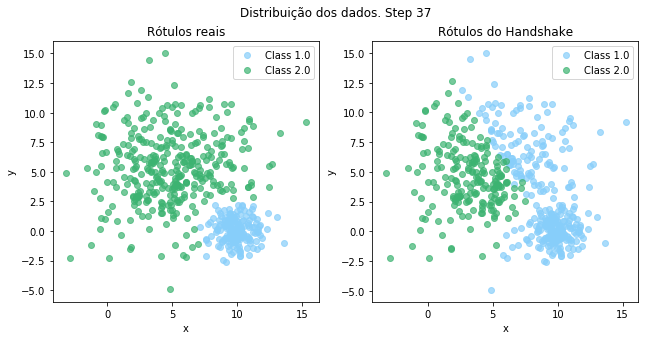

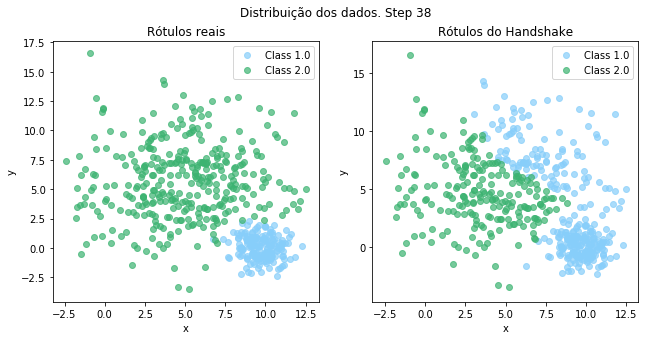

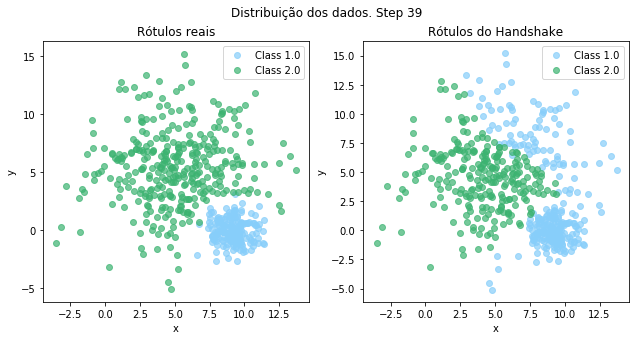

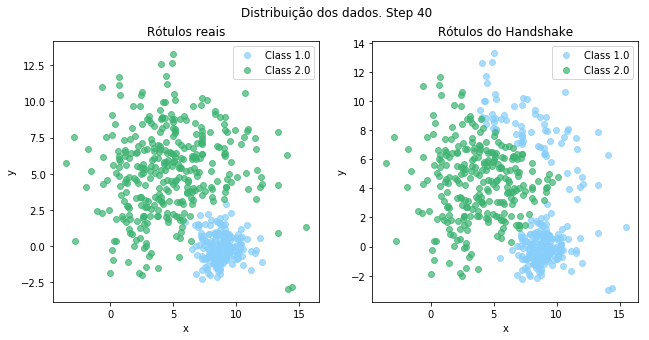

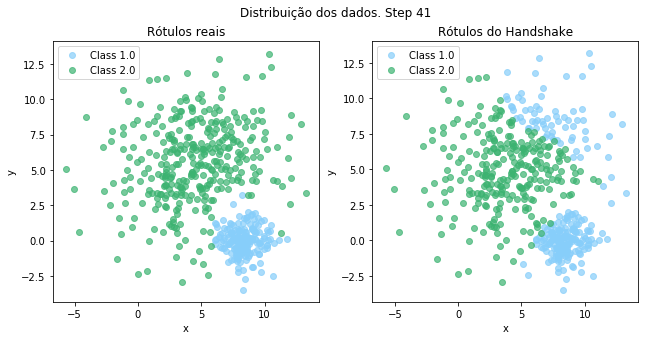

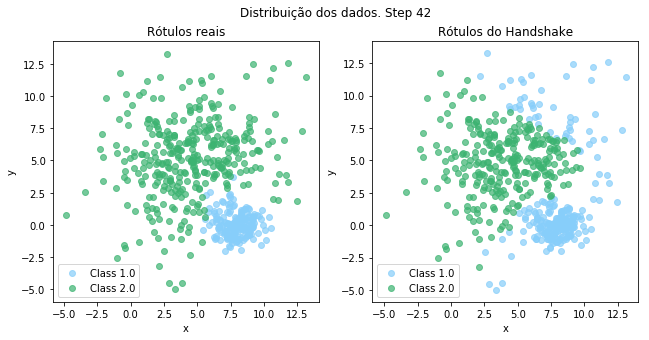

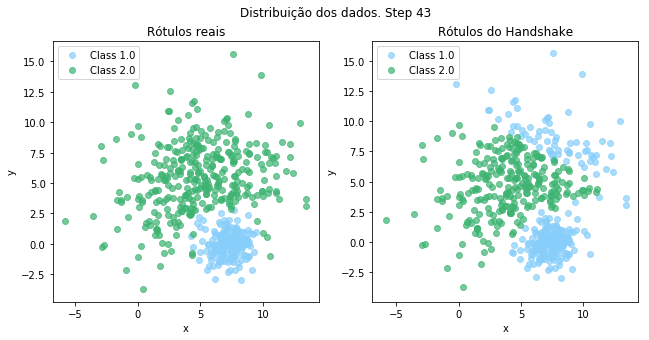

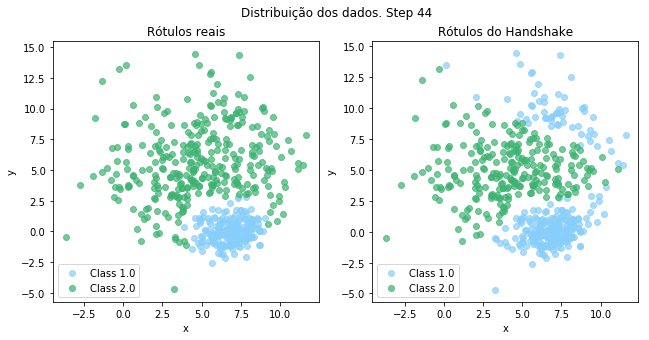

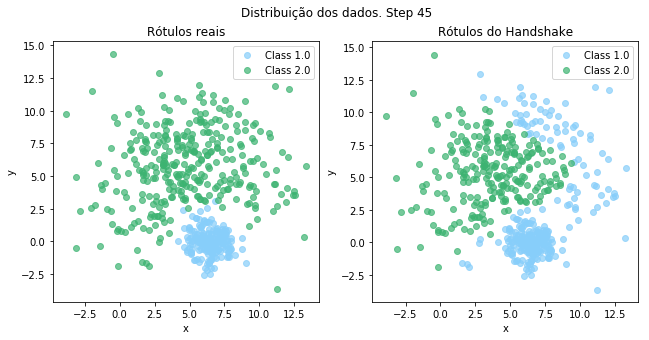

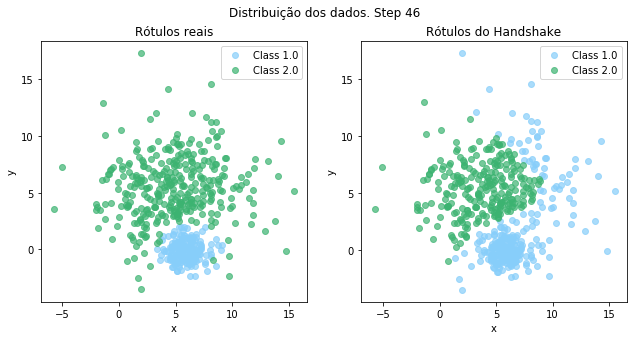

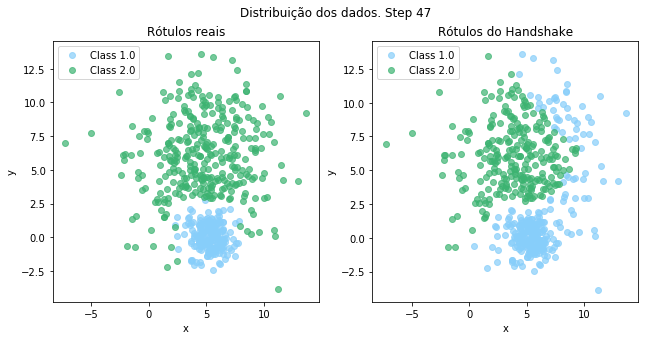

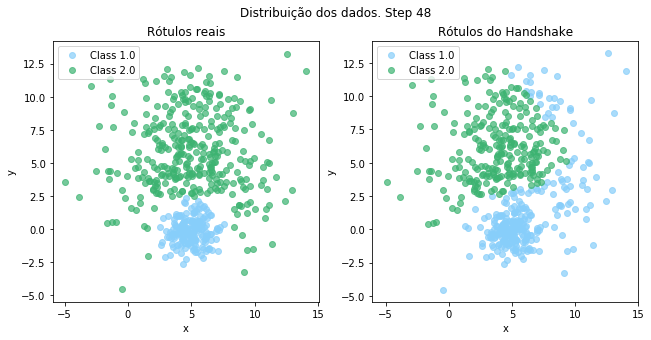

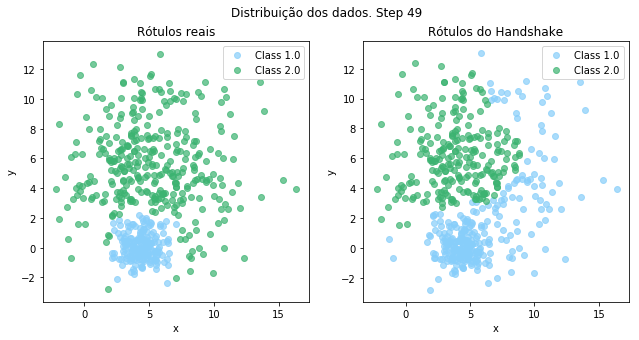

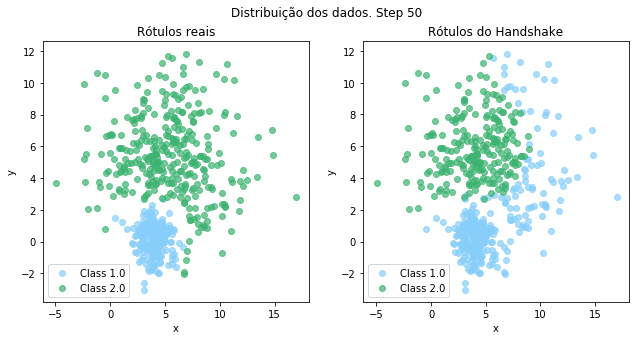

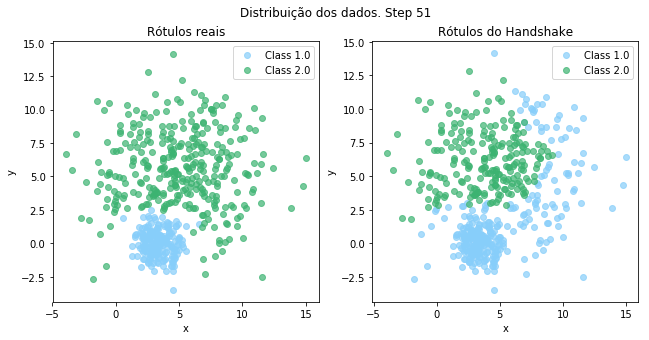

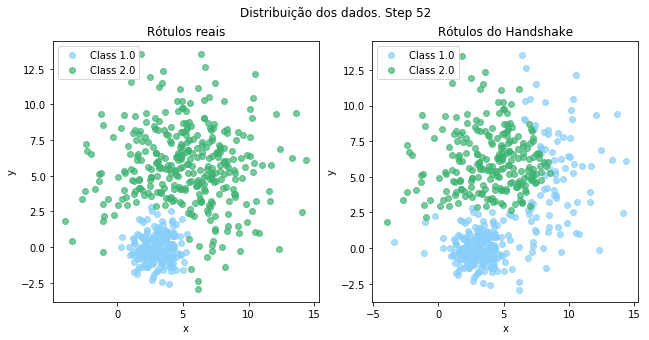

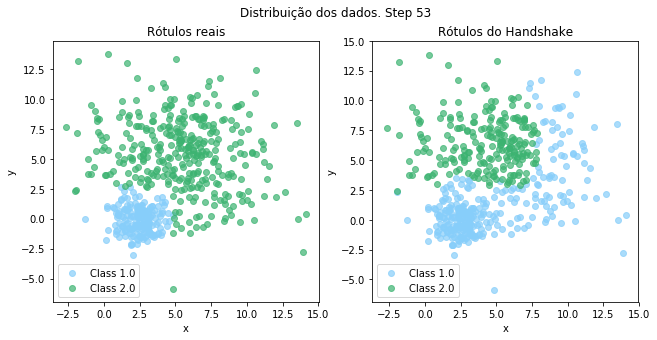

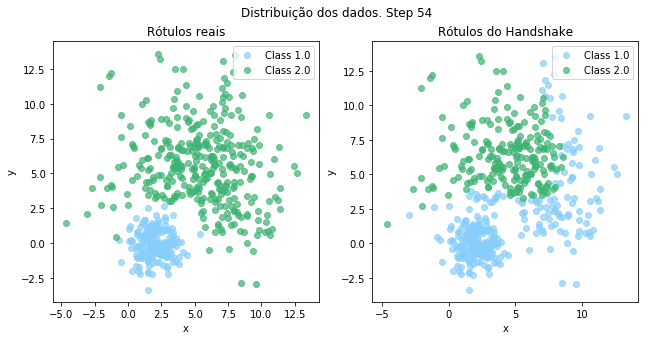

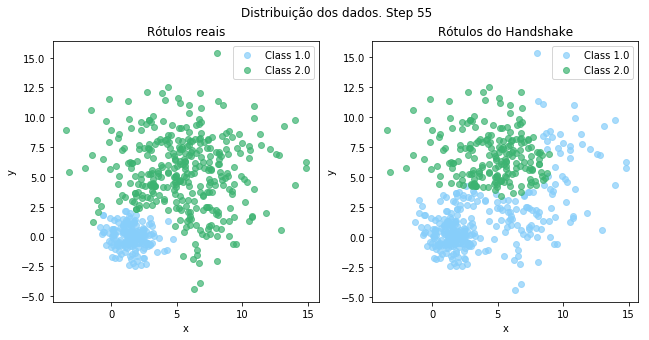

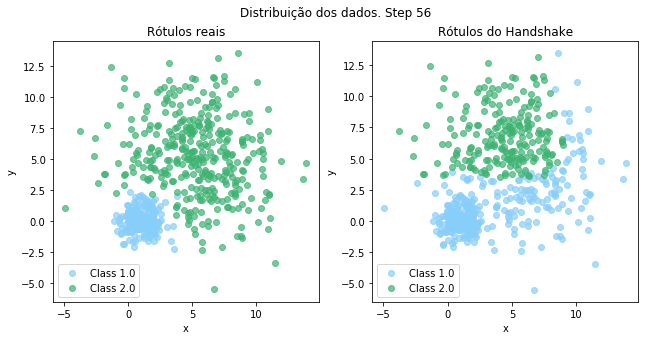

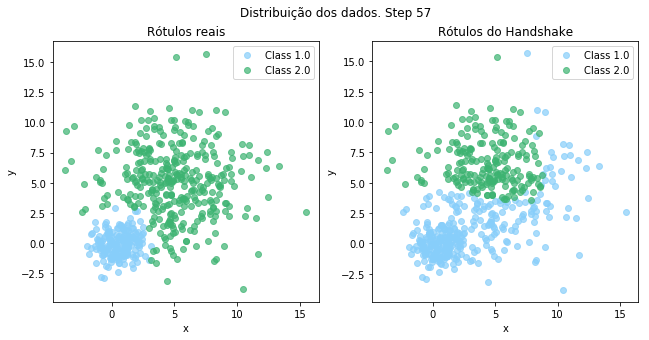

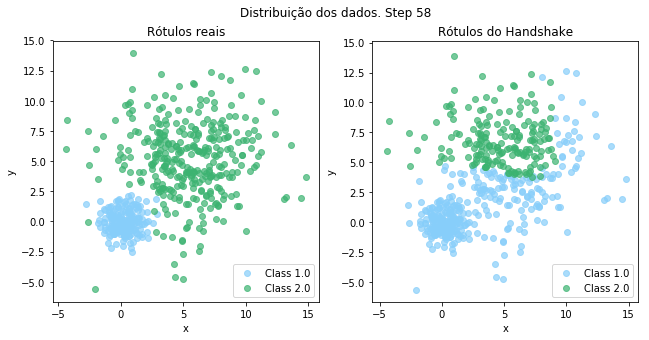

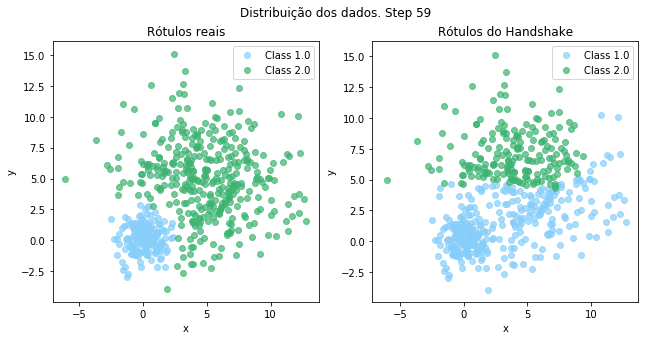

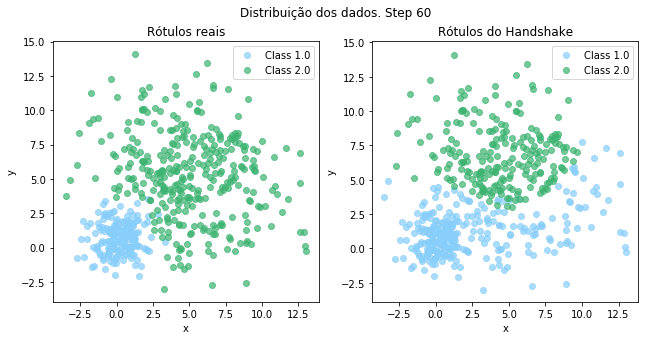

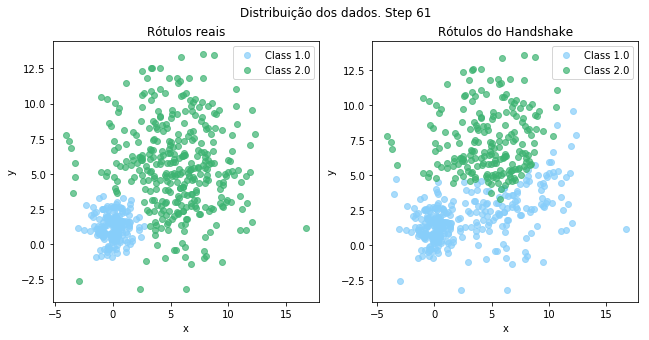

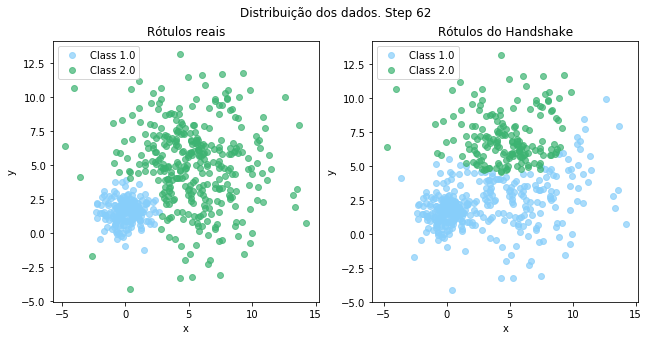

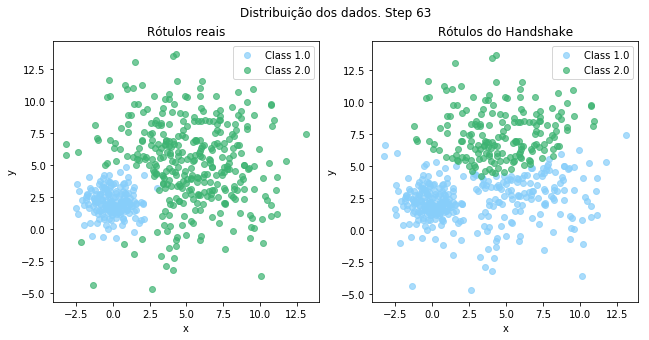

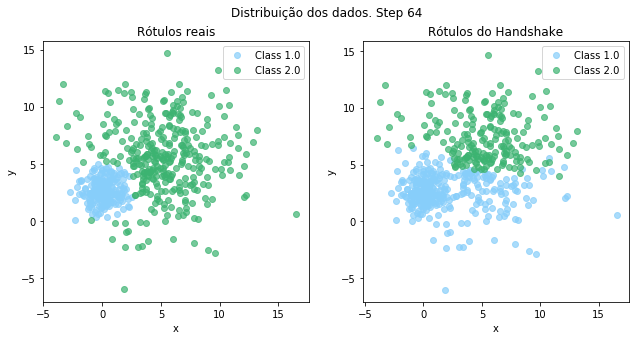

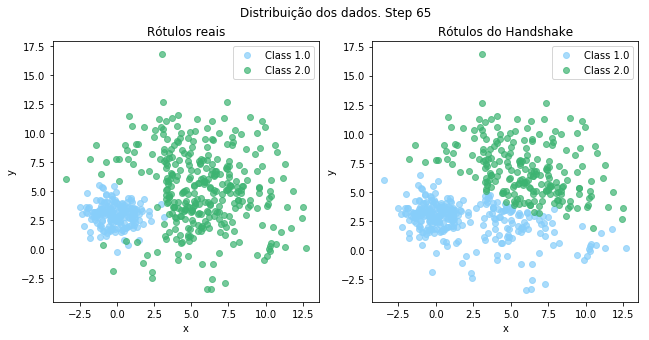

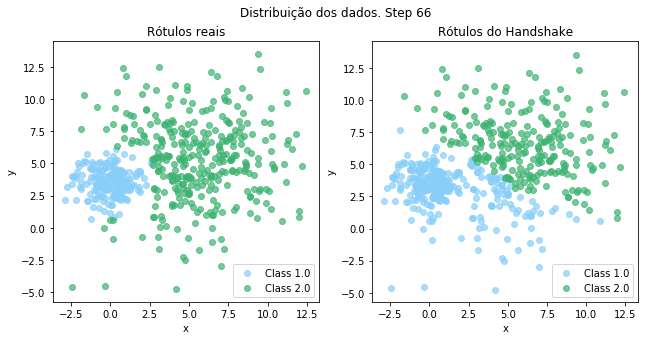

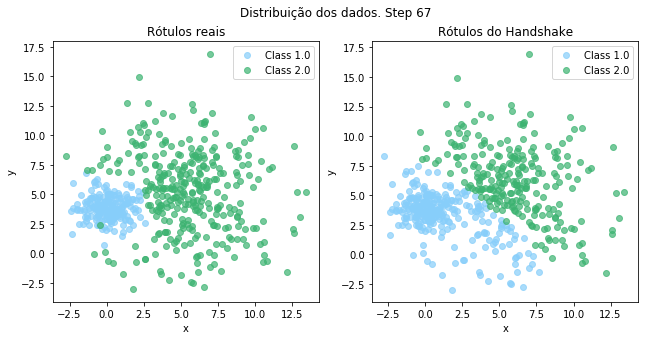

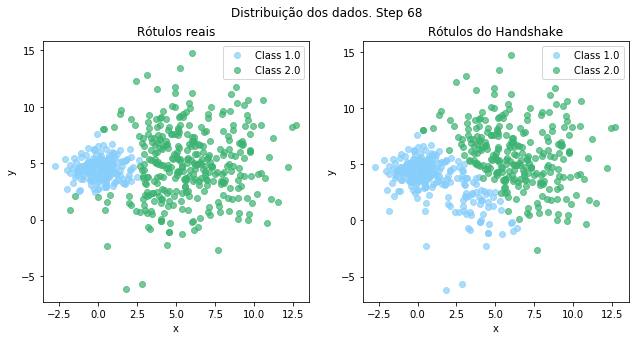

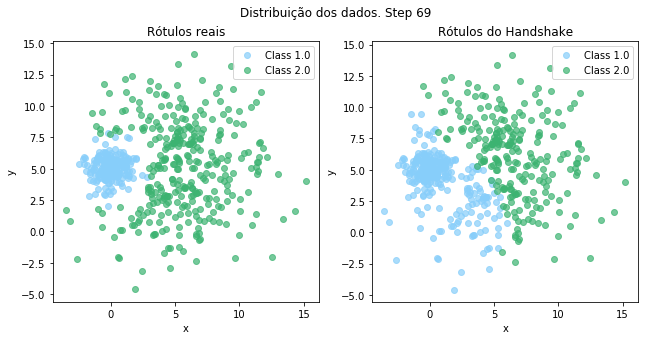

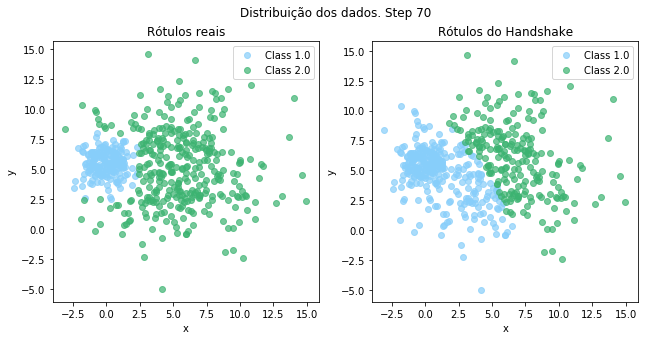

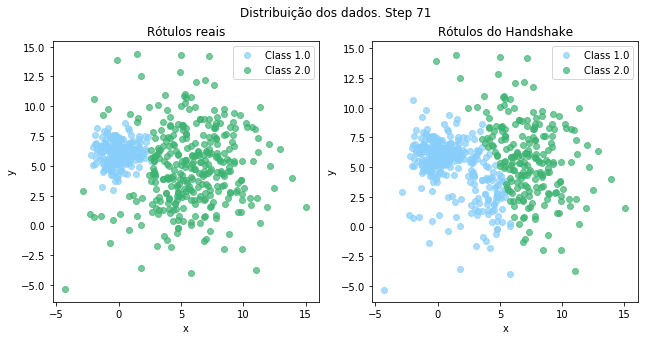

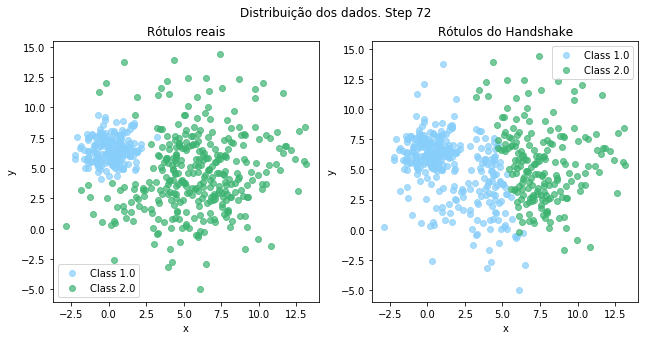

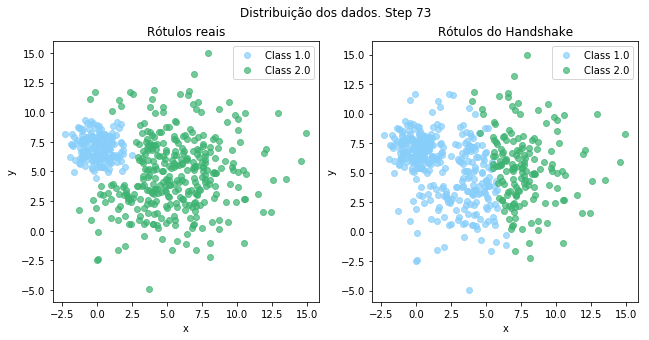

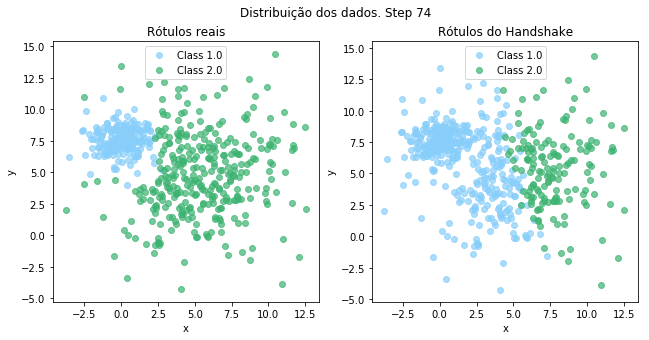

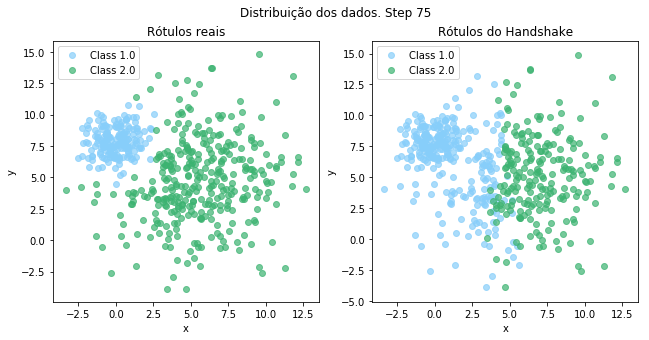

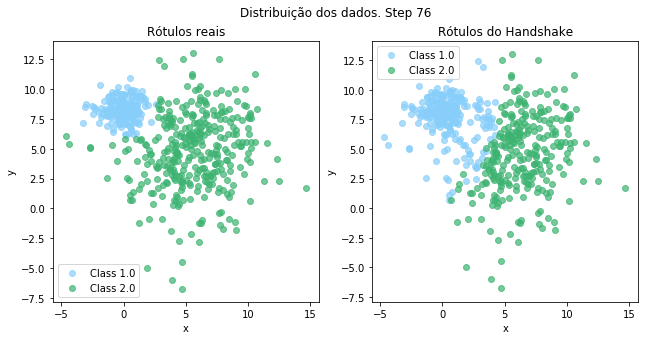

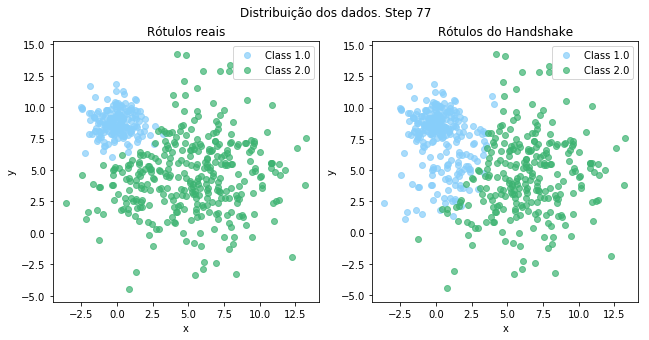

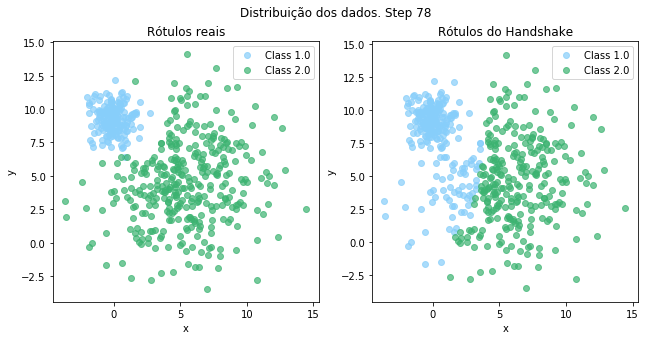

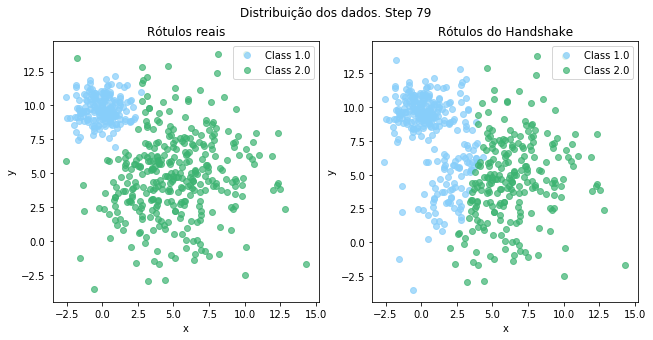

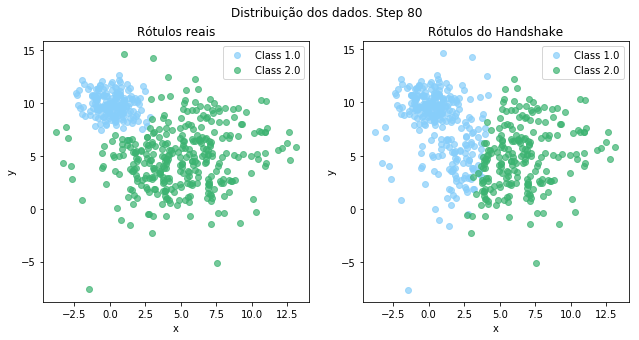

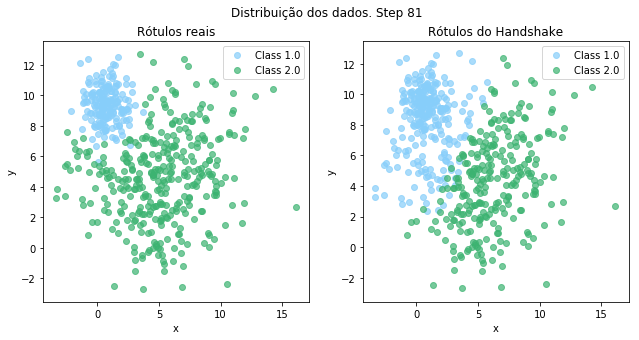

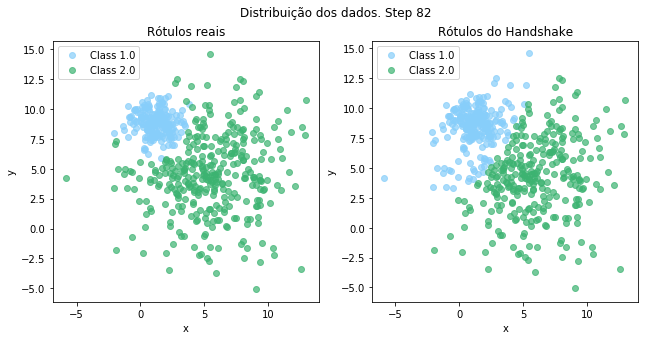

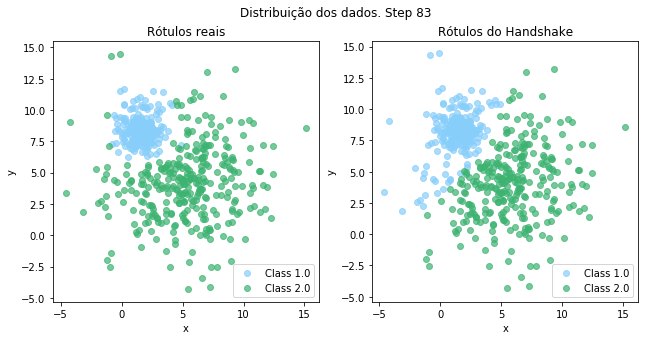

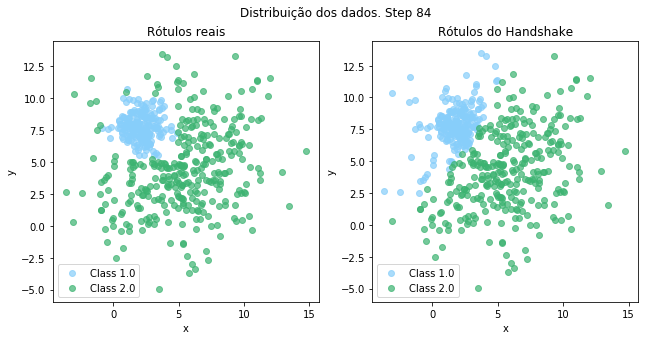

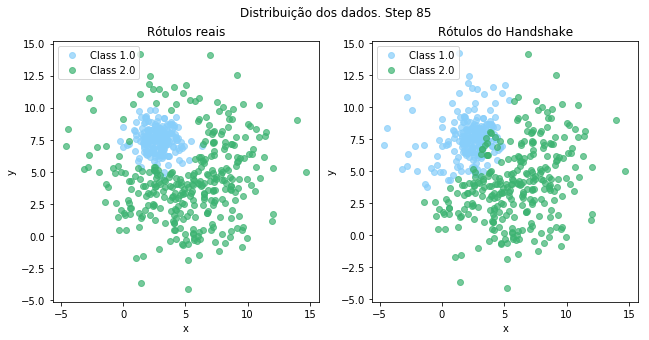

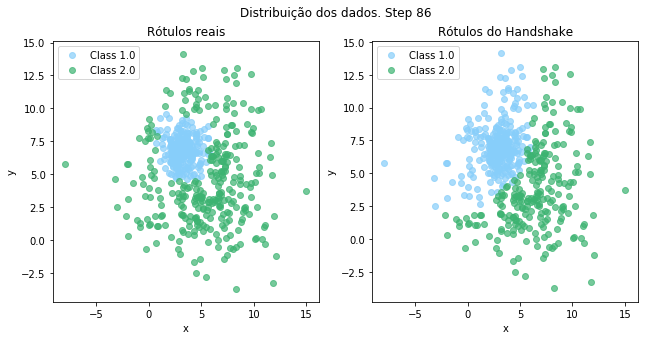

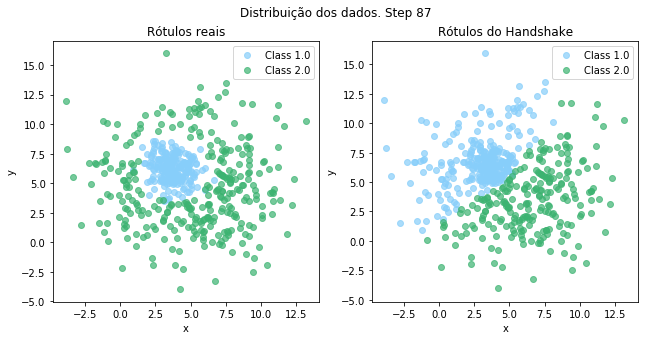

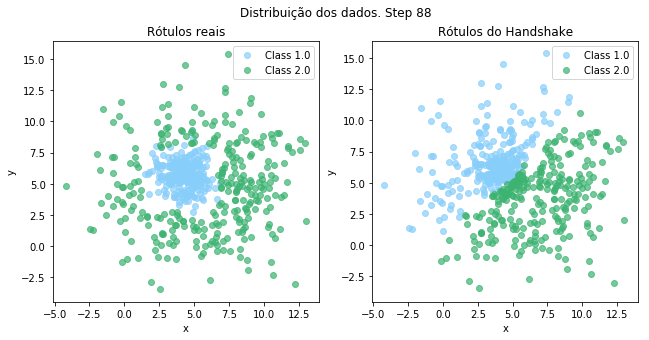

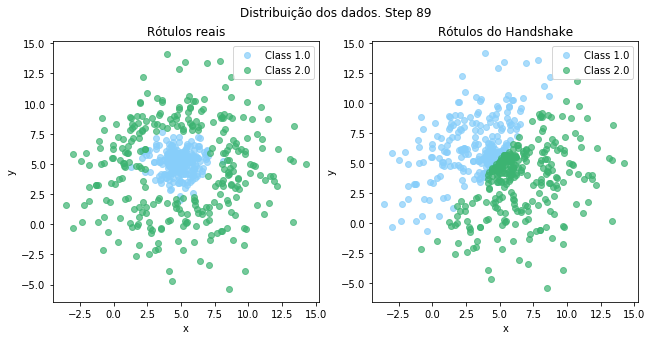

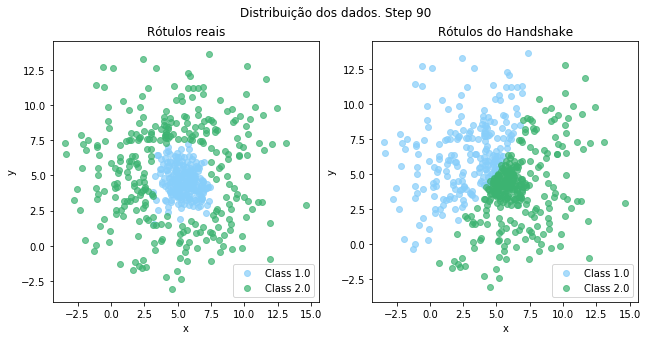

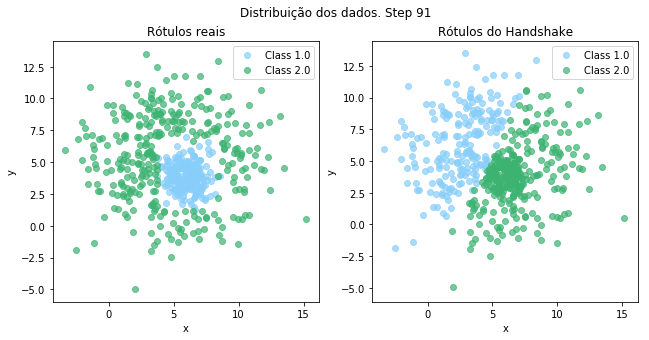

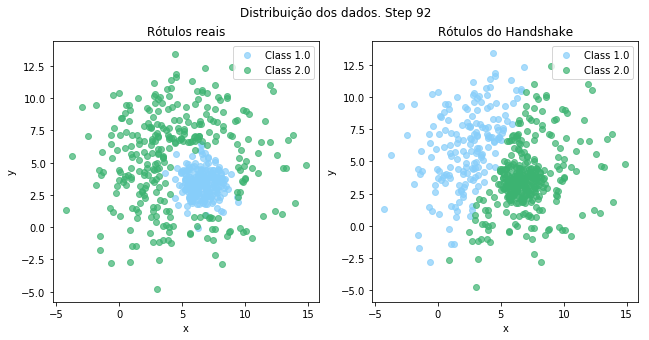

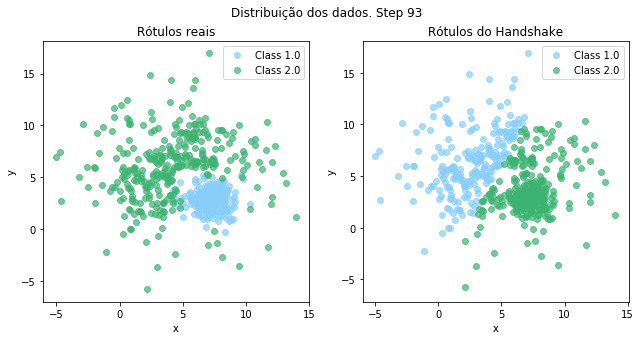

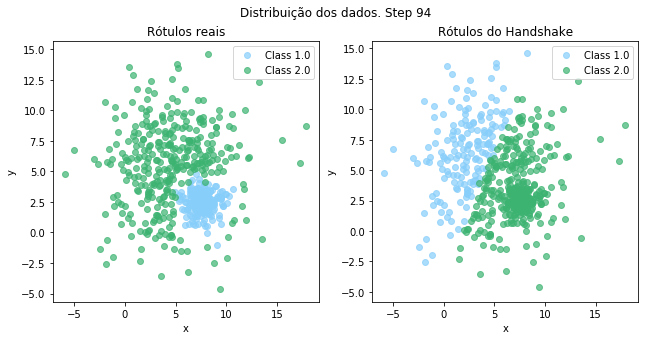

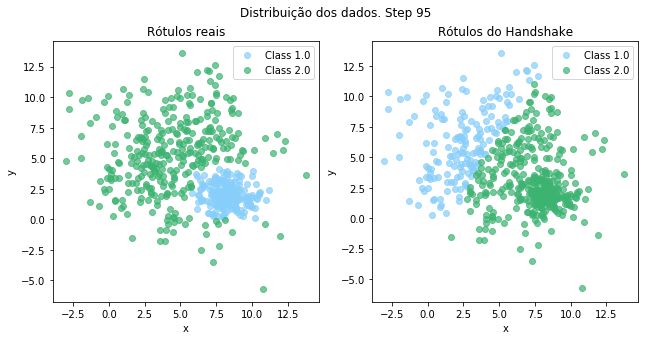

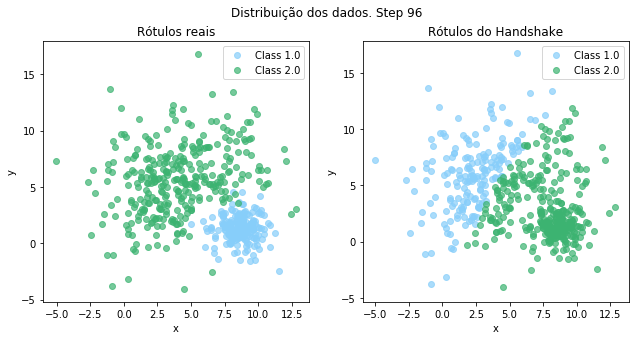

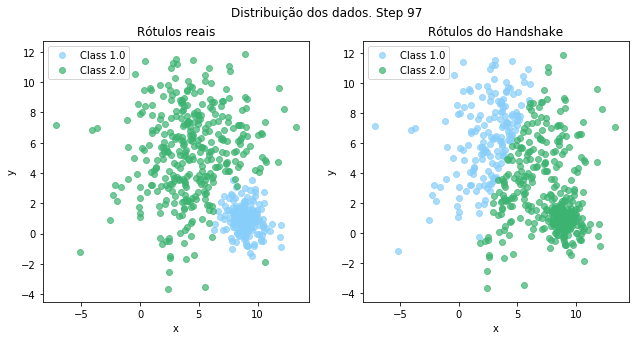

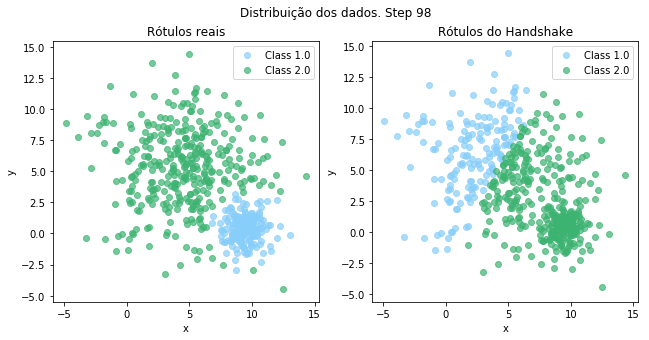

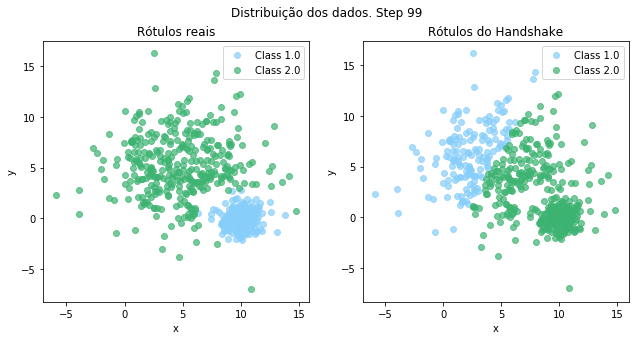

In [7]:
plots.plotPerBatches(stream, predicted, l_stream, len(stream), step)

In [8]:
predictedS = [1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 1., 
 1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  2.,
 1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  2.,
 1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 1., 
 2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  2.,
 1.,  1.,  2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  2.,
 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  2., 2.,
 2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  2.,
 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 1.,  2.,
 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 2.,
 2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 1., 
 1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2.,
 2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
 2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  2.,
 2., 2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  2.,
 2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 2., 2.,
 2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1., 
 1.,  1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 2., 2., 2.,
 1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2.,
 2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 2.,
 1.,  2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  1., 
 2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2.,
 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  1., 
 1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 1., 
 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  2.,
 1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  2.,
 2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 1., 
 2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1., 
 2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  2.,
 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2.,
 2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2.,
 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2.,
 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 2., 2., 2., 2.,
 2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  2.,
 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 2.,
 1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 1., 
 2., 2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 1., 
 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2.,
 2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 2., 2., 2.,
 1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1., 
 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  2.,
 1.,  2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 2.,
 2., 1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 2.,
 2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2.,
 2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  2.,
 2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  2., 2., 2., 1., 
 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 1., 
 2., 2., 2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  2.,
 2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 1., 
 1.,  2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  2.,
 2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  1., 
 2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 1., 
 2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2.,
 2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 1.,  2., 1., 
 2., 1.,  1.,  2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2.,
 2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 2.,
 1.,  2., 2., 1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2.,
 2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 1., 
 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 1., 
 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  1., 
 1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1., 
 2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  2.,
 1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2.,
 2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 1., 
 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2.,
 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  2., 2., 2., 2., 1.,  2., 2.,
 2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2.,
 1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2.,
 2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 2.,
 1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 2.,
 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2.,
 1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  1., 
 2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 2.,
 2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 2., 1., 
 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1., 
 2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2.,
 1.,  2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 2.,
 1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  2.,
 2., 2., 2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 2., 2., 1., 
 1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 1., 
 2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 1.,  2.,
 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 
 2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 2., 2., 2.,
 1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  1., 
 1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 2.,
 1.,  2., 2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  2.,
 2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 2., 2., 2.,
 1.,  1.,  2., 2., 1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1., 
 1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 1., 
 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 1., 
 1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  1., 
 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 2., 2., 1., 
 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  1., 
 2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 1., 
 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  2., 2., 2., 1., 
 2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 1.,  2.,
 1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2.,
 1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 1., 
 2., 1.,  2., 1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  1., 
 2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2.,
 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 1.,  2.,
 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  1., 
 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1., 
 2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  2.,
 2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 2.,
 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 1., 
 2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  1., 
 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2.,
 2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  2., 2.,
 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2.,
 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 2., 2.,
 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2.,
 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,
 2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 2.,
 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 2., 1., 
 1.,  2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1., 
 2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  2.,
 1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 2., 2.,
 2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  1., 
 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 1., 
 1.,  1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1., 
 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2.,
 2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 1., 
 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2.,
 2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 1., 
 2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 2.,
 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1., 
 2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2.,
 2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1., 
 1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  2.,
 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2.,
 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 2., 2.,
 1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1., 
 2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  1., 
 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  1., 
 2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2.,
 1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 2.,
 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 1., 
 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 2.,
 2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 2.,
 2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  1., 
 2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1., 
 2., 1.,  2., 2., 1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 1., 
 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1., 
 2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1., 
 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 2., 2.,
 1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  1., 
 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 2.,
 2., 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2.,
 1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  2.,
 2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 1., 
 2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 2.,
 2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2.,
 2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 2.,
 1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1., 
 2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 1., 
 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1., 
 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1., 
 2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,
 1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  2.,
 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1., 
 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2.,
 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 1., 
 1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  2.,
 2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 2.,
 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 1., 
 1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  1., 
 2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2.,
 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 1., 
 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  2., 1.,  2.,
 1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1., 
 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  1., 
 1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1., 
 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 2., 1., 
 2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  1., 
 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2.,
 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 2.,
 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1., 
 2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1., 
 1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1., 
 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1., 
 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 1., 
 1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 
 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  2.,
 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  2., 1., 
 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1., 
 2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1., 
 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1., 
 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1., 
 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 2.,
 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1., 
 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  2.,
 2., 2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 2.,
 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 2.,
 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1., 
 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2., 2.,
 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 2.,
 1.,  2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2.,
 2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  1.,  1., 
 2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1., 
 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2.,
 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  1., 
 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2.,
 2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1., 
 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  1., 
 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 2.,
 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,
 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1., 
 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2.,
 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2.,
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2.,
 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1., 
 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1., 
 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1., 
 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1., 
 1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2.,
 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1., 
 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 
 2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1., 
 1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  2.,
 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 1., 
 1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2.,
 1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1., 
 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1., 
 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1., 
 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1., 
 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1., 
 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1., 
 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 2.,
 1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2.,
 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  2.,
 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1., 
 2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1., 
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 1., 
 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1., 
 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2.,
 1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  1., 
 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1., 
 2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1., 
 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1., 
 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1., 
 1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 1., 
 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1., 
 1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2.,
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 1., 
 1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1., 
 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1., 
 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1., 
 1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2.,
 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  1., 
 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1., 
 2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2.,
 2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2.,
 2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1., 
 1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  1., 
 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 2.,
 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2.,
 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 2., 1., 
 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  1., 
 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,
 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,
 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1., 
 1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 1., 
 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2.,
 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  1., 
 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1., 
 2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  1., 
 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 1., 
 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 
 2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1., 
 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 1., 
 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2.,
 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 1., 
 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1., 
 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2.,
 2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1., 
 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2.,
 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1., 
 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2.,
 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2.,
 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  1., 
 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2.,
 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  1., 
 2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1., 
 1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1., 
 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 1., 
 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 
 1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2.,
 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1., 
 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2.,
 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2.,
 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1., 
 2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 2.,
 2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2.,
 2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  2., 2., 2.,
 1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 2.,
 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 2., 2., 2., 1.,  2.,
 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 2.,
 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 2.,
 2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 2.,
 1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1., 
 1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2.,
 1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  2.,
 1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2.,
 1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  1., 
 1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2.,
 1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1., 
 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2.,
 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  1.,  2., 1.,  1., 
 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1., 
 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1., 
 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  2.,
 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 2.,
 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  2.,
 2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2.,
 2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2.,
 2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1., 
 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2.,
 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  2.,
 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 2., 2.,
 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1., 
 2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1., 
 1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 2., 1., 
 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 1., 
 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1., 
 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 2.,
 2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2.,
 1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 1., 
 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1., 
 1.,  1.,  2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2.,
 2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  2.,
 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 1., 
 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1., 
 1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1., 
 1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 1., 
 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1., 
 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1., 
 2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 1., 
 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 2.,
 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 1., 
 2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  1., 
 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1., 
 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2.,
 1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 1., 
 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1., 
 1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 2.,
 2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 1.,  1., 
 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1., 
 2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 1., 
 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2.,
 2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  1., 
 2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2.,
 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2.,
 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2.,
 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2.,
 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1., 
 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2.,
 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1., 
 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 1., 
 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1., 
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  2.,
 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 1., 
 2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  2.,
 2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2.,
 1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2.,
 1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  2.,
 1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2.,
 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1., 
 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 1., 
 2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 1., 
 2., 2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  2.,
 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 2.,
 1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1., 
 2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1., 
 1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1., 
 2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  1., 
 2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1., 
 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 2.,
 2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 1., 
 2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  2.,
 1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 1., 
 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  2.,
 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 2.,
 1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1., 
 2., 1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2.,
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1., 
 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2.,
 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  2., 1.,  1., 
 2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 2.,
 2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  1., 
 1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2.,
 2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1., 
 2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1., 
 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 2.,
 1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1., 
 2., 2., 2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 2.,
 2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  2., 2.,
 2., 2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 1., 
 1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 2.,
 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 2.,
 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 1., 
 2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 1., 
 1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  2.,
 2., 2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2.,
 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1., 
 1.,  2., 1.,  2., 2., 1.,  2., 2., 2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  1., 
 1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 2.,
 1.,  2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 1., 
 1.,  2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 2.,
 1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1., 
 1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 2., 2.,
 2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  1., 
 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 1., 
 2., 2., 1.,  2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 1., 
 2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1., 
 2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 2.,
 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2.,
 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1., 
 2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 2., 2., 2.,
 2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 1., 
 2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 1., 
 1.,  2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  1., 
 2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 1., 
 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 1., 
 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 2.,
 2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 2., 1., 
 2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  1.,  1., 
 1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 1., 
 2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 1., 
 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  1., 
 2., 1.,  2., 2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  1., 
 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 2.,
 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1., 
 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2.,
 2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1., 
 2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 2.,
 1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1., 
 1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 1., 
 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2.,
 2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  1., 
 1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1., 
 1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  2.,
 2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  1., 
 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2.,
 2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  2.,
 1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1., 
 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1., 
 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  2.,
 2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1., 
 2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  1., 
 2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  2., 1.,  1., 
 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  2., 1., 
 2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2.,
 2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 1., 
 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 2., 1.,  1.,  1., 
 2., 1.,  2., 1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1., 
 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1., 
 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1., 
 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2.,
 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 2.,
 1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 1., 
 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  2.,
 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  1., 
 2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 2.,
 2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  1., 
 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 2.,
 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 2., 2., 2., 1.,  1.,  1.,  1., 
 2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2.,
 1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2.,
 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 2.,
 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  2.,
 1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 2.,
 2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  1., 
 2., 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  1., 
 2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 1., 
 1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  1., 
 2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1., 
 1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  1., 
 1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1., 
 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  1., 
 2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 1., 
 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 1., 
 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1., 
 2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  1., 
 2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1., 
 2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 1., 
 1.,  2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1., 
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2.,
 1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 2., 2., 2., 1.,  1.,  2., 1.,  2.,
 1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2.,
 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  1., 
 2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1., 
 2., 1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1., 
 1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 1., 
 2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 1., 
 1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2.,
 2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2.,
 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1., 
 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  1., 
 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  1., 
 1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2.,
 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  2.,
 1.,  2., 1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  2.,
 1.,  1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2.,
 2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 2., 2., 1.,  1.,  1., 
 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 2.,
 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2.,
 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  1., 
 1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  2.,
 1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1., 
 2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 1., 
 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2.,
 1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  1.,  2., 1., 
 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 1., 
 2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2.,
 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 2.,
 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2.,
 2., 2., 1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 2.,
 1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1., 
 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 1., 
 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1., 
 2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 1., 
 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2.,
 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2.,
 2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1., 
 1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1., 
 1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1., 
 2., 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 1., 
 1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 2., 2., 2., 1.,  1., 
 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  2.,
 1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 1., 
 1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 2.,
 2., 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2.,
 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 2.,
 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1., 
 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 1., 
 2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2.,
 2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 2.,
 1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  2.,
 1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 1.,  2.,
 2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 2.,
 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1., 
 2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  2.,
 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 1., 
 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 1., 
 1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 2.,
 1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 2., 2.,
 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  2.,
 2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  2.,
 2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 1., 
 2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  2.,
 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 2., 2., 2., 2.,
 2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 1., 
 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  2.,
 2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  2.,
 2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1., 
 2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  1., 
 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 2., 2.,
 2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 1., 
 2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 2.,
 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2.,
 2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  1., 
 1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1., 
 1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 2.,
 2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 2., 2.,
 1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2.,
 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 2.,
 1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  2.,
 2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 1., 
 2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  1., 
 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2.,
 2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1., 
 1.,  1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 1., 
 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 2.,
 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 2.,
 1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2.,
 2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 2.,
 1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  2.,
 1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  2.,
 1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  2.,
 2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 2.,
 1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1., 
 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  1., 
 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1., 
 1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2.,
 1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  1., 
 2., 2., 2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  1., 
 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 1., 
 2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 1., 
 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  2.,
 1.,  2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1., 
 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  2.,
 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 2.,
 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 2., 2.,
 2., 2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1., 
 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 2.,
 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1., 
 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2.,
 1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2.,
 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 1., 
 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 2., 2.,
 2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1., 
 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2.,
 1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1., 
 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 2., 2., 1., 
 1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 1., 
 2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 2.,
 2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2.,
 2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2.,
 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2., 1., 
 2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 1., 
 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  2.,
 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 1., 
 1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 2.,
 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1., 
 2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2.,
 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2.,
 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2.,
 2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1., 
 1.,  1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1., 
 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  1., 
 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1., 
 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1., 
 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1., 
 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 1., 
 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1., 
 2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  2.,
 1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1., 
 2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1., 
 2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1., 
 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 1., 
 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2.,
 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1., 
 2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1., 
 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2.,
 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2.,
 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2.,
 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2.,
 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  1., 
 2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2.,
 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 2.,
 2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2.,
 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1., 
 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  2.,
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1., 
 1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 2., 1.,  2.,
 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2.,
 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2.,
 1.,  1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 2.,
 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  1., 
 1.,  2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 1., 
 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1., 
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1., 
 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1., 
 2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1., 
 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1., 
 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1., 
 2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1., 
 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2.,
 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2.,
 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1., 
 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2.,
 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1., 
 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1., 
 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2.,
 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1., 
 2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1., 
 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1., 
 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1., 
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1., 
 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2.,
 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2.,
 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1., 
 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1., 
 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2.,
 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 2.,
 2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2.,
 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1., 
 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2.,
 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1., 
 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1., 
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  1., 
 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 2.,
 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1., 
 1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1., 
 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 
 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2.,
 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  1., 
 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1., 
 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2.,
 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1., 
 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2.,
 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 2.,
 2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1., 
 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1., 
 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1., 
 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1., 
 1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1., 
 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1., 
 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  1., 
 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1., 
 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 
 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1., 
 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2.,
 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 1., 
 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 
 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1., 
 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1., 
 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2.,
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 
 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1., 
 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1., 
 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2.,
 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1., 
 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  1., 
 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1., 
 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1., 
 2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1., 
 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1., 
 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 2.,
 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1., 
 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 
 2., 2., 1.,  2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2.,
 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 1., 
 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2.,
 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1., 
 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1., 
 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2.,
 2., 2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1., 
 1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1., 
 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2.,
 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1., 
 2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 1., 
 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2.,
 1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2.,
 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1., 
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 2.,
 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1., 
 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1., 
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1., 
 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1., 
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1., 
 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2.,
 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  2.,
 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 1., 
 2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2.,
 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2.,
 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1., 
 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1., 
 1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2.,
 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  1., 
 1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  2.,
 2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,
 2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 2.,
 2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2.,
 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  2.,
 2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 1., 
 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1., 
 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  2., 1., 
 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1., 
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 
 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  2.,
 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1., 
 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  2.,
 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2.,
 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  2.,
 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2.,
 1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2.,
 2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2.,
 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1., 
 2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 2.,
 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2.,
 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 2.,
 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1., 
 2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2.,
 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 2.,
 1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1., 
 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1., 
 2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1., 
 2., 2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  1., 
 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  1., 
 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1., 
 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 1., 
 1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  2.,
 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2.,
 2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 2.,
 1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2.,
 1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2.,
 1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2.,
 2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 2.,
 2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1., 
 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 2.,
 1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 2.,
 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 1., 
 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 1., 
 2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 1., 
 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1., 
 2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  1., 
 1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 1.,  2., 1., 
 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 2.,
 1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1., 
 2., 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1., 
 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1., 
 1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1., 
 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2.,
 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 2.,
 2., 2., 2., 1.,  2., 2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2.,
 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1., 
 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1., 
 2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1., 
 1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  1., 
 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1., 
 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1., 
 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1., 
 1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2.,
 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1., 
 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1., 
 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2.,
 1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1., 
 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1., 
 2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  1., 
 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2.,
 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1., 
 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 1., 
 1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 2.,
 1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1., 
 1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  2.,
 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2.,
 1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 1., 
 1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  1., 
 1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  2., 2.,
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 1., 
 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 1., 
 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1., 
 2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1., 
 1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2.,
 2., 2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2.,
 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2.,
 1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1., 
 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  1., 
 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 1., 
 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 1., 
 1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  2., 2., 2.,
 2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2.,
 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 1., 
 2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 2.,
 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  1., 
 2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2.,
 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1., 
 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  1., 
 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2.,
 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1., 
 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1., 
 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2.,
 2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 1., 
 2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1., 
 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  1., 
 1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  1., 
 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 2.,
 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  2.,
 2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2.,
 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 1., 
 2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  1., 
 2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  1., 
 2., 1.,  1.,  2., 2., 1.,  2., 2., 2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  1., 
 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  2., 2.,
 2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2.,
 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1., 
 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1., 
 2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 2.,
 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  1., 
 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  1., 
 2., 2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 2.,
 1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2.,
 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2.,
 1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  1., 
 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1., 
 2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2.,
 1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2.,
 1.,  2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 2.,
 1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,
 1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  1., 
 1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 1., 
 2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 2., 1.,  1.,  2., 1., 
 1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 2., 2., 2., 1., 
 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 1., 
 2., 2., 1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  1., 
 2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  1., 
 2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 1., 
 1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  2.,
 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 1., 
 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 2.,
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 1., 
 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 2.,
 2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 1., 
 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  2.,
 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 2., 1.,  1., 
 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1., 
 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2.,
 1.,  2., 2., 1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 2.,
 1.,  2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 1., 
 2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 1., 
 1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 2., 2.,
 1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2.,
 2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 2., 2.,
 1.,  2., 2., 2., 2., 1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 2.,
 1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2.,
 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1., 
 2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1., 
 1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1., 
 2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 2., 2., 2.,
 2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 2.,
 1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 1., 
 1.,  2., 2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2.,
 1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 1., 
 1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2.,
 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 2.,
 2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2.,
 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  1., 
 1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2.,
 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  1., 
 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1., 
 1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 1., 
 2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2.,
 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2.,
 2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 2.,
 1.,  1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1., 
 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1., 
 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 2.,
 1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  2.,
 1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 2.,
 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 1.,  2.,
 1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 1., 
 1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  2., 1., 
 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1., 
 2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 2.,
 2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2.,
 1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  1., 
 1.,  2., 1.,  1.,  2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  2., 2.,
 2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 1., 
 2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1., 
 1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  2.,
 1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2.,
 1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 1., 
 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1., 
 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2.,
 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  2.,
 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1., 
 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 2.,
 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1., 
 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  1., 
 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2.,
 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  1.,  1., 
 2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 1., 
 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 2.,
 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  1., 
 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 
 2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2.,
 2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2.,
 1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 2.,
 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  1., 
 1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 2.,
 1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 1., 
 2., 1.,  1.,  2., 2., 2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1., 
 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 
 1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 2., 1., 
 1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1., 
 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 1., 
 2., 2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 1., 
 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 2.,
 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2.,
 1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2.,
 1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 2., 2.,
 1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1., 
 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1., 
 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 2.,
 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 1., 
 1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  1., 
 2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1., 
 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  1., 
 1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1., 
 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1., 
 1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 1., 
 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1., 
 1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2.,
 2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1., 
 1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 2.,
 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  1., 
 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1., 
 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2.,
 2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  2., 1., 
 2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1., 
 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 2.,
 2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 1., 
 2., 2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2.,
 2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 2.,
 1.,  2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2.,
 2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 2.,
 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  1., 
 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  1., 
 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1., 
 1.,  2., 2., 2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  1., 
 2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1., 
 1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2.,
 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 1., 
 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1., 
 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2.,
 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 1., 
 1.,  1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1., 
 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  1., 
 1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 2.,
 2., 1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2.,
 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1., 
 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2.,
 1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 2.,
 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2.,
 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1., 
 1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 2.,
 2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 2.,
 1.,  2., 2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  1., 
 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  1., 
 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2.,
 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 2.,
 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 2.,
 2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2.,
 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1., 
 1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 2.,
 1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 2.,
 1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 2.,
 1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1., 
 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 2.,
 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1., 
 1.,  2., 1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2.,
 2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  1., 
 2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 2., 1.,  1.,  2., 2., 2.,
 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1., 
 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2.,
 1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 2.,
 2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  2., 2.,
 2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1., 
 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 2., 1., 
 1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2.,
 2., 1.,  2., 2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  1., 
 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  1., 
 2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2.,
 2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  2.,
 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 2.,
 1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  2.,
 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1., 
 2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 2., 2.,
 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  1., 
 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1., 
 1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1., 
 1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 1., 
 1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2.,
 1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  2.,
 2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2.,
 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  2., 2., 2., 2., 1.,  1., 
 2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1., 
 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  1., 
 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 1., 
 2., 2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 1., 
 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2.,
 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 1., 
 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2.,
 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  1., 
 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1., 
 1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2.,
 2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1., 
 1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2.,
 2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 2.,
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2.,
 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2.,
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  2.,
 2., 1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2.,
 1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2.,
 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1., 
 1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  1., 
 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2.,
 2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 2.,
 2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2.,
 2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 1., 
 2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 2.,
 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1., 
 1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1., 
 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 1., 
 2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 2.,
 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 2.,
 1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2.,
 2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 1., 
 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1., 
 2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1., 
 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 2.,
 1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2.,
 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1., 
 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2.,
 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 2.,
 1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 1., 
 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1., 
 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 1., 
 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  2.,
 1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  1., 
 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1., 
 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 1., 
 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  2., 2., 1., 
 2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2.,
 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 1., 
 1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1., 
 1.,  1.,  2., 2., 1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1., 
 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 1., 
 1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 1., 
 2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 1., 
 2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  1., 
 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2.,
 1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1., 
 2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  1., 
 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  1., 
 2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1., 
 2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1., 
 1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 2.,
 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2.,
 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1., 
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1., 
 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2.,
 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1., 
 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2.,
 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1., 
 2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2.,
 1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 2.,
 1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2.,
 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  1., 
 1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  2.,
 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2.,
 1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2.,
 1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 2.,
 2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1., 
 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 2.,
 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  2.,
 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  2.,
 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  1., 
 2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 2.,
 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2.,
 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  1., 
 1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2.,
 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2.,
 1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  2.,
 1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  2.,
 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2.,
 1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  1., 
 2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 2., 1., 
 1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 1., 
 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  2.,
 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 2.,
 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2.,
 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1., 
 2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1., 
 2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2.,
 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2.,
 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 1., 
 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,
 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1., 
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 2.,
 2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  2.,
 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  1., 
 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2.,
 2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2.,
 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  2.,
 2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 1., 
 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2.,
 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 2.,
 2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 2., 2.,
 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 
 2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  1., 
 2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1., 
 1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1., 
 1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1., 
 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  2.,
 2., 2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2.,
 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2.,
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 1., 
 2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1., 
 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1., 
 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1., 
 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 1., 
 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1., 
 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1., 
 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1., 
 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  2.,
 2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1., 
 2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  1., 
 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 2., 2.,
 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 1., 
 1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1., 
 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 2., 1.,  1., 
 2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1., 
 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1., 
 2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 2.,
 1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2.,
 2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 2., 2., 2.,
 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1., 
 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2.,
 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1., 
 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1., 
 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2.,
 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 1., 
 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 2., 1., 
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1., 
 2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  1., 
 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2.,
 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 
 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  1., 
 2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 1., 
 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1., 
 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2.,
 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  1., 
 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 2.,
 2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1., 
 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 1., 
 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1., 
 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  1., 
 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  2.,
 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1., 
 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2.,
 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2.,
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 2.,
 2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1., 
 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 2., 2., 1.,  1.,  2., 1.,  1.,  1., 
 1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 1., 
 1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 1., 
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1., 
 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  1., 
 2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1., 
 1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1., 
 2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1., 
 1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  1., 
 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2.,
 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 2.,
 2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1., 
 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  2.,
 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  1., 
 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1., 
 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 1., 
 1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 2.,
 2., 2., 2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1., 
 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  2.,
 1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  2.,
 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1., 
 2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2.,
 1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 
 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  1., 
 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2.,
 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 1., 
 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1., 
 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2.,
 1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 2.,
 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  2., 1., 
 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2.,
 2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  1., 
 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1., 
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 1., 
 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 1., 
 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1., 
 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2.,
 2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2.,
 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  1., 
 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 1., 
 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1., 
 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 1., 
 2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2.,
 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  1., 
 1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2.,
 2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2.,
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1., 
 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1., 
 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2.,
 1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2.,
 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1., 
 2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 
 2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  1., 
 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  1., 
 2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2.,
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1., 
 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 2.,
 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  1., 
 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1., 
 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1., 
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1., 
 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 1., 
 1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1., 
 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  2., 1.,  1., 
 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2.,
 2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2.,
 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 2., 1., 
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 2., 1., 
 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1., 
 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 
 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1., 
 2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2.,
 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  2.,
 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1., 
 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1., 
 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 1., 
 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  2.,
 2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2.,
 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1., 
 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2.,
 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1., 
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1., 
 1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2.,
 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 1., 
 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  1., 
 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2.,
 2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1., 
 2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2.,
 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2.,
 2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  2.,
 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 2.,
 1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2.,
 1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 1.,  1., 
 2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2.,
 1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 2.,
 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2.,
 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2.,
 1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2.,
 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1., 
 1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 2., 1., 
 2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 2.,
 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2.,
 2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  1., 
 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 2.,
 1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 2.,
 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2.,
 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2.,
 1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1., 
 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2.,
 1.,  2., 2., 2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 2.,
 1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2.,
 1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 2.,
 2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1., 
 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1., 
 1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 1., 
 1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 2.,
 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1., 
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2.,
 2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1., 
 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2.,
 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2.,
 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  2., 2.,
 2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  2.,
 1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  1., 
 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  2.,
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1., 
 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2.,
 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,
 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 2.,
 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 1., 
 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 2.,
 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 1.,  2.,
 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1., 
 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  1., 
 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1., 
 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1., 
 1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1., 
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2.,
 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  2.,
 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 1., 
 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 1., 
 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1., 
 1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  1., 
 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  2.,
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1., 
 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2.,
 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2.,
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1., 
 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1., 
 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,
 2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2.,
 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1., 
 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 1., 
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,
 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1., 
 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1., 
 1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2.,
 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1., 
 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1., 
 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2.,
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1., 
 2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  2.,
 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2.,
 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 2.,
 1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 
 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  2.,
 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2.,
 2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1., 
 1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2.,
 2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  1., 
 1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1., 
 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 2., 2., 1., 
 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2.,
 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1., 
 1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  2.,
 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1., 
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1., 
 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  2.,
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 1., 
 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 2.,
 1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 2.,
 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2.,
 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1., 
 1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1., 
 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2.,
 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2.,
 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1., 
 1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  2.,
 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1., 
 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2.,
 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 1., 
 1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 2.,
 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  2.,
 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2.,
 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  1., 
 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 1., 
 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  2.,
 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1., 
 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 2.,
 1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  1., 
 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 2.,
 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2.,
 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  2.,
 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1., 
 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 1., 
 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  2.,
 2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1., 
 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 1., 
 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 1., 
 2., 2., 1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  1., 
 1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1., 
 1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 1., 
 2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1., 
 1.,  1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  1., 
 1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 2.,
 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  1., 
 1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 2.,
 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 1., 
 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2.,
 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2.,
 2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2.,
 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1., 
 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2.,
 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 2.,
 2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2.,
 2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  1., 
 2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1., 
 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2.,
 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2.,
 2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  2.,
 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1., 
 2., 2., 1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1., 
 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  2.,
 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 1., 
 1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 2.,
 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1., 
 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1., 
 1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2.,
 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 1., 
 2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2.,
 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2.,
 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  2.,
 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  1., 
 2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  2.,
 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1., 
 2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  1., 
 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2.,
 1.,  2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1., 
 1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1., 
 2., 2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1., 
 2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  1., 
 2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1., 
 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1., 
 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 2., 2.,
 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1., 
 2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  2.,
 1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 1., 
 2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1., 
 1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 2.,
 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  2., 1.,  2.,
 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2.,
 1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2.,
 1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 2., 2., 1., 
 2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  2.,
 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2.,
 2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 1., 
 2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 1., 
 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  2.,
 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  2.,
 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 2.,
 2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  2.,
 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  1., 
 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  1., 
 2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 2.,
 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  2.,
 2., 2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 2., 1.,  1.,  2., 2., 2.,
 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 2.,
 1.,  1.,  2., 2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2.,
 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 2., 2.,
 1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 2.,
 2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 1., 
 2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  1., 
 1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  1., 
 2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2.,
 2., 2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 1., 
 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2.,
 1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  2.,
 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2.,
 1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 2.,
 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 2., 2., 2., 1.,  2.,
 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1., 
 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 2.,
 2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  1., 
 2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1., 
 1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  1.,  2., 2.,
 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1., 
 1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 2., 2.,
 2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1., 
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2.,
 2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1., 
 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2.,
 2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 2.,
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 2., 1., 
 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 
 2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2.,
 1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1., 
 2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 1., 
 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 
 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 1., 
 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1., 
 1.,  2., 2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 2., 2.,
 2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  2.,
 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2.,
 1.,  2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 2.,
 2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1., 
 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2.,
 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  2.,
 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1., 
 2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2.,
 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2.,
 2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1., 
 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1., 
 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1., 
 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1., 
 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1., 
 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1., 
 2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2.,
 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 1., 
 1.,  2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1., 
 1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,
 1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 2.,
 1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 1., 
 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2.,
 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  1., 
 2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  1., 
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2.,
 1.,  2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 1., 
 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1., 
 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2.,
 2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1., 
 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 1., 
 2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2.,
 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2.,
 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  1., 
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2.,
 1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1., 
 2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 2.,
 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2.,
 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2.,
 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1., 
 1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  1., 
 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 
 1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2.,
 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  1., 
 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1., 
 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2.,
 2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2.,
 2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2.,
 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2.,
 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  2.,
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2.,
 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1., 
 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  2.,
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2.,
 2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1., 
 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2.,
 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 2., 1., 
 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1., 
 1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  1., 
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1., 
 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1., 
 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1., 
 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2.,
 2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2.,
 1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1., 
 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1., 
 2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1., 
 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 
 2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1., 
 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1., 
 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2.,
 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1., 
 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2.,
 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 1., 
 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1., 
 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2.,
 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1., 
 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2.,
 2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1., 
 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  1., 
 2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,
 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  1., 
 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1., 
 2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 
 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1., 
 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1., 
 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2.,
 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1., 
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 2.,
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2.,
 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1., 
 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 1., 
 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2.,
 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1., 
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1., 
 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1., 
 2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 2.,
 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  2., 1., 
 1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1., 
 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1., 
 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,
 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1., 
 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 1., 
 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1., 
 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1., 
 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2.,
 2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2.,
 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1., 
 1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2.,
 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 2.,
 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 2., 2., 1.,  1.,  1., 
 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  1., 
 1.,  2., 1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1., 
 2., 1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2.,
 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2.,
 1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1., 
 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 2.,
 1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2.,
 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2.,
 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1., 
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1., 
 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1., 
 1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 1., 
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2.,
 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1., 
 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 2.,
 1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 2.,
 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 2.,
 1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  2.,
 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1., 
 2., 1.,  2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 1., 
 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 1., 
 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  2.,
 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  1.,  2.,
 1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 1., 
 2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2.,
 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2.,
 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2.,
 1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2.,
 2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2., 2.,
 2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 2.,
 2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  1., 
 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 2.,
 1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 2.,
 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  1., 
 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 2., 1., 
 2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 2.,
 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 1., 
 1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 2.,
 1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 1., 
 2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  2.,
 2., 1.,  1.,  2., 2., 2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  1., 
 1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2.,
 2., 2., 2., 2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  2.,
 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 1., 
 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 1., 
 1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 2.,
 2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  1., 
 2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2.,
 2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2.,
 2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2.,
 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 1., 
 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 2.,
 1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2.,
 2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  1., 
 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 2.,
 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1., 
 1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 2.,
 2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  1., 
 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 2.,
 1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 1., 
 1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  1., 
 1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  2.,
 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 1.,  2.,
 1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  1., 
 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 2.,
 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  2.,
 2., 2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  1., 
 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  1., 
 2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 1., 
 1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 1., 
 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  2.,
 2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 2.,
 1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 2.,
 1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  1., 
 2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  1., 
 2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 2.,
 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 2., 1., 
 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2.,
 2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 2.,
 2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1., 
 1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1., 
 1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 1., 
 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2.,
 2., 1.,  1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2.,
 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1., 
 1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  1., 
 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 2.,
 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 2.,
 1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2.,
 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 2.,
 2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2.,
 2., 1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  1., 
 2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 1., 
 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2.,
 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 2.,
 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 
 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1., 
 1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 1.,  2.,
 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 2., 2.,
 2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2.,
 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  1., 
 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1., 
 2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 1., 
 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2.,
 1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2.,
 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1., 
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 1., 
 2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 1., 
 1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2.,
 2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1., 
 2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 1., 
 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2.,
 1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  1., 
 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2.,
 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1., 
 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  1., 
 2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1., 
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2.,
 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 1., 
 2., 1.,  1.,  2., 2., 1.,  2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 1., 
 2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2.,
 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 
 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  2.,
 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2.,
 2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 1., 
 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 2., 2., 1.,  1., 
 2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  1., 
 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 2.,
 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2.,
 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 1., 
 1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 2.,
 2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2.,
 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 1., 
 1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2.,
 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2.,
 1.,  2., 2., 1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2.,
 2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 2.,
 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 1., 
 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 2.,
 1.,  2., 2., 1.,  2., 2., 2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 2.,
 1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  1., 
 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1., 
 2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  2.,
 2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  2.,
 1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2.,
 2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  1., 
 2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  2.,
 1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 1., 
 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2.,
 1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  2.,
 2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  2.,
 2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  2.,
 2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  2.,
 1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2.,
 2., 2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2.,
 1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2.,
 1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2.,
 2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1., 
 2., 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2.,
 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 2.,
 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2.,
 1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 1., 
 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 2.,
 2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 2., 2., 2.,
 1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  1., 
 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1., 
 2., 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 2.,
 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  2.,
 2., 2., 2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1., 
 2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  1., 
 1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1., 
 2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 2.,
 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1., 
 1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1., 
 1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 2.,
 1.,  2., 2., 2., 1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 2.,
 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  1., 
 1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2., 2., 1., 
 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  1., 
 2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1., 
 1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 1., 
 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1., 
 2., 1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 2., 2.,
 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 2.,
 1.,  2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 2.,
 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  2.,
 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 1.,  2.,
 2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2.,
 2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  2.,
 2., 2., 2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  1., 
 2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  1., 
 1.,  2., 2., 2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 2.,
 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2.,
 2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  1., 
 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 1., 
 2., 2., 1.,  2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1., 
 1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 2.,
 1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 2.,
 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 2.,
 1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  2., 2.,
 2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  2.,
 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  2., 2., 1., 
 2., 2., 1.,  1.,  2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 2., 2., 2., 2., 2.,
 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  2.,
 1.,  2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2.,
 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2., 2., 1., 
 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 
 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 2., 2., 1., 
 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  2.,
 1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  1., 
 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  2., 2.,
 2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2.,
 1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 2.,
 2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 2.,
 2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 2.,
 2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2.,
 1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2.,
 2., 2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 1., 
 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  2.,
 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  1., 
 2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1., 
 1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 2., 1., 
 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 2., 2., 2.,
 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 2.,
 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 1., 
 2., 1.,  2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  2.,
 1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 2., 1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1., 
 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 1., 
 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  1., 
 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 2., 1., 
 1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2.,
 2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2.,
 1.,  2., 1.,  2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1., 
 1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  2.,
 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2.,
 1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2.,
 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  1., 
 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2.,
 1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 1., 
 2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1., 
 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1., 
 2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1., 
 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1., 
 1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 2.,
 2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2.,
 1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  1., 
 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  1., 
 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 1., 
 1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1., 
 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1., 
 1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2.,
 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 1., 
 2., 1.,  2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1., 
 2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1., 
 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  1., 
 1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2.,
 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2.,
 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 2.,
 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 1., 
 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 2., 2.,
 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1., 
 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2.,
 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2.,
 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  1., 
 2., 2., 2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2.,
 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2.,
 1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 1., 
 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 2., 2.,
 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2.,
 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 2.,
 1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1., 
 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  2.,
 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 2., 2., 2., 1.,  1., 
 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1., 
 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 2.,
 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 2., 1., 
 1.,  2., 1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1., 
 2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1., 
 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 1., 
 2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  1., 
 2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 2., 1., 
 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1., 
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  1., 
 1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 1., 
 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  2.,
 1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2.,
 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 2.,
 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  2.,
 2., 1.,  2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 1., 
 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 1., 
 1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 1., 
 1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 2.,
 2., 2., 1.,  2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  2.,
 2., 2., 2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  1., 
 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  2.,
 1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 2.,
 1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  2.,
 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  1., 
 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  1., 
 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1., 
 1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 2.,
 2., 1.,  2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 1., 
 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  2.,
 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 1., 
 2., 2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 1., 
 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 1., 
 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 2.,
 1.,  1.,  2., 2., 1.,  2., 2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  2.,
 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 2.,
 1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  1., 
 2., 1.,  2., 1.,  1.,  2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  2.,
 2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  2.,
 1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 2., 2.,
 1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  2.,
 1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  2.,
 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  2.,
 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 1., 
 2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1., 
 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 2.,
 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1., 
 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 2., 1., 
 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 2.,
 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2.,
 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 2.,
 2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 1., 
 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  2.,
 2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 1., 
 1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 1., 
 2., 1.,  2., 2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 2.,
 1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 2., 2., 2.,
 1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
 2., 2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  2.,
 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 1., 
 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  1.,  1., 
 2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2.,
 1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 1., 
 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 1., 
 2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 2.,
 1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 1., 
 2., 2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2.,
 2., 2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 1., 
 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1., 
 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 1., 
 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 2.,
 1.,  2., 2., 1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2.,
 2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  2.,
 1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 1., 
 1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 1., 
 1.,  2., 2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 2.,
 2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1., 
 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 2., 2., 1.,  2.,
 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  1., 
 2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1., 
 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2.,
 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  2.,
 2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 1., 
 1.,  2., 2., 1.,  2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
 2., 2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  1., 
 2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 1., 
 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1., 
 1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 2.,
 2., 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2.,
 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 2.,
 1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 1., 
 1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 2.,
 2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 1.,  2.,
 2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 2.,
 1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 2., 2., 2., 1.,  2.,
 2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 1.,  2., 2., 2.,
 2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 2.,
 1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  1., 
 2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
 2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 2.,
 1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 1., 
 2., 1.,  2., 2., 2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 2.,
 1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 1., 
 1.,  2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 2., 2., 2.,
 2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 1., 
 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 2., 2.,
 2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 1., 
 2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  1.,  1., 
 2., 2., 2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 2., 2.,
 1.,  2., 2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  2.,
 1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 2.,
 2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 2., 2., 2., 2., 2., 1.,  1., 
 1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2.,
 1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 1., 
 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  1., 
 2., 2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 2.,
 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 2.,
 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 1., 
 1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  2.,
 1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  1., 
 2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 2.,
 2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 1.,  1.,  1., 
 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 2.,
 2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 1., 
 2., 2., 2., 1.,  2., 2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 2.,
 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 2.,
 1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2.,
 2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 2.,
 1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1., 
 2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  2.,
 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
 2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 1.,  2., 1.,  1., 
 2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1., 
 1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 2., 2., 2., 2.,
 1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 2.,
 1.,  1.,  2., 2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 2., 2.,
 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2.,
 2., 2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  2.,
 2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 2.,
 2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  2., 2.,
 2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  1., 
 2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 1., 
 2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 2.,
 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 2.,
 1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 2., 2.,
 1.,  1.,  2., 1.,  1.,  1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 2., 2.,
 1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2.,
 2., 2., 2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 2., 2.,
 1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2.,
 2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  2.,
 1.,  2., 2., 1.,  2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  2.,
 2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 2.,
 2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  2.,
 2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 2., 1.,  2., 2., 2., 2., 1.,  2., 2.,
 2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  2.,
 1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  1.,  2., 1., 
 2., 1.,  2., 2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2.,
 2., 1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 2.,
 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 1., 
 1.,  2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  2.,
 1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 2., 1., 
 1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 2., 2., 1.,  2., 1., 
 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  2.,
 2., 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  1., 
 2., 1.,  1.,  2., 2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2.,
 1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  2., 1., 
 1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2.,
 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  2.,
 2., 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  2.,
 1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  2., 2.,
 1.,  2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 1.,  1.,  1., 
 1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  2., 2., 1., 
 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 2., 2., 2., 1.,  2.,
 2., 2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  1., 
 1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2.,
 2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 2.,
 2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  2.,
 1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  2., 2.,
 1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  2.,
 2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  2.,
 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 2., 2., 1.,  2., 1., 
 2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 2., 2.,
 1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  1.,  1.,  2., 2., 2.,
 1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2.,
 2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  1.,  1.,  2.,
 2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 2.,
 1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 2.,
 1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 2., 2., 2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  2.,
 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 2., 2.,
 2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 1.,  1.,  2., 2., 1.,  2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  2.,
 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 2., 1., 
 2., 2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 2., 2., 2.,
 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 1., 
 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  1., 
 2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 1., 
 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 1.,  2.,
 2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 2., 2., 2.,
 2., 2., 1.,  2., 2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  1.,  1.,  2., 2., 2., 1.,  2., 1., 
 1.,  2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 2.,
 1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 2.,
 2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 1., 
 2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  2.,
 1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 2., 2., 2., 2.,
 2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 1., 
 1.,  1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 1.,  2., 2.,
 2., 2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  2.,
 2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 1., 
 2., 1.,  2., 2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 2., 1.,  1.,  2.,
 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 1.,  2.,
 2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 2., 2., 2., 1.,  2.,
 2., 2., 1.,  2., 2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 2.,
 2., 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 2.,
 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  2.,
 2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  2., 2.,
 2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  2.,
 2., 2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  2.,
 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 2., 2., 1.,  1., 
 2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2.,
 1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
 2., 1.,  1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  1.,  2., 1., 
 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 2.,
 1.,  1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 2., 1., 
 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 1., 
 1.,  2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 2., 2.,
 2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  1.,  2., 1.,  1.,  2., 1.,  2., 2., 2., 2.,
 1.,  2., 1.,  1.,  1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 1.,  1., 
 1.,  2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  1., 
 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 1.,  2., 2., 1., 
 2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 1.,  2., 1., 
 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 2.,
 1.,  1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 1., 
 1.,  2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  2.,
 1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 2., 2., 1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 1., 
 1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  1.,  2.,
 2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 2.,
 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 2.,
 2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 1.,  2., 2., 2., 1.,  1.,  1.,  1.,  1.,  2., 1., 
 1.,  2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 1.,  2., 1.,  2., 2.,
 2., 2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 1.,  2., 1.,  2.,
 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 2.,
 2., 1.,  2., 2., 1.,  2., 1.,  2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 1.,  2., 2., 2., 2., 1.,  2.,
 2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
 2., 2., 1.,  2., 2., 2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 1.,  1., 
 2., 2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 2., 2., 2., 2., 1., 
 2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
 2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 2., 2., 1.,  2.,
 2., 2., 2., 2., 1.,  1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 1., 
 2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  2.,
 1.,  2., 1.,  2., 2., 1.,  2., 2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 2., 2.,
 1.,  2., 1.,  1.,  1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  1., 
 2., 1.,  2., 2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 2.,
 2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  2.,
 2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 1.,  2., 2., 2., 1.,  2., 2., 1.,  2., 1., 
 2., 2., 2., 2., 2., 2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2.,
 2., 1.,  2., 2., 1.,  1.,  2., 2., 1.,  1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  1.,  1.,  2., 2., 1.,  2.,
 2., 2., 2., 1.,  1.,  1.,  1.,  2., 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 1.,  2.,
 2., 2., 2., 2., 2., 2., 2., 1.,  2., 1.,  2., 1.,  2., 1.,  2., 2., 1.,  2., 1.,  1.,  1.,  2., 2., 1., 
 2., 2., 2., 1.,  2., 2., 2., 1.,  2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 2., 2., 2., 2., 2.,
 1.,  2., 2., 2., 2., 2., 1.,  2., 2., 1.,  2., 2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  2., 1.,  2., 2.,
 1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 2., 2., 2., 1.,  1.,  1.,  2., 1., 
 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  2., 2., 2., 2., 1.,  2., 2., 2., 2.,
 1.,  2., 2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 1.,  1., 
 2., 1.,  2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 1.,  2., 2., 2.,
 1.,  2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 2., 2., 2., 2., 2., 1.,  1.,  2., 1.,  2., 2., 1.,  2., 2.,
 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 2., 2., 2., 1.,  1.,  2., 2., 2., 2., 2., 2., 2., 2.,
 2., 1.,  1.,  2., 1.,  2., 1.,  2., 2., 2., 2., 1.,  2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,  2.,
 1.,  2., 2., 2., 2., 2., 2., 1.,  2., 1.,  1.,  2., 1.,  2., 2., 1.,  2., 2., 1.,  2., 1.,  2., 2., 2.,
 2., 2., 1.,  2., 2., 2., 1.]